# Setup

In [1]:
get_ipython().run_line_magic(magic_name='pip', line=f'install -U git+https://github.com/ojorgensen/TransformerMaskingNew.git@refactor')

  Cloning https://github.com/ojorgensen/TransformerMaskingNew.git (to revision refactor) to /tmp/pip-req-build-hlvgd9sg
  Running command git clone --filter=blob:none --quiet https://github.com/ojorgensen/TransformerMaskingNew.git /tmp/pip-req-build-hlvgd9sg
  Running command git checkout -b refactor --track origin/refactor
  Switched to a new branch 'refactor'
  Branch 'refactor' set up to track remote branch 'refactor' from 'origin'.
  Resolved https://github.com/ojorgensen/TransformerMaskingNew.git to commit 9134026fc13f280bc129ad73a3ef236646886e1b
  Preparing metadata (setup.py) ... done
  Using cached transformer_lens-0.0.0-py3-none-any.whl


In [2]:
try:
  import google.colab
  IN_COLAB = True
  print("Running as a Colab notebook")
  from google.colab import drive
  drive.mount('/content/gdrive')
  %cd /content/gdrive/MyDrive/AI-ML-Stuff/Dissertation/work/Transformer-Masking
except:
  IN_COLAB = False
  print("Running as a Jupyter notebook - intended for development only!")



Running as a Colab notebook
Mounted at /content/gdrive
/content/gdrive/MyDrive/AI-ML-Stuff/Dissertation/work/Transformer-Masking


In [3]:
import torch as t
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import einops
from fancy_einsum import einsum
from typing import List, Optional, Callable, Tuple, Union
import functools
from tqdm import tqdm
from IPython.display import display
import random
import os
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.utils import shuffle
import json


from transformer_lens.hook_points import HookPoint
from transformer_lens import utils, HookedTransformer, HookedTransformerConfig, FactoredMatrix, ActivationCache

# Saves computation time, since we don't need it for the contents of this notebook
t.set_grad_enabled(False)

In [10]:
from sklearn.metrics import roc_curve, auc

In [4]:
from transformer_activation_exploration.feature_detection.experiment import feature_detection_experiment

In [9]:
gpt2_small = HookedTransformer.from_pretrained("gpt2-small").cuda()

Using pad_token, but it is not set yet.


Loaded pretrained model gpt2-small into HookedTransformer
Moving model to device:  cuda


In [5]:
gpt2_xl = HookedTransformer.from_pretrained("gpt2-xl").cuda()

Using pad_token, but it is not set yet.


Loaded pretrained model gpt2-xl into HookedTransformer
Moving model to device:  cuda


# Datasets

In [6]:
def read_all_text_files(directory):
    # List to hold the contents of all files
    contents_list = []

    # List all files in directory
    for filename in os.listdir(directory):
        # Check if file is a text file
        if filename.endswith('.txt'):
            # Construct full file path
            filepath = os.path.join(directory, filename)

            # Open the file and read the contents
            with open(filepath, 'r') as f:
                contents = f.read()

            # Add the file contents to the list
            contents_list.append(contents)

    return contents_list

training_subset = read_all_text_files('urlsf_subset01-1_data') + read_all_text_files('urlsf_subset01-182_data')



In [7]:
stories = {}
# Specify the file path
file_path = 'fantasy_200.json'

# Open and read the JSON file
with open(file_path, 'r') as file:
  # Load the JSON data from the file
  dataset_fantasy = json.load(file)

  stories["fantasy"] = dataset_fantasy

# Specify the file path
file_path = 'scifi_200.json'

# Open and read the JSON file
with open(file_path, 'r') as file:
  # Load the JSON data from the file
  dataset_scifi = json.load(file)

  stories["scifi"] = dataset_scifi

# Specify the file path
file_path = 'sports_200.json'

# Open and read the JSON file
with open(file_path, 'r') as file:
  # Load the JSON data from the file
  dataset_sports = json.load(file)

  stories["sports"] = dataset_sports

# Experiment

part 1 done
part 2 done
part 3 done
part 4 done
part 5 done


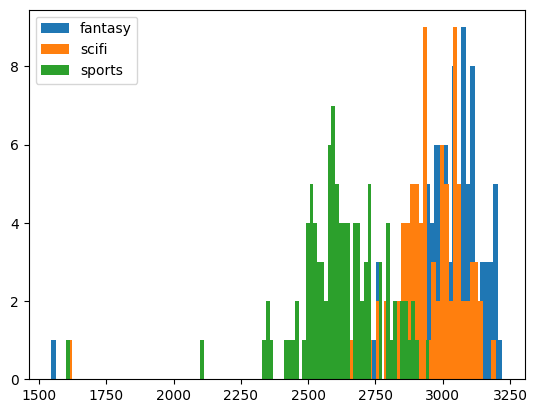

In [ ]:
feature_dataset = stories["fantasy"][:100]
baseline_dataset = training_subset[:100]
evaluation_dataset = {
    "fantasy": stories["fantasy"][100:200],
    "scifi": stories["scifi"][100:200],
    "sports": stories["sports"][100:200]
}

feature_detection_experiment(
    gpt2_small,
    "blocks.7.hook_resid_post",
    feature_dataset,
    baseline_dataset,
    False,
    evaluation_dataset,
    "dot",
    "zero"
)

In [11]:
evaluation_dataset_easy = {
    "fantasy": stories["fantasy"][100:200],
    "sports": stories["sports"][100:200],
    "training": training_subset[100:200]
}

batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_id

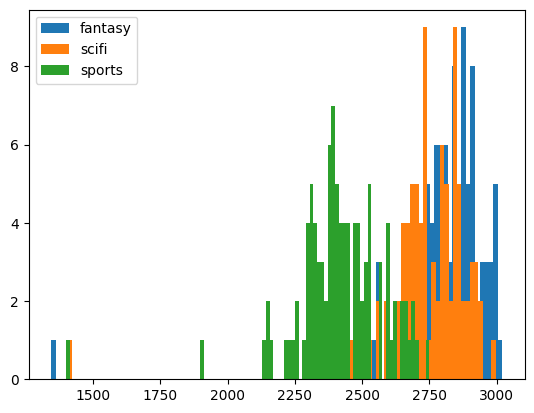

KeyError: ignored

In [12]:
feature_dataset = stories["fantasy"][:100]
baseline_dataset = training_subset[:100]
evaluation_dataset = {
    "fantasy": stories["fantasy"][100:200],
    "scifi": stories["scifi"][100:200],
    "sports": stories["sports"][100:200]
}

fpr, tpr = feature_detection_experiment(
    gpt2_small,
    "blocks.7.hook_resid_post",
    feature_dataset,
    baseline_dataset,
    False,
    evaluation_dataset,
    "centered_dot",
    "zero"
)

In [ ]:
auc(fpr, tpr)

part 1 done
part 2 done
part 3 done
part 4 done
part 5 done


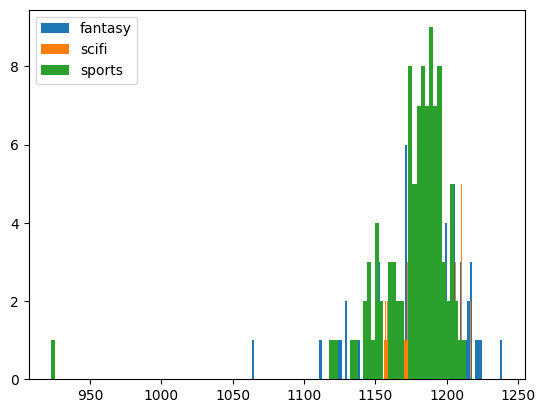

In [ ]:
feature_detection_experiment(
    gpt2_small,
    "blocks.0.hook_resid_post",
    feature_dataset,
    baseline_dataset,
    False,
    evaluation_dataset,
    "centered_dot",
    "zero"
)

part 1 done
part 2 done
part 3 done
part 4 done
part 5 done


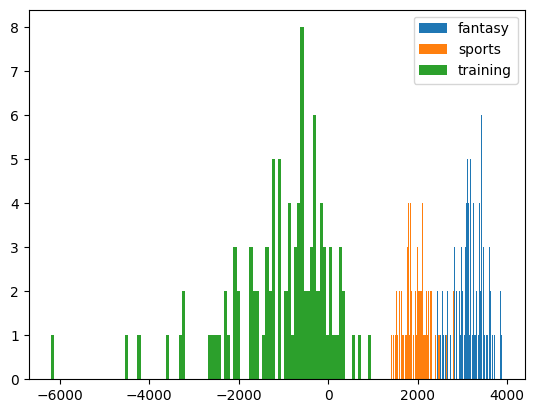

In [ ]:
feature_detection_experiment(
    gpt2_small,
    "blocks.10.hook_resid_post",
    feature_dataset,
    baseline_dataset,
    True,
    evaluation_dataset_easy,
    "centered_dot",
    "zero"
)

part 1 done
part 2 done
part 3 done
part 4 done
part 5 done


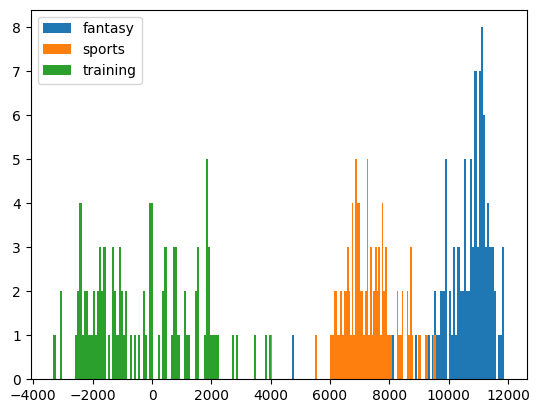

In [ ]:
feature_detection_experiment(
    gpt2_small,
    "blocks.10.hook_resid_post",
    feature_dataset,
    baseline_dataset,
    False,
    evaluation_dataset_easy,
    "centered_dot",
    "zero"
)

part 1 done
part 2 done
part 3 done
part 4 done
part 5 done


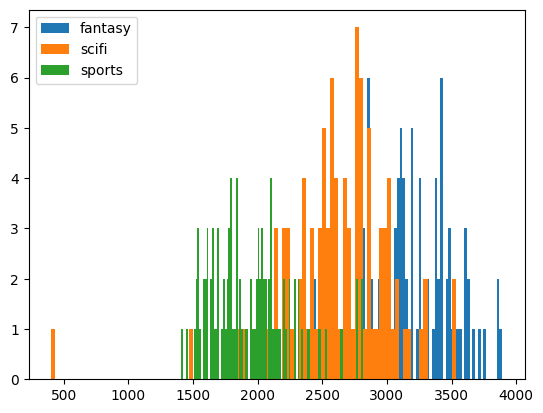

In [ ]:
feature_detection_experiment(
    gpt2_small,
    "blocks.10.hook_resid_post",
    feature_dataset,
    baseline_dataset,
    True,
    evaluation_dataset,
    "centered_dot",
    "zero"
)

part 1 done
part 2 done
part 3 done
part 4 done
part 5 done


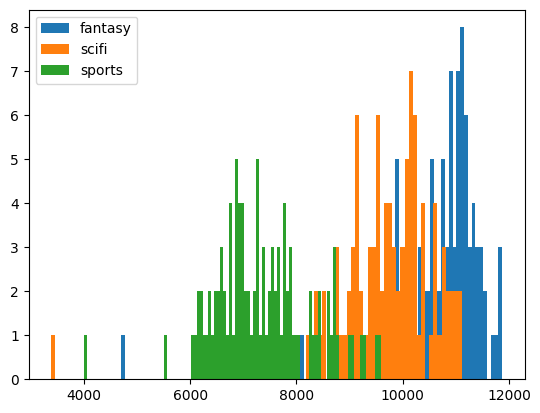

In [ ]:
feature_detection_experiment(
    gpt2_small,
    "blocks.10.hook_resid_post",
    feature_dataset,
    baseline_dataset,
    False,
    evaluation_dataset,
    "centered_dot",
    "zero"
)

part 1 done
part 2 done
part 3 done
part 4 done
part 5 done


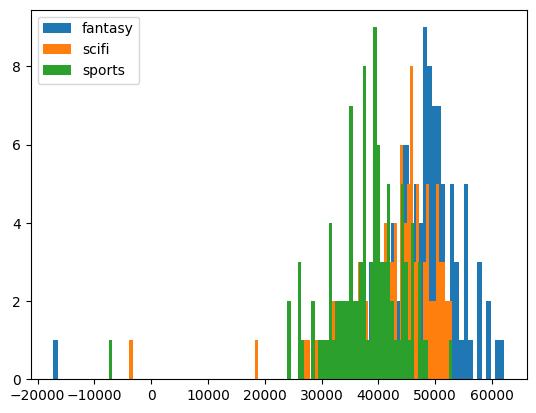

In [ ]:
feature_detection_experiment(
    gpt2_small,
    "blocks.11.hook_resid_post",
    feature_dataset,
    baseline_dataset,
    False,
    evaluation_dataset,
    "centered_dot",
    "zero"
)

part 1 done
part 2 done
part 3 done
part 4 done
part 5 done


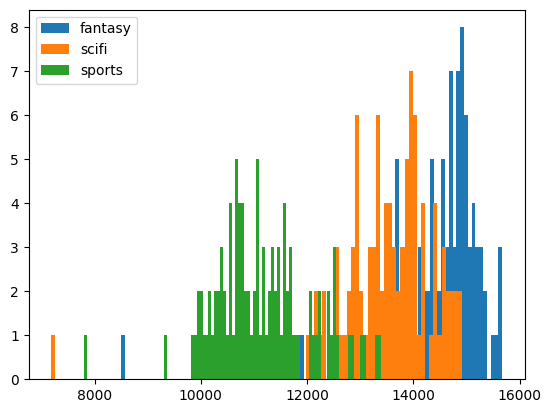

In [ ]:
feature_detection_experiment(
    gpt2_small,
    "blocks.10.hook_resid_post",
    feature_dataset,
    baseline_dataset,
    False,
    evaluation_dataset,
    "dot",
    "zero"
)

part 1 done
part 2 done
part 3 done
part 4 done
part 5 done


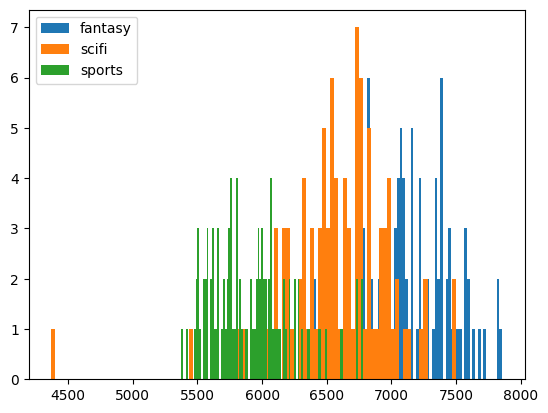

In [ ]:
feature_detection_experiment(
    gpt2_small,
    "blocks.10.hook_resid_post",
    feature_dataset,
    baseline_dataset,
    True,
    evaluation_dataset,
    "dot",
    "zero"
)

part 1 done
part 2 done
part 3 done
part 4 done
part 5 done


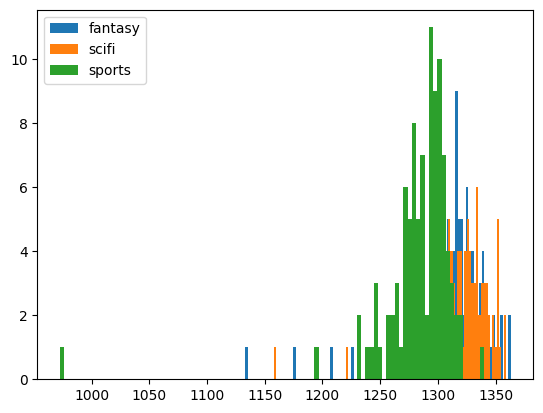

In [ ]:
feature_detection_experiment(
    gpt2_small,
    "blocks.2.hook_resid_post",
    feature_dataset,
    baseline_dataset,
    False,
    evaluation_dataset,
    "dot",
    "zero"
)

In [ ]:
feature_detection_experiment(
    gpt2_small,
    "blocks.6.hook_resid_post",
    feature_dataset,
    baseline_dataset,
    False,
    evaluation_dataset,
    "dot",
    "zero"
)

part 1 done
part 2 done
part 3 done
part 4 done
part 5 done


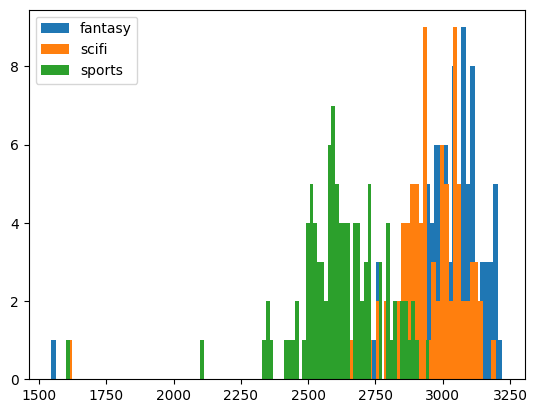

In [ ]:
feature_detection_experiment(
    gpt2_small,
    "blocks.7.hook_resid_post",
    feature_dataset,
    baseline_dataset,
    False,
    evaluation_dataset,
    "dot",
    "zero"
)

part 1 done
part 2 done
part 3 done
part 4 done
part 5 done


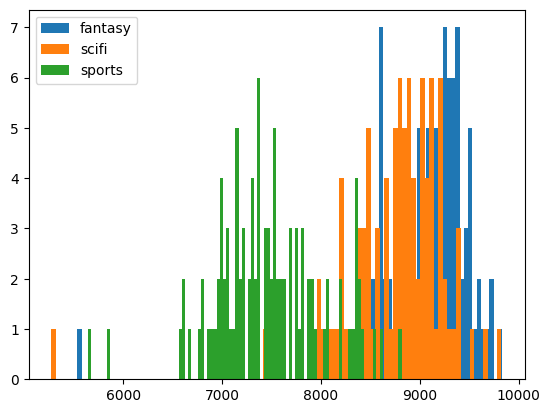

In [ ]:
feature_detection_experiment(
    gpt2_small,
    "blocks.9.hook_resid_post",
    feature_dataset,
    baseline_dataset,
    False,
    evaluation_dataset,
    "dot",
    "zero"
)

part 1 done
part 2 done
part 3 done
part 4 done
part 5 done


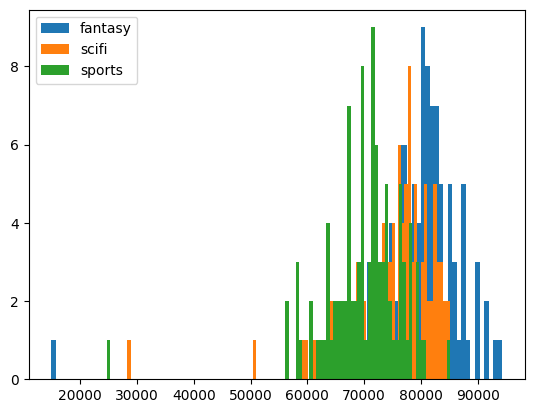

In [ ]:
feature_detection_experiment(
    gpt2_small,
    "blocks.11.hook_resid_post",
    feature_dataset,
    baseline_dataset,
    False,
    evaluation_dataset,
    "dot",
    "zero"
)

# ROC Experiment

In [13]:
evaluation_dataset_easy = {
    "positive": stories["fantasy"][100:200],
    "negative": stories["sports"][100:200] + training_subset[100:200]
}

evaluation_dataset_big = {
    "positive": stories["fantasy"][100:200],
    "negative": stories["sports"][100:200] + training_subset[100:200] + stories["scifi"][100:200]
}

batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_id

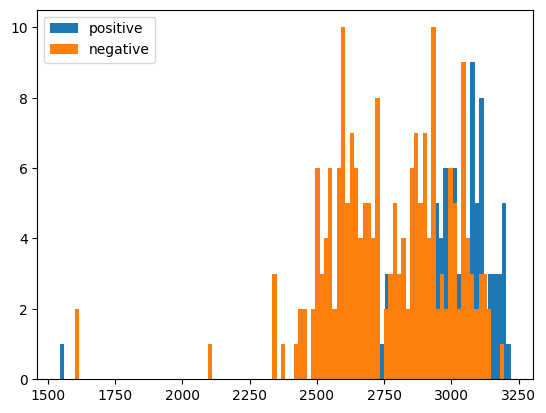

ROC AUC: 0.83


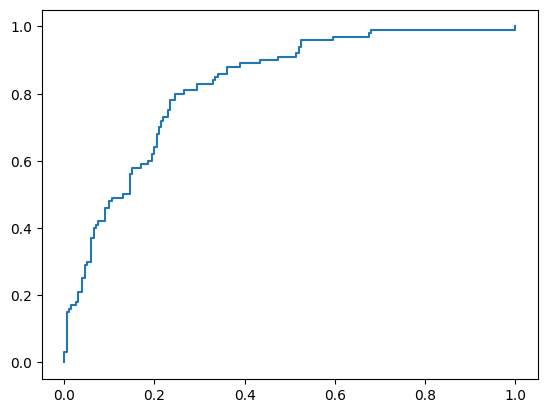

In [14]:
feature_dataset = stories["fantasy"][:100]
baseline_dataset = training_subset[:100]
evaluation_dataset = {
    "positive": stories["fantasy"][100:200],
    "negative": stories["scifi"][100:200] + stories["sports"][100:200]
}

fpr, tpr = feature_detection_experiment(
    gpt2_small,
    "blocks.7.hook_resid_post",
    feature_dataset,
    baseline_dataset,
    False,
    evaluation_dataset,
    "dot",
    "zero"
)

In [15]:
auc(fpr, tpr)

0.8256

part 1 done
part 2 done
part 3 done
part 4 done
part 5 done


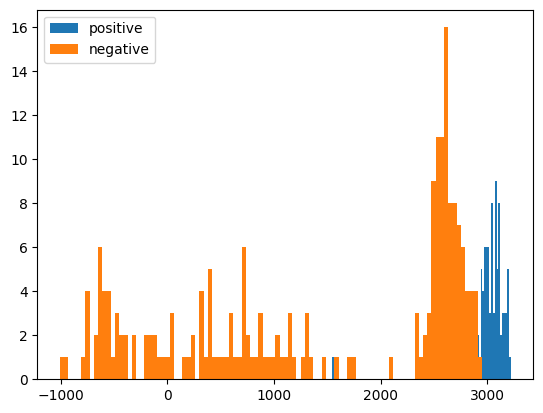

ROC AUC: 0.98


(array([0.   , 0.   , 0.   , 0.005, 0.005, 0.01 , 0.01 , 0.015, 0.015,
        0.02 , 0.02 , 0.025, 0.025, 0.045, 0.045, 0.065, 0.065, 0.095,
        0.095, 0.15 , 0.15 , 0.2  , 0.2  , 0.205, 0.205, 0.51 , 0.51 ,
        1.   ]),
 array([0.  , 0.01, 0.75, 0.75, 0.83, 0.83, 0.84, 0.84, 0.86, 0.86, 0.88,
        0.88, 0.89, 0.89, 0.9 , 0.9 , 0.91, 0.91, 0.96, 0.96, 0.97, 0.97,
        0.98, 0.98, 0.99, 0.99, 1.  , 1.  ]))

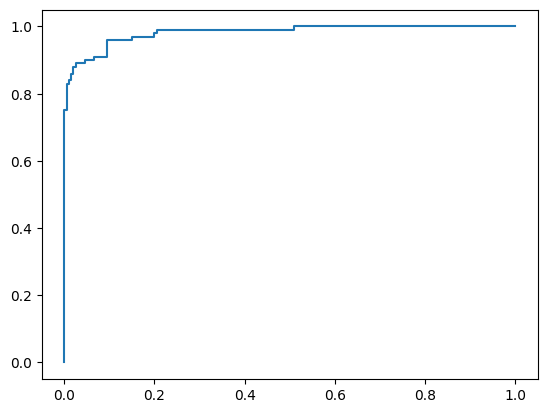

In [ ]:
feature_detection_experiment(
    gpt2_small,
    "blocks.7.hook_resid_post",
    feature_dataset,
    baseline_dataset,
    False,
    evaluation_dataset_easy,
    "dot",
    "zero"
)

In [8]:
feature_detection_experiment(
    gpt2_small,
    "blocks.7.hook_resid_post",
    feature_dataset,
    baseline_dataset,
    False,
    evaluation_dataset,
    "centered_dot",
    "zero"
)

NameError: ignored

part 1 done
part 2 done
part 3 done
part 4 done
part 5 done


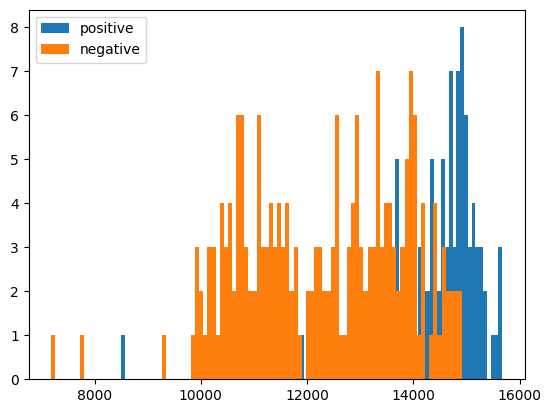

ROC AUC: 0.91


(array([0.   , 0.   , 0.   , 0.005, 0.005, 0.01 , 0.01 , 0.03 , 0.03 ,
        0.04 , 0.04 , 0.045, 0.045, 0.055, 0.055, 0.06 , 0.06 , 0.065,
        0.065, 0.08 , 0.08 , 0.085, 0.085, 0.105, 0.105, 0.11 , 0.11 ,
        0.135, 0.135, 0.14 , 0.14 , 0.16 , 0.16 , 0.2  , 0.2  , 0.225,
        0.225, 0.24 , 0.24 , 0.245, 0.245, 0.26 , 0.26 , 0.28 , 0.28 ,
        0.3  , 0.3  , 0.325, 0.325, 0.345, 0.345, 0.36 , 0.36 , 0.455,
        0.455, 0.575, 0.575, 0.99 , 0.99 , 1.   ]),
 array([0.  , 0.01, 0.3 , 0.3 , 0.34, 0.34, 0.44, 0.44, 0.53, 0.53, 0.54,
        0.54, 0.57, 0.57, 0.59, 0.59, 0.61, 0.61, 0.62, 0.62, 0.63, 0.63,
        0.72, 0.72, 0.75, 0.75, 0.76, 0.76, 0.78, 0.78, 0.79, 0.79, 0.8 ,
        0.8 , 0.82, 0.82, 0.87, 0.87, 0.89, 0.89, 0.9 , 0.9 , 0.91, 0.91,
        0.93, 0.93, 0.94, 0.94, 0.95, 0.95, 0.96, 0.96, 0.97, 0.97, 0.98,
        0.98, 0.99, 0.99, 1.  , 1.  ]))

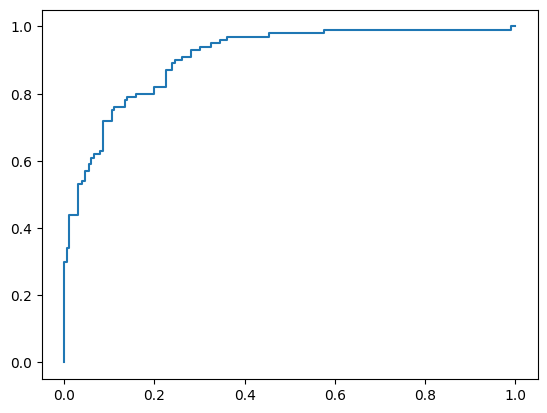

In [ ]:
feature_detection_experiment(
    gpt2_small,
    "blocks.10.hook_resid_post",
    feature_dataset,
    baseline_dataset,
    False,
    evaluation_dataset,
    "dot",
    "zero"
)

part 1 done
part 2 done
part 3 done
part 4 done
part 5 done


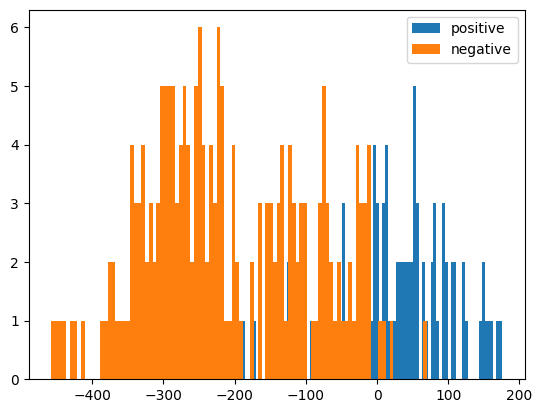

ROC AUC: 0.93


(array([0.   , 0.   , 0.   , 0.005, 0.005, 0.01 , 0.01 , 0.015, 0.015,
        0.02 , 0.02 , 0.035, 0.035, 0.045, 0.045, 0.055, 0.055, 0.07 ,
        0.07 , 0.075, 0.075, 0.095, 0.095, 0.1  , 0.1  , 0.105, 0.105,
        0.11 , 0.11 , 0.115, 0.115, 0.135, 0.135, 0.145, 0.145, 0.175,
        0.175, 0.18 , 0.18 , 0.205, 0.205, 0.22 , 0.22 , 0.245, 0.245,
        0.27 , 0.27 , 0.28 , 0.28 , 0.295, 0.295, 0.32 , 0.32 , 0.325,
        0.325, 0.335, 0.335, 0.38 , 0.38 , 0.385, 0.385, 0.39 , 0.39 ,
        0.47 , 0.47 , 0.485, 0.485, 1.   ]),
 array([0.  , 0.01, 0.26, 0.26, 0.5 , 0.5 , 0.57, 0.57, 0.59, 0.59, 0.67,
        0.67, 0.68, 0.68, 0.69, 0.69, 0.7 , 0.7 , 0.71, 0.71, 0.72, 0.72,
        0.73, 0.73, 0.74, 0.74, 0.76, 0.76, 0.77, 0.77, 0.8 , 0.8 , 0.81,
        0.81, 0.82, 0.82, 0.83, 0.83, 0.85, 0.85, 0.86, 0.86, 0.87, 0.87,
        0.88, 0.88, 0.89, 0.89, 0.9 , 0.9 , 0.91, 0.91, 0.93, 0.93, 0.94,
        0.94, 0.95, 0.95, 0.96, 0.96, 0.97, 0.97, 0.98, 0.98, 0.99, 0.99,
        1.  , 

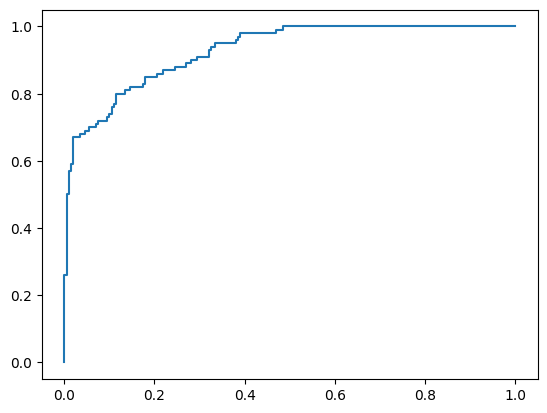

In [ ]:
feature_detection_experiment(
    gpt2_small,
    "blocks.10.hook_attn_out",
    feature_dataset,
    baseline_dataset,
    False,
    evaluation_dataset,
    "dot",
    "zero"
)

part 1 done
part 2 done
part 3 done
part 4 done
part 5 done


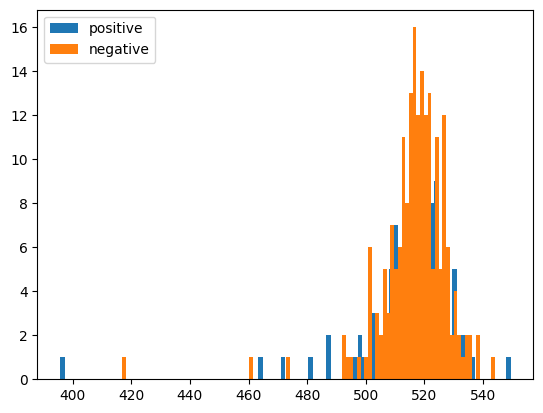

ROC AUC: 0.52


(array([0.   , 0.   , 0.015, 0.015, 0.035, 0.035, 0.04 , 0.04 , 0.05 ,
        0.05 , 0.055, 0.055, 0.06 , 0.06 , 0.07 , 0.07 , 0.09 , 0.09 ,
        0.115, 0.115, 0.125, 0.125, 0.13 , 0.13 , 0.14 , 0.14 , 0.17 ,
        0.17 , 0.185, 0.185, 0.19 , 0.19 , 0.205, 0.205, 0.21 , 0.21 ,
        0.22 , 0.22 , 0.225, 0.225, 0.23 , 0.23 , 0.255, 0.255, 0.265,
        0.265, 0.27 , 0.27 , 0.285, 0.285, 0.295, 0.295, 0.325, 0.325,
        0.345, 0.345, 0.355, 0.355, 0.365, 0.365, 0.37 , 0.37 , 0.38 ,
        0.38 , 0.4  , 0.4  , 0.41 , 0.41 , 0.425, 0.425, 0.43 , 0.43 ,
        0.465, 0.465, 0.495, 0.495, 0.5  , 0.5  , 0.515, 0.515, 0.53 ,
        0.53 , 0.535, 0.535, 0.58 , 0.58 , 0.61 , 0.61 , 0.62 , 0.62 ,
        0.635, 0.635, 0.675, 0.675, 0.705, 0.705, 0.71 , 0.71 , 0.715,
        0.715, 0.75 , 0.75 , 0.765, 0.765, 0.785, 0.785, 0.8  , 0.8  ,
        0.805, 0.805, 0.825, 0.825, 0.855, 0.855, 0.865, 0.865, 0.875,
        0.875, 0.925, 0.925, 0.96 , 0.96 , 0.965, 0.965, 0.985, 0.985,
      

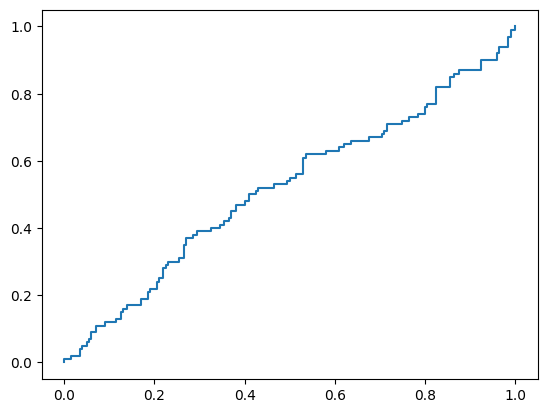

In [ ]:
feature_detection_experiment(
    gpt2_small,
    "blocks.0.hook_attn_out",
    feature_dataset,
    baseline_dataset,
    False,
    evaluation_dataset,
    "dot",
    "zero"
)

part 1 done
part 2 done
part 3 done
part 4 done
part 5 done


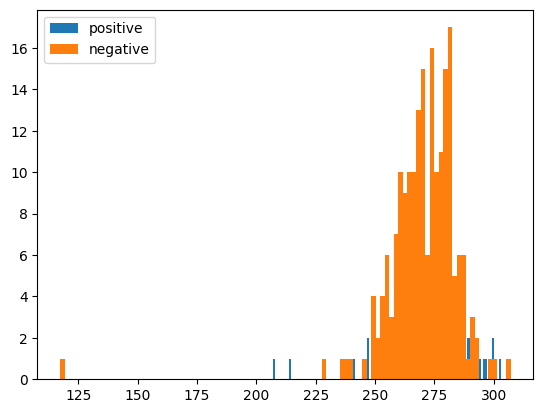

ROC AUC: 0.65


(array([0.   , 0.005, 0.005, 0.01 , 0.01 , 0.015, 0.015, 0.025, 0.025,
        0.035, 0.035, 0.04 , 0.04 , 0.05 , 0.05 , 0.055, 0.055, 0.07 ,
        0.07 , 0.075, 0.075, 0.105, 0.105, 0.115, 0.115, 0.12 , 0.12 ,
        0.125, 0.125, 0.13 , 0.13 , 0.14 , 0.14 , 0.155, 0.155, 0.185,
        0.185, 0.215, 0.215, 0.22 , 0.22 , 0.24 , 0.24 , 0.245, 0.245,
        0.265, 0.265, 0.27 , 0.27 , 0.3  , 0.3  , 0.315, 0.315, 0.32 ,
        0.32 , 0.325, 0.325, 0.345, 0.345, 0.355, 0.355, 0.37 , 0.37 ,
        0.375, 0.375, 0.38 , 0.38 , 0.39 , 0.39 , 0.395, 0.395, 0.4  ,
        0.4  , 0.41 , 0.41 , 0.415, 0.415, 0.435, 0.435, 0.445, 0.445,
        0.46 , 0.46 , 0.475, 0.475, 0.48 , 0.48 , 0.505, 0.505, 0.515,
        0.515, 0.535, 0.535, 0.545, 0.545, 0.58 , 0.58 , 0.61 , 0.61 ,
        0.62 , 0.62 , 0.645, 0.645, 0.735, 0.735, 0.745, 0.745, 0.77 ,
        0.77 , 0.775, 0.775, 0.83 , 0.83 , 0.91 , 0.91 , 0.96 , 0.96 ,
        0.97 , 0.97 , 0.975, 0.975, 0.995, 0.995, 1.   ]),
 array([0.  , 0.  

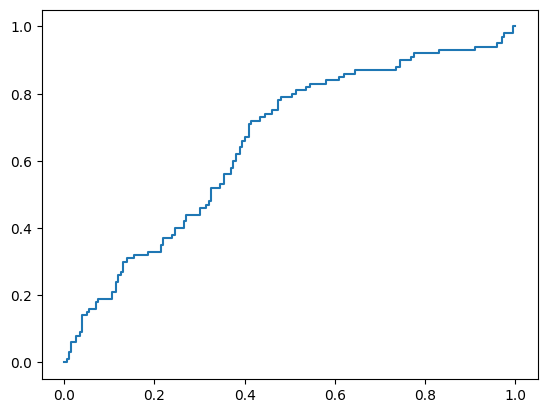

In [ ]:
feature_detection_experiment(
    gpt2_small,
    "blocks.0.hook_mlp_out",
    feature_dataset,
    baseline_dataset,
    False,
    evaluation_dataset,
    "dot",
    "zero"
)

part 1 done
part 2 done
part 3 done
part 4 done
part 5 done


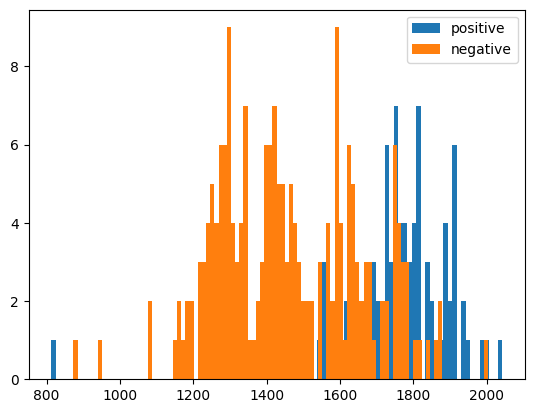

ROC AUC: 0.86


(array([0.   , 0.   , 0.005, 0.005, 0.015, 0.015, 0.02 , 0.02 , 0.025,
        0.025, 0.03 , 0.03 , 0.035, 0.035, 0.04 , 0.04 , 0.05 , 0.05 ,
        0.065, 0.065, 0.08 , 0.08 , 0.085, 0.085, 0.09 , 0.09 , 0.1  ,
        0.1  , 0.105, 0.105, 0.115, 0.115, 0.135, 0.135, 0.14 , 0.14 ,
        0.155, 0.155, 0.16 , 0.16 , 0.17 , 0.17 , 0.18 , 0.18 , 0.19 ,
        0.19 , 0.22 , 0.22 , 0.24 , 0.24 , 0.25 , 0.25 , 0.275, 0.275,
        0.31 , 0.31 , 0.325, 0.325, 0.33 , 0.33 , 0.345, 0.345, 0.35 ,
        0.35 , 0.365, 0.365, 0.375, 0.375, 0.385, 0.385, 0.395, 0.395,
        0.405, 0.405, 0.425, 0.425, 0.465, 0.465, 0.515, 0.515, 0.52 ,
        0.52 , 1.   , 1.   ]),
 array([0.  , 0.01, 0.01, 0.19, 0.19, 0.2 , 0.2 , 0.23, 0.23, 0.26, 0.26,
        0.31, 0.31, 0.38, 0.38, 0.39, 0.39, 0.43, 0.43, 0.44, 0.44, 0.47,
        0.47, 0.48, 0.48, 0.49, 0.49, 0.52, 0.52, 0.53, 0.53, 0.63, 0.63,
        0.67, 0.67, 0.69, 0.69, 0.71, 0.71, 0.72, 0.72, 0.73, 0.73, 0.74,
        0.74, 0.75, 0.75, 0.78, 0.

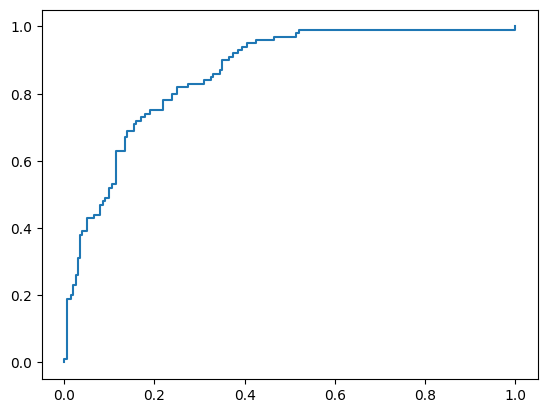

In [ ]:
feature_detection_experiment(
    gpt2_small,
    "blocks.10.hook_mlp_out",
    feature_dataset,
    baseline_dataset,
    False,
    evaluation_dataset,
    "dot",
    "zero"
)

part 1 done
part 2 done
part 3 done
part 4 done
part 5 done


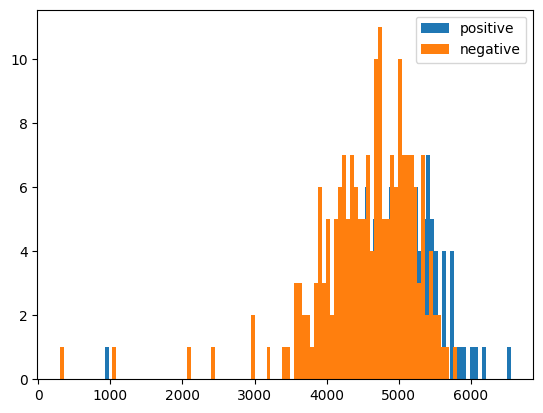

ROC AUC: 0.76


(array([0.   , 0.   , 0.   , 0.005, 0.005, 0.01 , 0.01 , 0.015, 0.015,
        0.025, 0.025, 0.035, 0.035, 0.04 , 0.04 , 0.045, 0.045, 0.05 ,
        0.05 , 0.055, 0.055, 0.06 , 0.06 , 0.07 , 0.07 , 0.08 , 0.08 ,
        0.09 , 0.09 , 0.1  , 0.1  , 0.105, 0.105, 0.115, 0.115, 0.12 ,
        0.12 , 0.14 , 0.14 , 0.145, 0.145, 0.155, 0.155, 0.17 , 0.17 ,
        0.175, 0.175, 0.18 , 0.18 , 0.2  , 0.2  , 0.215, 0.215, 0.25 ,
        0.25 , 0.275, 0.275, 0.28 , 0.28 , 0.3  , 0.3  , 0.33 , 0.33 ,
        0.34 , 0.34 , 0.345, 0.345, 0.36 , 0.36 , 0.37 , 0.37 , 0.38 ,
        0.38 , 0.42 , 0.42 , 0.425, 0.425, 0.43 , 0.43 , 0.45 , 0.45 ,
        0.455, 0.455, 0.485, 0.485, 0.505, 0.505, 0.52 , 0.52 , 0.525,
        0.525, 0.535, 0.535, 0.56 , 0.56 , 0.565, 0.565, 0.575, 0.575,
        0.585, 0.585, 0.6  , 0.6  , 0.67 , 0.67 , 0.845, 0.845, 0.915,
        0.915, 0.995, 0.995, 1.   ]),
 array([0.  , 0.01, 0.07, 0.07, 0.11, 0.11, 0.14, 0.14, 0.16, 0.16, 0.19,
        0.19, 0.2 , 0.2 , 0.21, 0.21

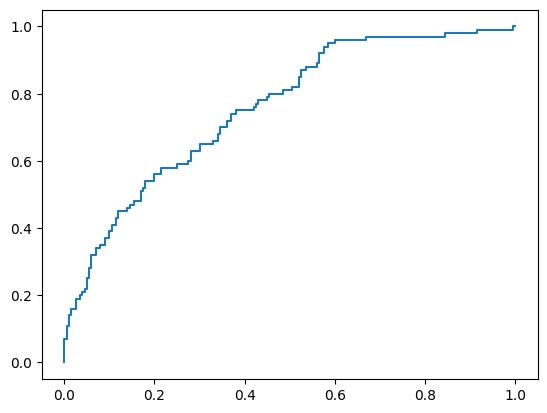

In [ ]:
feature_detection_experiment(
    gpt2_small,
    "blocks.11.hook_mlp_out",
    feature_dataset,
    baseline_dataset,
    False,
    evaluation_dataset,
    "dot",
    "zero"
)

In [ ]:
from sklearn.metrics import roc_curve, auc

# Trying Dylan's Video Stuff

In [16]:
from typing import List, Optional, Tuple, Union, Dict
from IPython.display import HTML, clear_output
import base64

import io
import numpy as np

from PIL import Image
from io import BytesIO
import imageio
import imageio.core.util

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [17]:
def plot_to_array(fig) -> np.ndarray:
    """
    Converts a matplotlib figure to a numpy array.
    """
    io_buf = io.BytesIO()
    fig.savefig(io_buf, format='raw', facecolor='white', transparent=False)
    io_buf.seek(0)
    img_arr = np.reshape(np.frombuffer(io_buf.getvalue(), dtype=np.uint8),
                         newshape=(int(fig.bbox.bounds[3]), int(fig.bbox.bounds[2]), -1))
    io_buf.close()
    return img_arr


def embed_mp4(filename: str, clear_before=True, width=640, height=480) -> HTML:
    """Embeds an mp4 file in the notebook."""
    video = open(filename, 'rb').read()
    b64 = base64.b64encode(video)
    tag = '''
    <video width="{0}" height="{1}" controls>
    <source src="data:video/mp4;base64,{2}" type="video/mp4">
    Your browser does not support the video tag.
    </video>'''.format(width, height, b64.decode())

    if clear_before:
        clear_output()

    return HTML(tag)

def save_video(frames: List[np.ndarray], filename: str = 'video', format='mp4', fps: int = 1) -> str:
    """
    Saves a video of the policy being evaluating in an environment.

    Args:
        frames (List[np.ndarray]): The frames of the video.
        filename (str): The name of the file to save the video to.
        fps (int): The frames per second of the video.

    Returns:
        str: The path to the saved video.
    """
    if not filename.endswith(f'.{format}'):
        filename = filename + f'.{format}'

    imageio.mimwrite(filename, frames, fps=fps)

    return filename

part 1 done
part 2 done
part 3 done
part 4 done
part 5 done


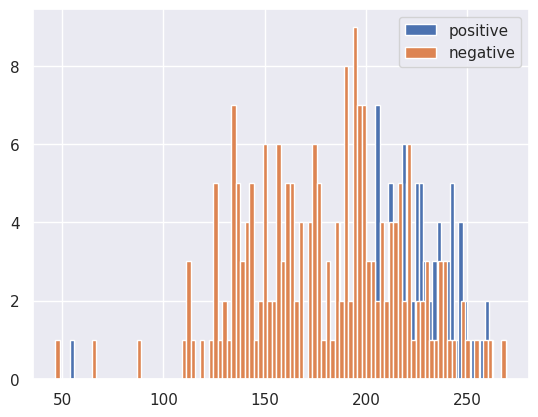

ROC AUC: 0.79
part 1 done
part 2 done
part 3 done
part 4 done
part 5 done


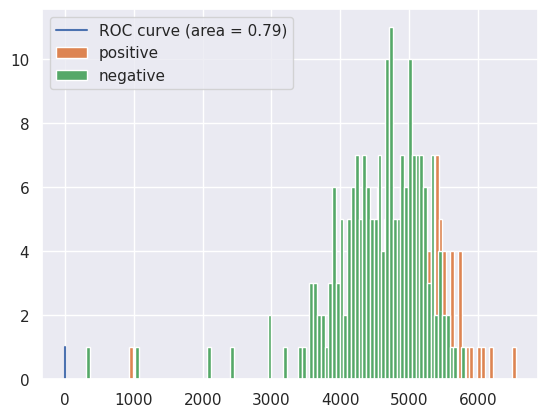

ROC AUC: 0.76


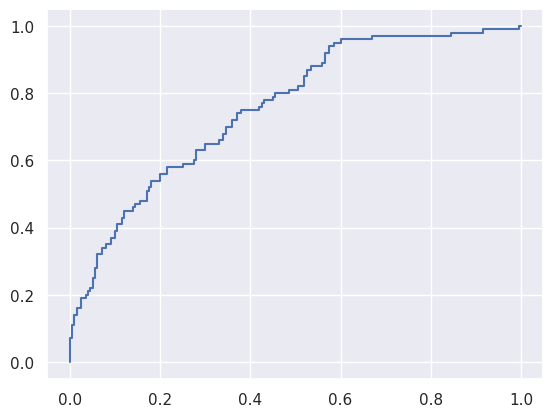

In [ ]:
fpr1, tpr1 = feature_detection_experiment(
    gpt2_small,
    "blocks.6.hook_mlp_out",
    feature_dataset,
    baseline_dataset,
    False,
    evaluation_dataset,
    "dot",
    "zero"
)

fpr2, tpr2 = feature_detection_experiment(
    gpt2_small,
    "blocks.11.hook_mlp_out",
    feature_dataset,
    baseline_dataset,
    False,
    evaluation_dataset,
    "dot",
    "zero"
)

matplotlib.lines.Line2D

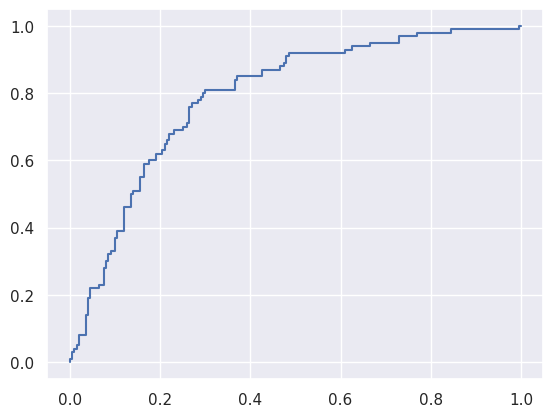

In [ ]:
x = plt.plot(fpr1, tpr1, label=f'ROC curve')
type(x[0])

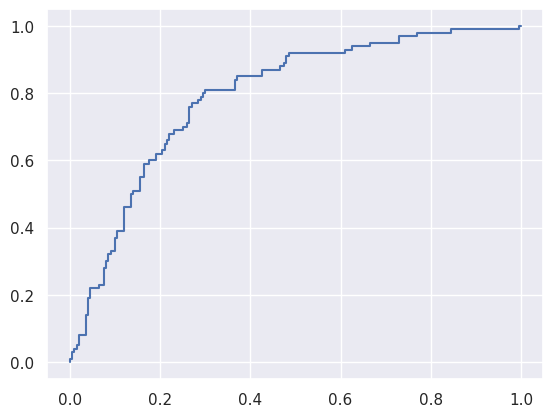

In [ ]:
fig1 = plt.figure()
plt.plot(fpr1, tpr1)

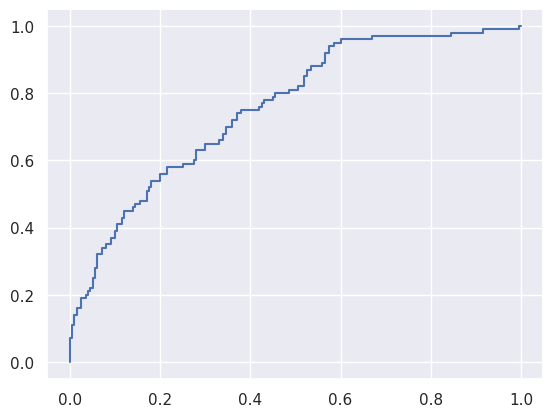

In [ ]:
fig2 = plt.figure()
plt.plot(fpr2, tpr2)

In [ ]:
arrays = [plot_to_array(fig1), plot_to_array(fig2)]

In [ ]:
filename = save_video(arrays)

In [ ]:
embed_mp4(filename)

In [ ]:
def roc_all_layers_experiment(
    filename: str,
    model: HookedTransformer,
    num_layers: int,
    location: str,
    feature_dataset: List[str],
    baseline_dataset: List[str],
    use_all_activations: bool,
    evaluation_dataset: Dict[str, List[str]],
    inner_product_type: str,
):
  """
  Plot the ROC curve for each layer in the model, after mlp or attn or
  resid stream.
  """
  plots = []
  for layer in range(num_layers):
    fpr, tpr = feature_detection_experiment(
      model,
      location.format(layer),
      feature_dataset,
      baseline_dataset,
      use_all_activations,
      evaluation_dataset,
      inner_product_type,
      "zero"
    )
    fig = plt.figure()
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr)
    plt.title(f"ROC for {location.format(layer)}. ROC_AUC score is {roc_auc}")
    plot_array = plot_to_array(fig)
    plots.append(plot_array)

  filename_full = save_video(plots, filename)
  return embed_mp4(filename_full)

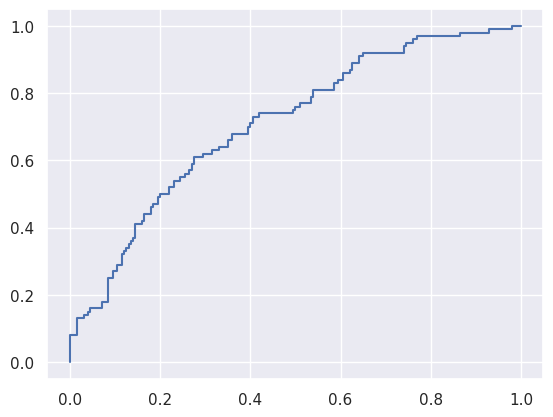

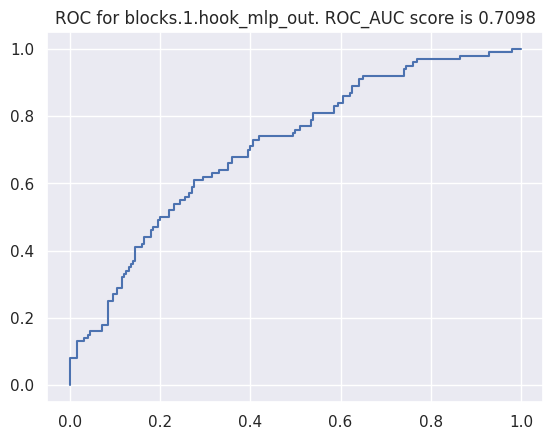

In [ ]:
roc_all_layers_experiment(
    "roc_plots/mlp_smol_test",
    gpt2_small,
    2,
    "blocks.{}.hook_mlp_out",
    feature_dataset,
    baseline_dataset,
    False,
    evaluation_dataset,
    "dot",
)

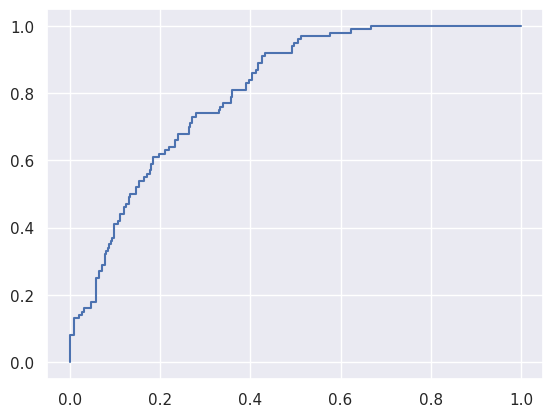

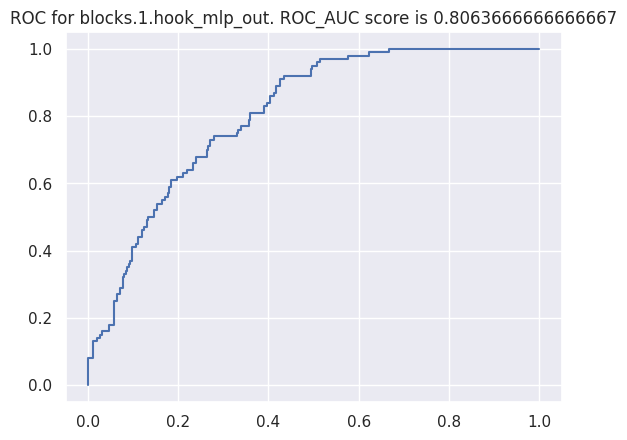

In [ ]:
roc_all_layers_experiment(
    "roc_plots/mlp_smol_test",
    gpt2_small,
    2,
    "blocks.{}.hook_mlp_out",
    feature_dataset,
    baseline_dataset,
    False,
    evaluation_dataset_big,
    "dot",
)

part 1 done
part 2 done
part 3 done
part 4 done
part 5 done


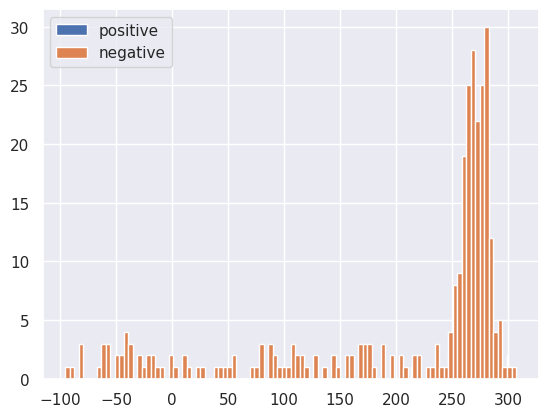

ROC AUC: 0.77
part 1 done
part 2 done
part 3 done
part 4 done
part 5 done


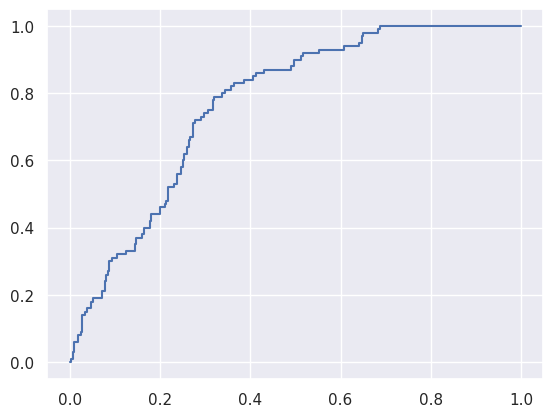

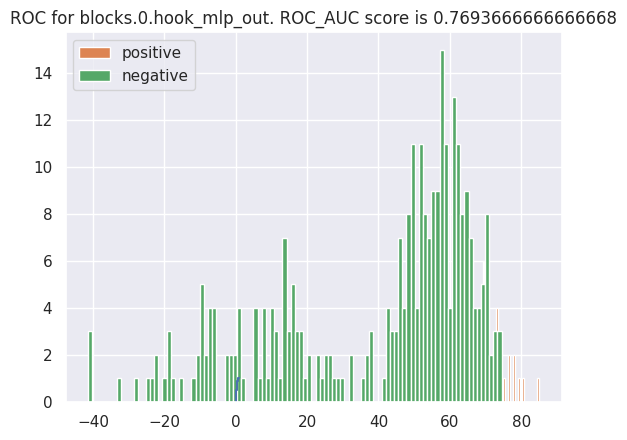

ROC AUC: 0.81
part 1 done
part 2 done
part 3 done
part 4 done
part 5 done


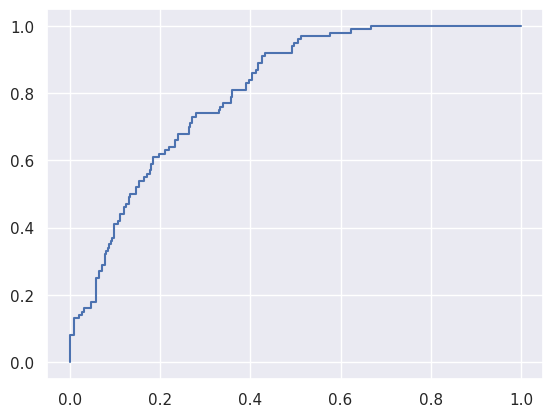

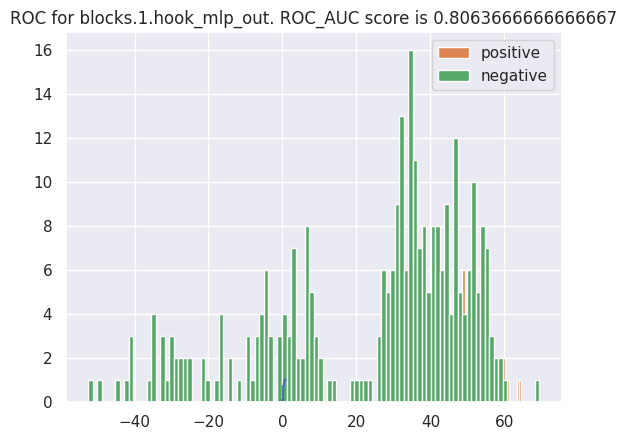

ROC AUC: 0.81
part 1 done
part 2 done
part 3 done
part 4 done
part 5 done


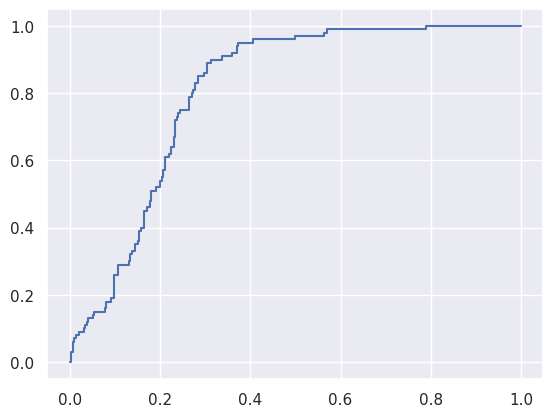

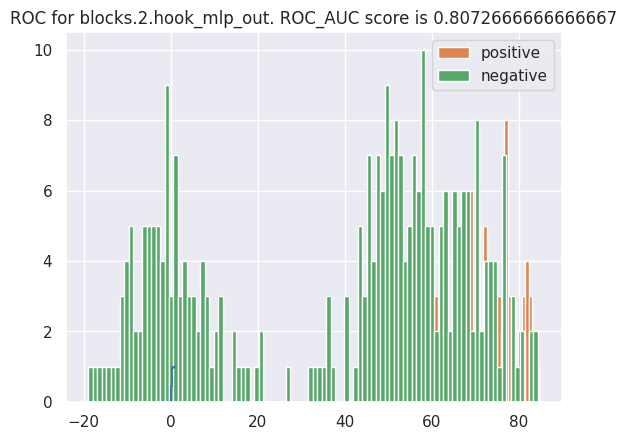

ROC AUC: 0.85
part 1 done
part 2 done
part 3 done
part 4 done
part 5 done


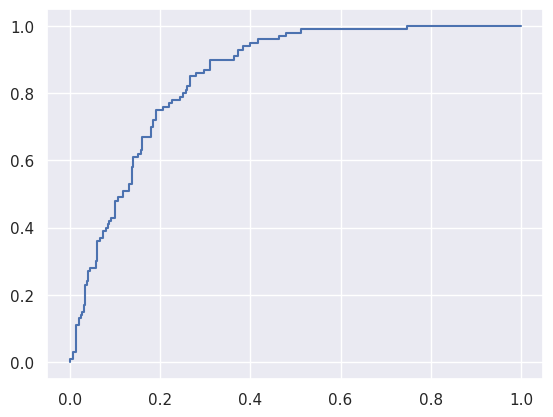

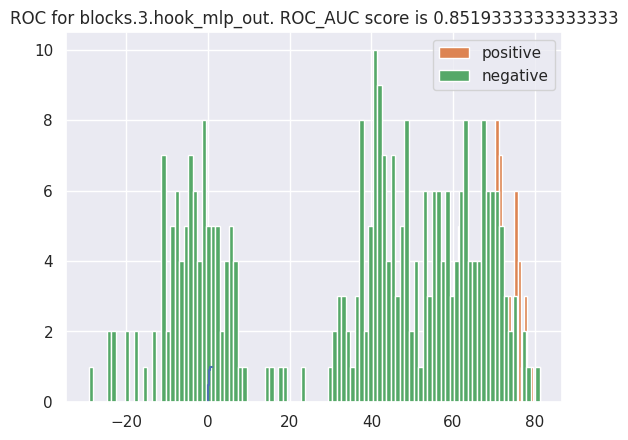

ROC AUC: 0.86


KeyboardInterrupt: ignored

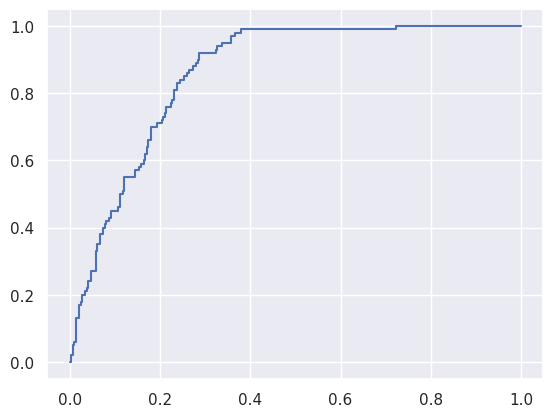

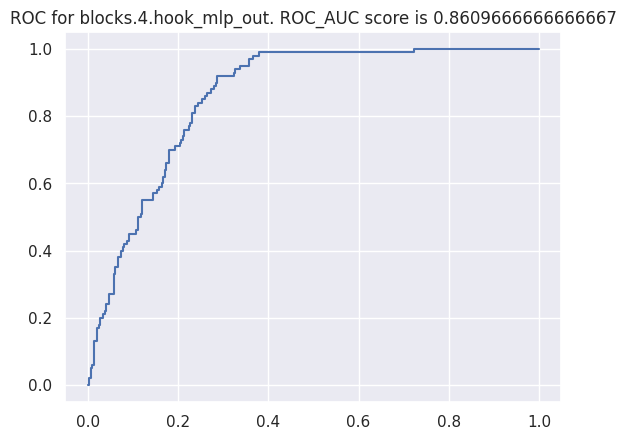

In [ ]:
roc_all_layers_experiment(
    "roc_plots/mlp_gpt2_small_all",
    gpt2_small,
    12,
    "blocks.{}.hook_mlp_out",
    feature_dataset,
    baseline_dataset,
    True,
    evaluation_dataset_big,
    "dot",
)

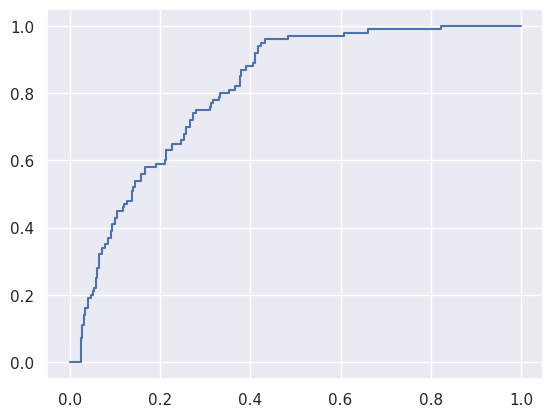

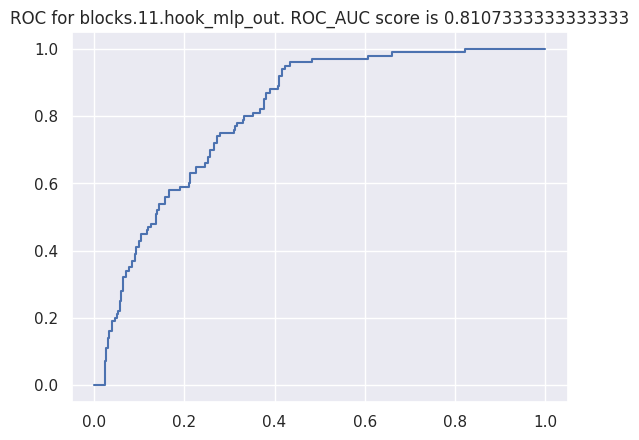

In [ ]:
roc_all_layers_experiment(
    "roc_plots/mlp_gpt2_small",
    gpt2_small,
    12,
    "blocks.{}.hook_mlp_out",
    feature_dataset,
    baseline_dataset,
    False,
    evaluation_dataset_big,
    "dot",
)

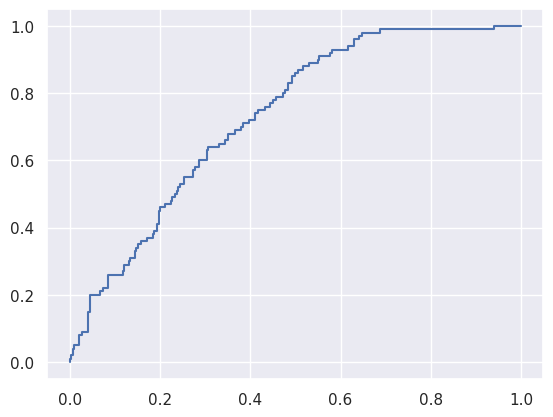

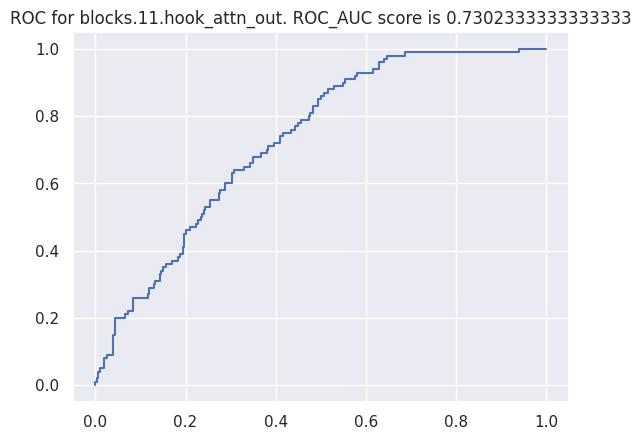

In [ ]:
roc_all_layers_experiment(
    "roc_plots/attn_gpt2_small_all",
    gpt2_small,
    12,
    "blocks.{}.hook_attn_out",
    feature_dataset,
    baseline_dataset,
    True,
    evaluation_dataset_big,
    "dot",
)

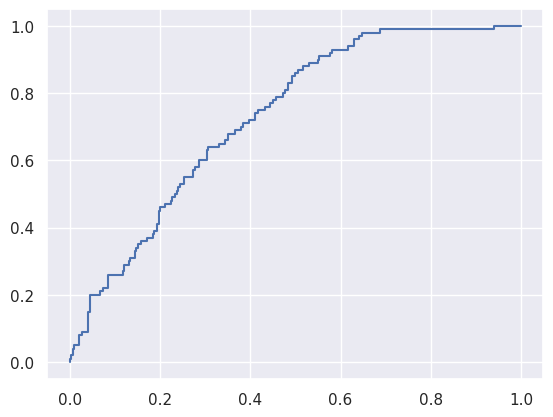

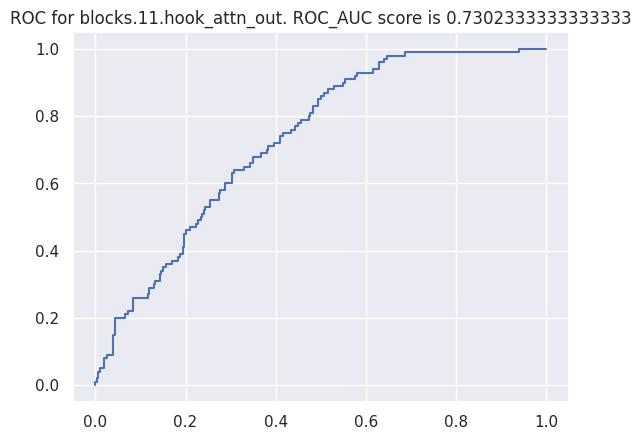

In [ ]:
roc_all_layers_experiment(
    "roc_plots/attn_gpt2_small",
    gpt2_small,
    12,
    "blocks.{}.hook_attn_out",
    feature_dataset,
    baseline_dataset,
    False,
    evaluation_dataset_big,
    "dot",
)

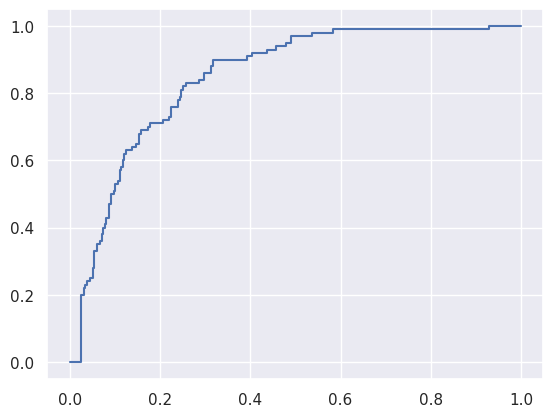

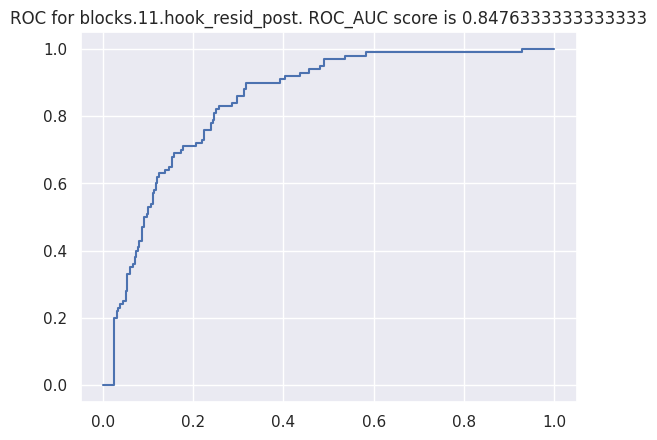

In [ ]:
roc_all_layers_experiment(
    "roc_plots/resid_gpt2_small_all",
    gpt2_small,
    12,
    "blocks.{}.hook_resid_post",
    feature_dataset,
    baseline_dataset,
    True,
    evaluation_dataset_big,
    "dot",
)

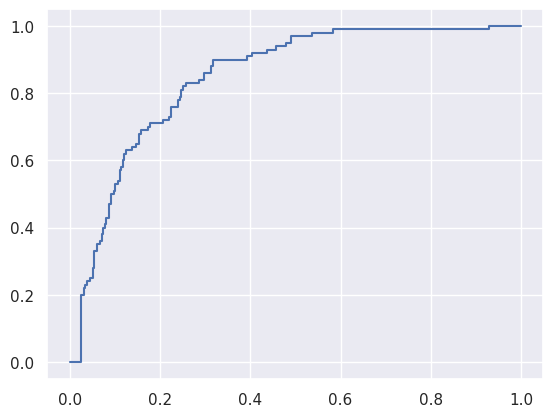

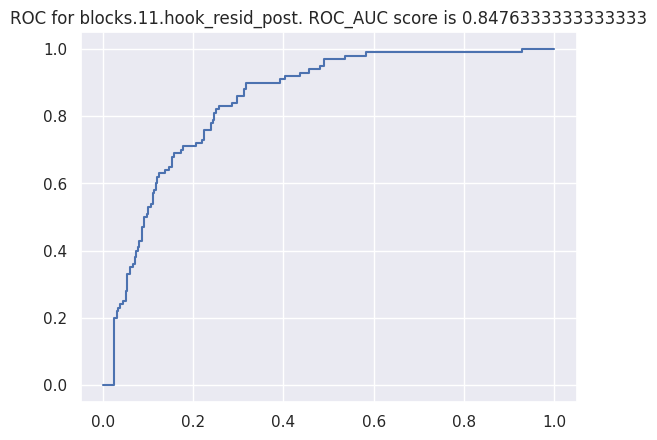

In [ ]:
roc_all_layers_experiment(
    "roc_plots/resid_gpt2_small",
    gpt2_small,
    12,
    "blocks.{}.hook_resid_post",
    feature_dataset,
    baseline_dataset,
    False,
    evaluation_dataset_big,
    "dot",
)

# Repeating for GPT-2 XL !

In [21]:
tiny_training_subset = [stringo for stringo in training_subset if len(gpt2_xl.tokenizer(stringo)["input_ids"]) < 500]

Token indices sequence length is longer than the specified maximum sequence length for this model (1076 > 1024). Running this sequence through the model will result in indexing errors


In [ ]:
len(tiny_training_subset)

210

In [22]:
evaluation_dataset_easy = {
    "positive": stories["fantasy"][100:200],
    "negative": stories["sports"][100:200] + training_subset[100:200]
}

evaluation_dataset_big2 = {
    "positive": stories["fantasy"][100:200],
    "negative": stories["sports"][100:200] + tiny_training_subset[100:200] + stories["scifi"][100:200]
}

feature_dataset = stories["fantasy"][:100]
baseline_dataset2 = tiny_training_subset[:100]

In [ ]:
import gc
gc.collect()
t.cuda.empty_cache()

In [ ]:
feature_dataset_small = stories["fantasy"][:10]
baseline_dataset_small = training_subset[:10]

part 1 done
part 2 done
part 3 done
part 4 done
part 5 done


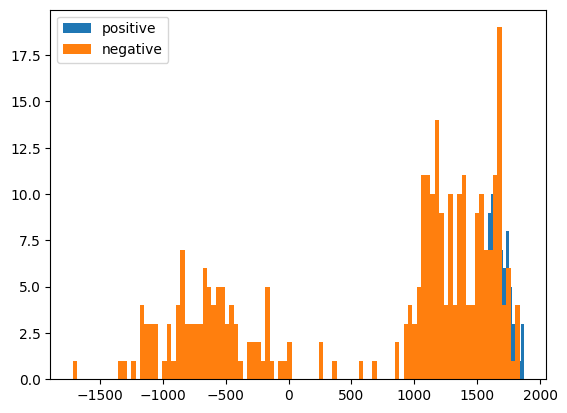

ROC AUC: 0.85


(array([0.        , 0.        , 0.        , 0.00333333, 0.00333333,
        0.00666667, 0.00666667, 0.01333333, 0.01333333, 0.01666667,
        0.01666667, 0.02      , 0.02      , 0.02333333, 0.02333333,
        0.03      , 0.03      , 0.03666667, 0.03666667, 0.04666667,
        0.04666667, 0.05      , 0.05      , 0.06666667, 0.06666667,
        0.08      , 0.08      , 0.1       , 0.1       , 0.10666667,
        0.10666667, 0.11      , 0.11      , 0.11333333, 0.11333333,
        0.12333333, 0.12333333, 0.12666667, 0.12666667, 0.13      ,
        0.13      , 0.13333333, 0.13333333, 0.15      , 0.15      ,
        0.15333333, 0.15333333, 0.15666667, 0.15666667, 0.16333333,
        0.16333333, 0.16666667, 0.16666667, 0.17      , 0.17      ,
        0.17333333, 0.17333333, 0.18      , 0.18      , 0.18666667,
        0.18666667, 0.19333333, 0.19333333, 0.19666667, 0.19666667,
        0.21      , 0.21      , 0.22333333, 0.22333333, 0.22666667,
        0.22666667, 0.23      , 0.23      , 0.24

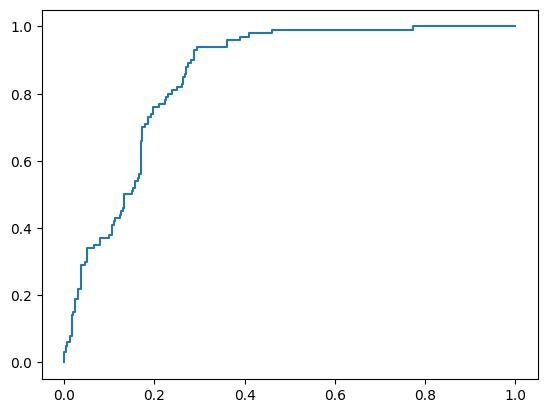

In [ ]:
feature_detection_experiment(
    gpt2_xl,
    "blocks.19.hook_resid_post",
    feature_dataset,
    baseline_dataset2,
    False,
    evaluation_dataset_big2,
    "dot",
    "zero"
)

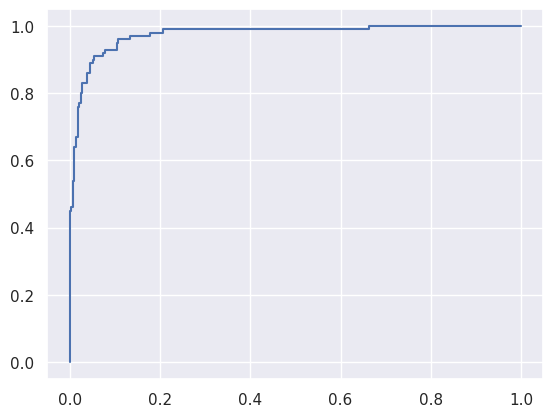

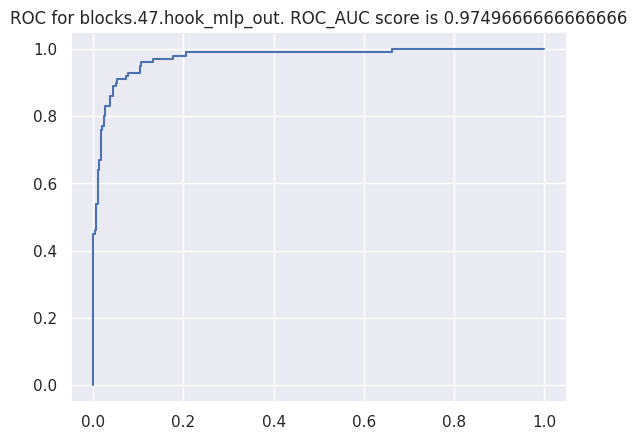

In [ ]:
roc_all_layers_experiment(
    "roc_plots/mlp_gpt2_xl",
    gpt2_xl,
    48,
    "blocks.{}.hook_mlp_out",
    feature_dataset,
    baseline_dataset2,
    False,
    evaluation_dataset_big2,
    "dot",
)

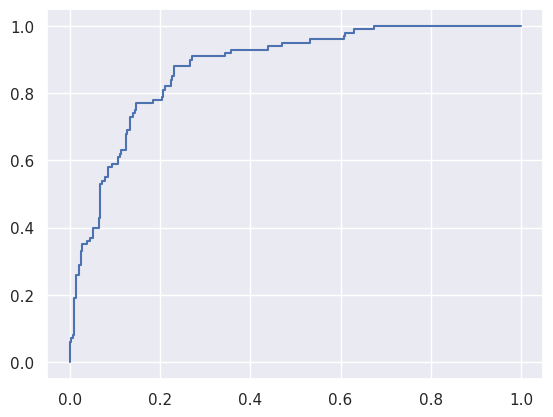

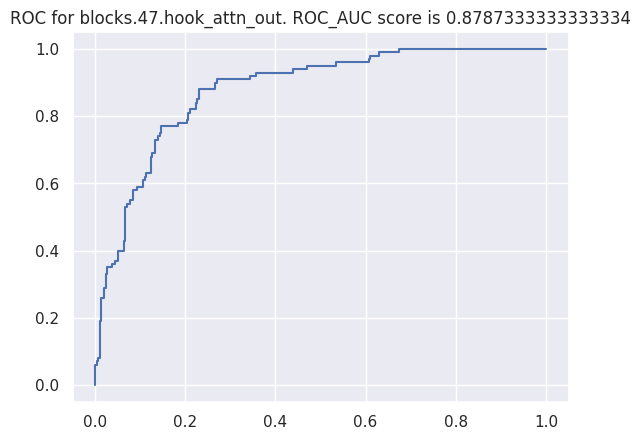

In [ ]:
roc_all_layers_experiment(
    "roc_plots/attn_gpt2_xl",
    gpt2_xl,
    48,
    "blocks.{}.hook_attn_out",
    feature_dataset,
    baseline_dataset2,
    False,
    evaluation_dataset_big2,
    "dot",
)

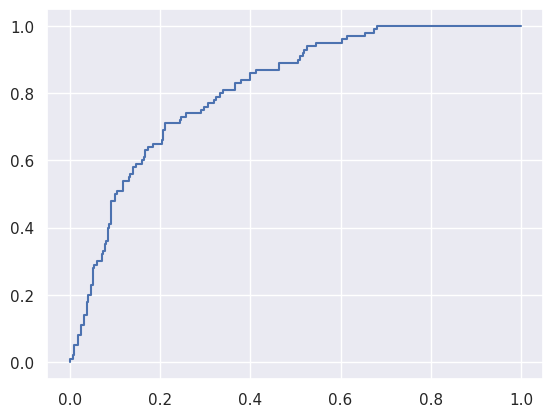

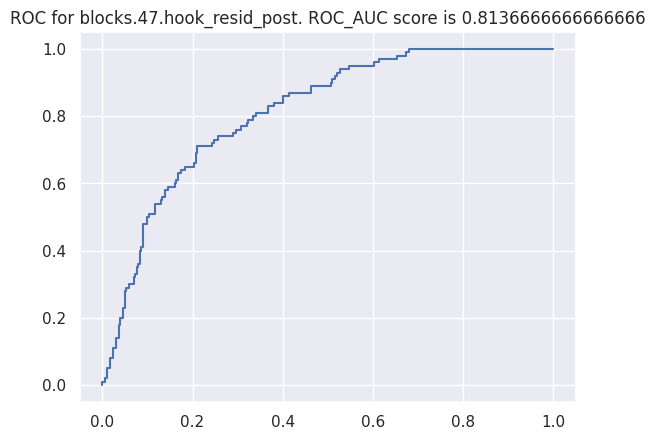

In [ ]:
roc_all_layers_experiment(
    "roc_plots/resid_gpt2_xl",
    gpt2_xl,
    48,
    "blocks.{}.hook_resid_post",
    feature_dataset,
    baseline_dataset2,
    False,
    evaluation_dataset_big2,
    "dot",
)

# AUC Plots

In [29]:
def auc_all_layers_single_plot(
    model: HookedTransformer,
    num_layers: int,
    location: str,
    feature_dataset: List[str],
    baseline_dataset: List[str],
    use_all_activations: bool,
    evaluation_dataset: Dict[str, List[str]],
    inner_product_type: str,
):
  """
  Plot the auc score across all layers of the model.
  """
  names = {
        "blocks.{}.hook_attn_out": "attention layer output activations",
        "blocks.{}.hook_mlp_out": "mlp layer output activations",
        "blocks.{}.hook_resid_pre": "residual stream activations"
  }
  aucs = []
  for layer in range(num_layers):
    fpr, tpr = feature_detection_experiment(
      model,
      location.format(layer),
      feature_dataset,
      baseline_dataset,
      use_all_activations,
      evaluation_dataset,
      inner_product_type,
      "zero"
    )
    fig = plt.figure()
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)

  return aucs



batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_id

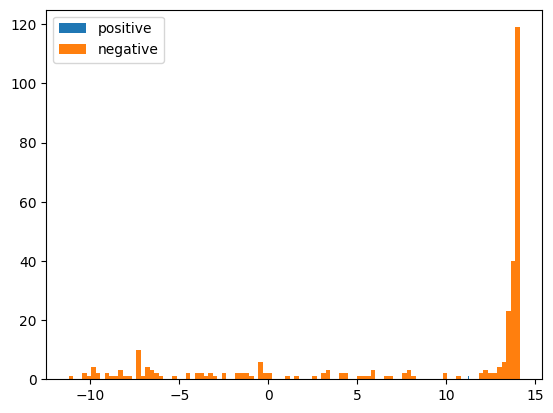

ROC AUC: 0.69
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

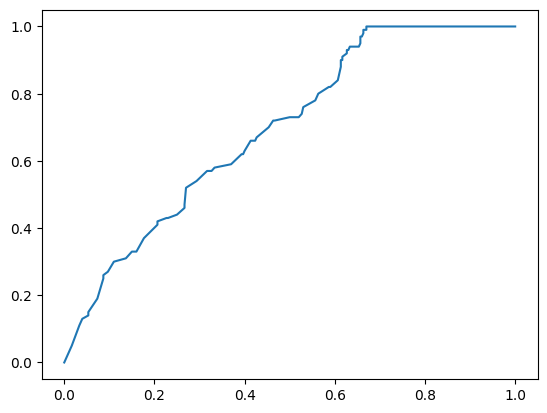

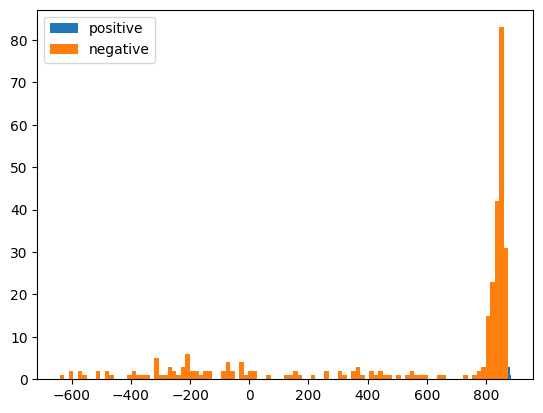

ROC AUC: 0.69
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

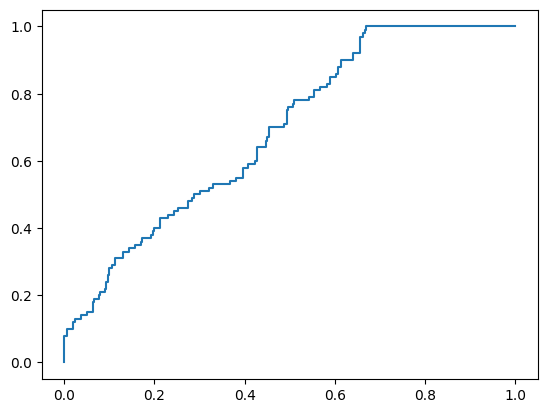

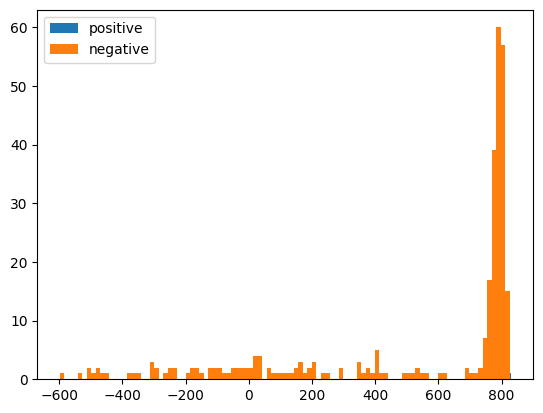

ROC AUC: 0.66
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

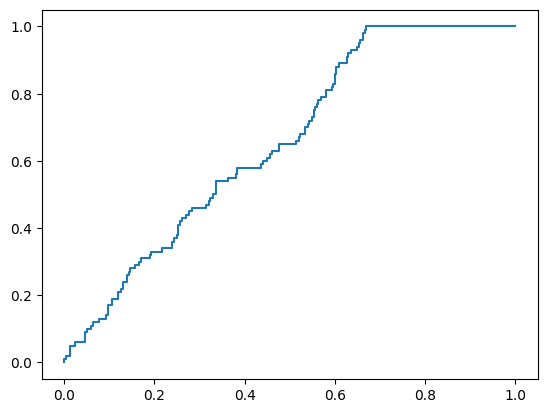

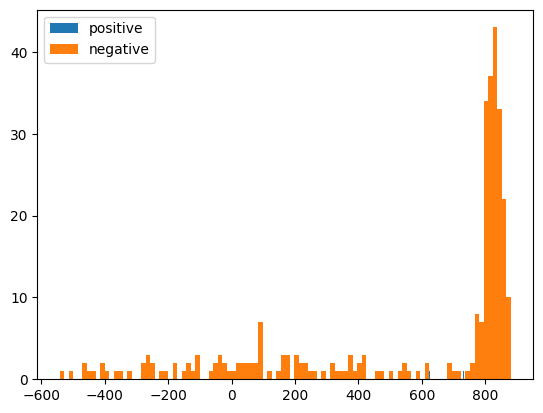

ROC AUC: 0.74
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

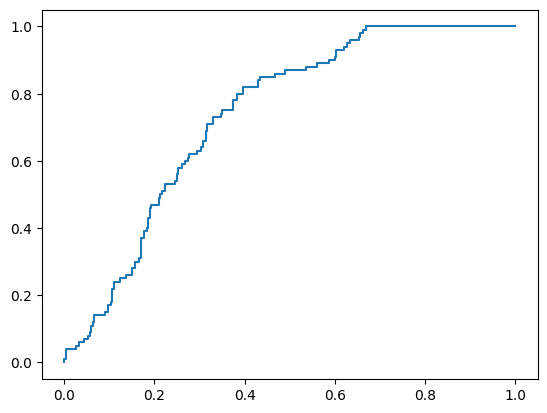

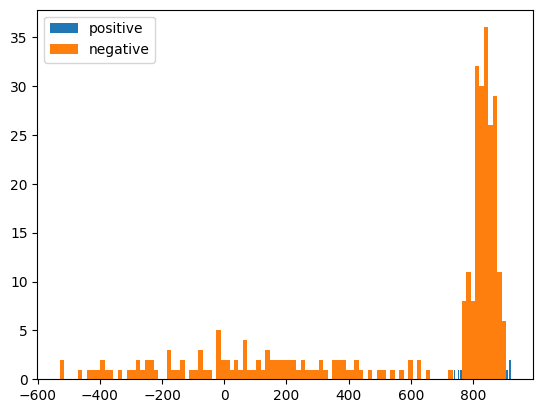

ROC AUC: 0.81
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

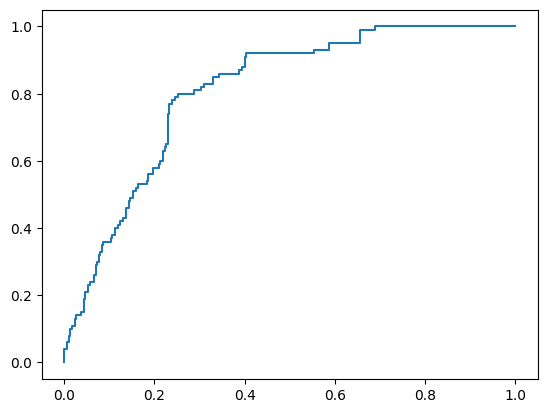

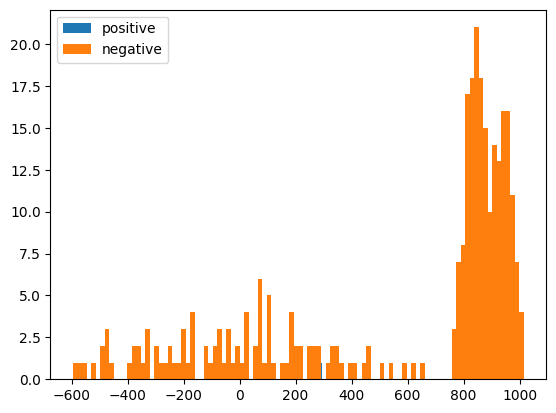

ROC AUC: 0.80
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

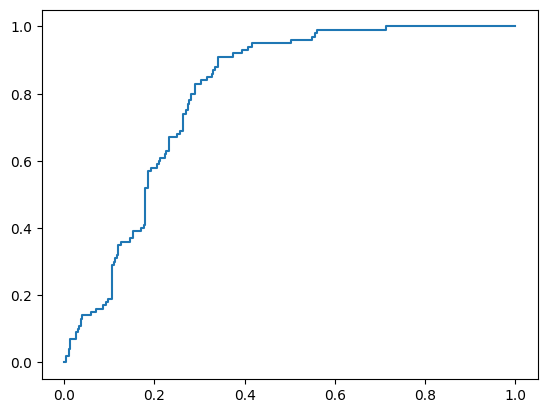

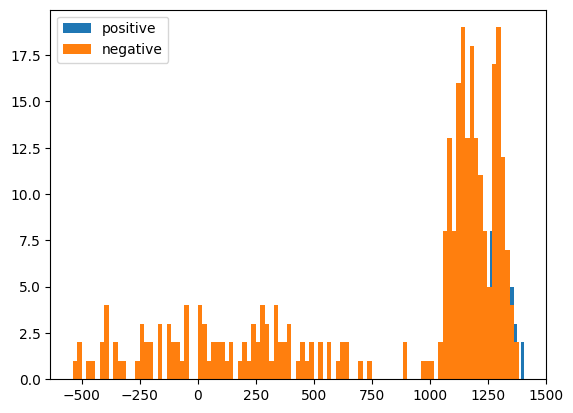

ROC AUC: 0.83
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

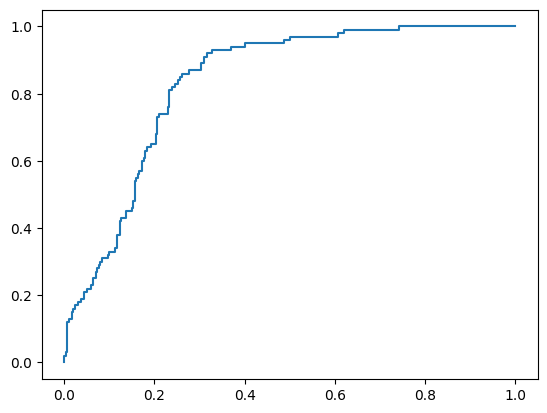

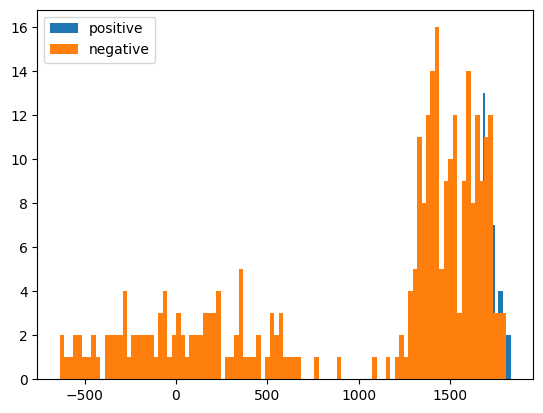

ROC AUC: 0.85
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

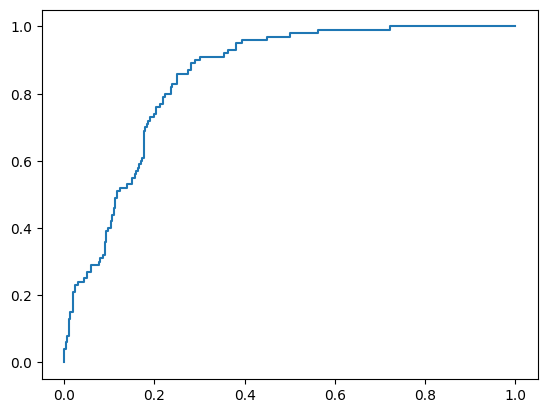

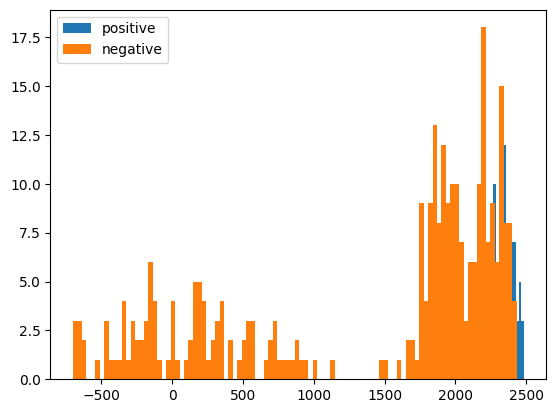

ROC AUC: 0.88
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

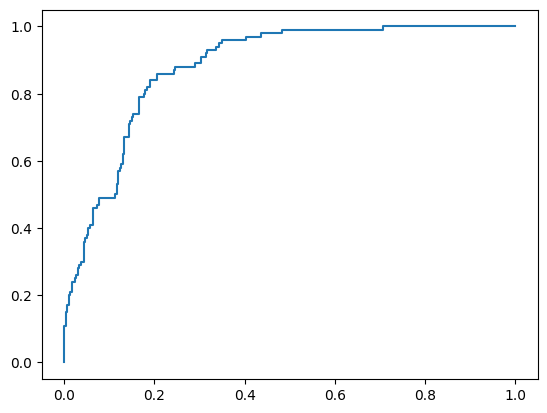

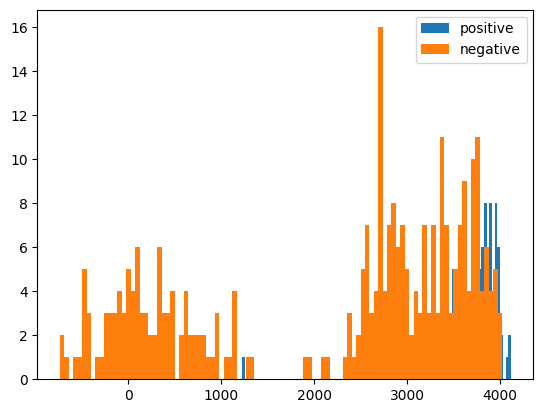

ROC AUC: 0.89
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

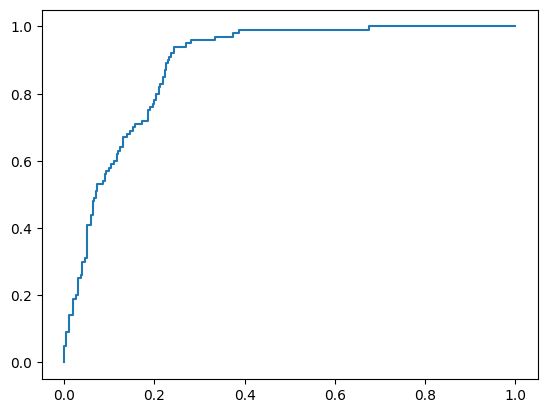

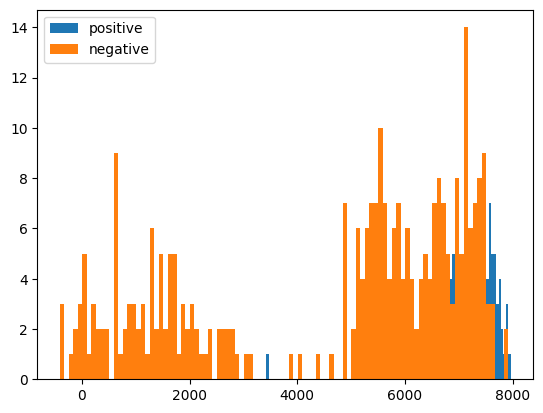

ROC AUC: 0.90
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

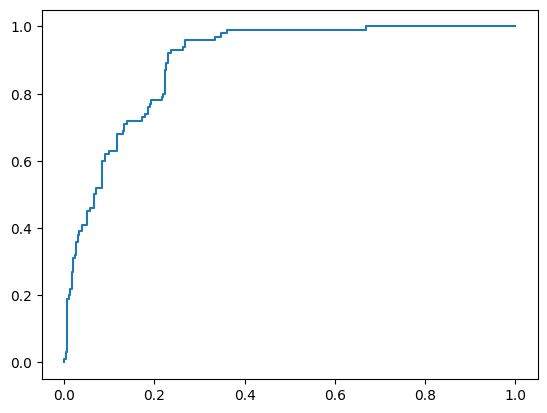

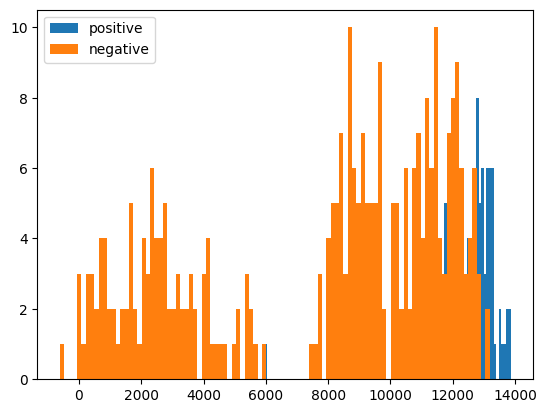

ROC AUC: 0.94


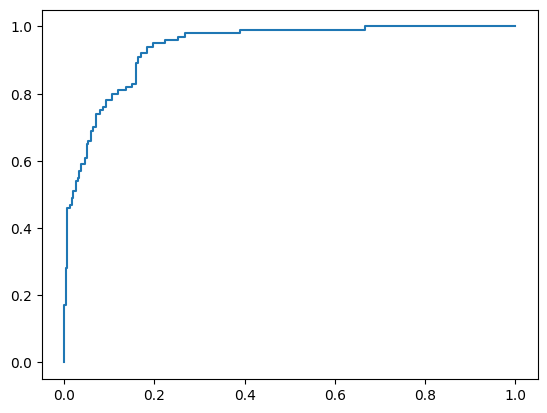

<Figure size 640x480 with 0 Axes>

In [30]:
resid_pre_aucs = auc_all_layers_single_plot(
    gpt2_small,
    12,
    "blocks.{}.hook_resid_pre",
    feature_dataset,
    baseline_dataset2,
    False,
    evaluation_dataset_big2,
    "dot",
)

batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_id

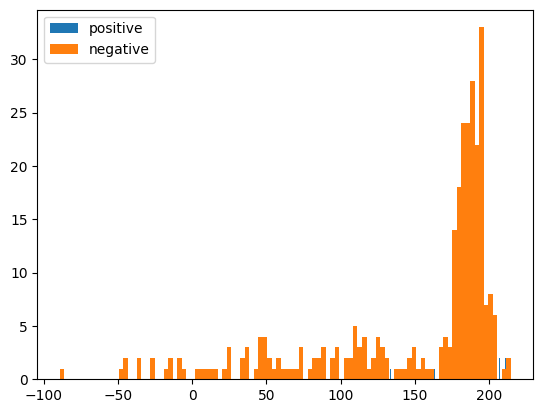

ROC AUC: 0.78
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

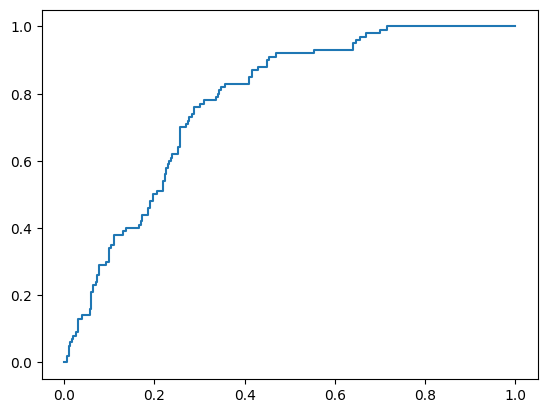

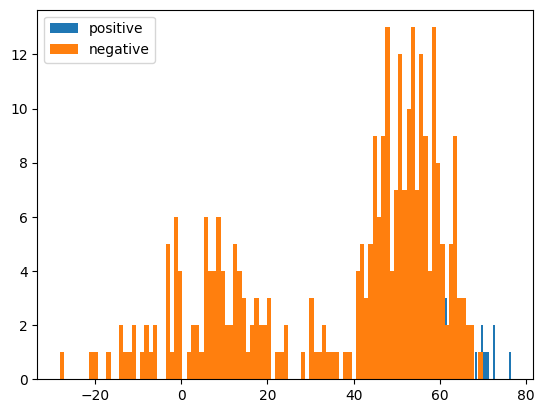

ROC AUC: 0.82
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

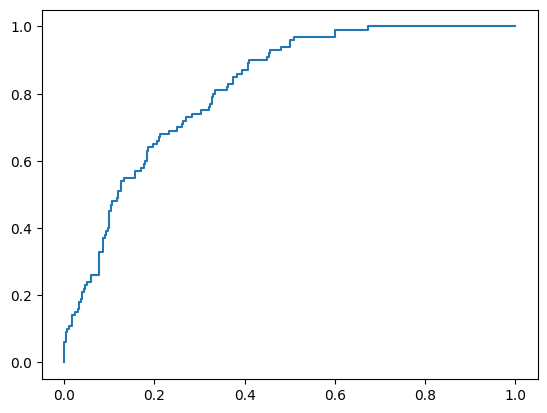

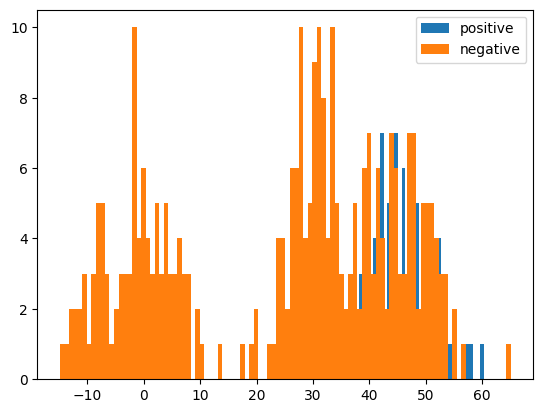

ROC AUC: 0.81
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

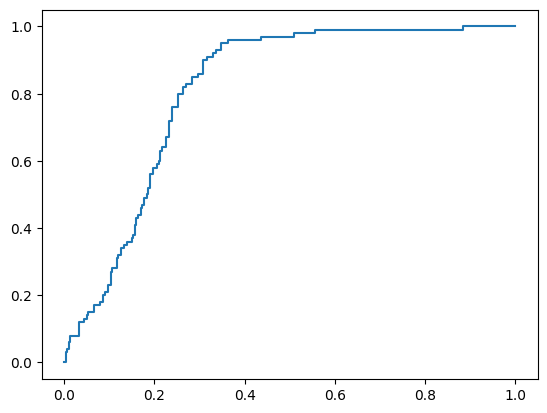

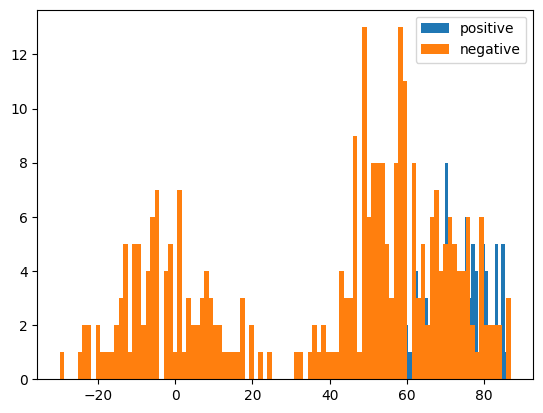

ROC AUC: 0.85
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

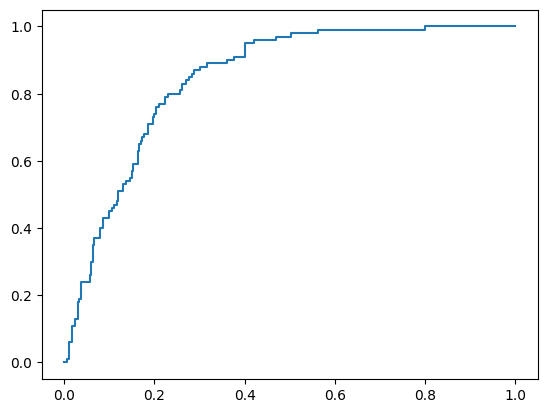

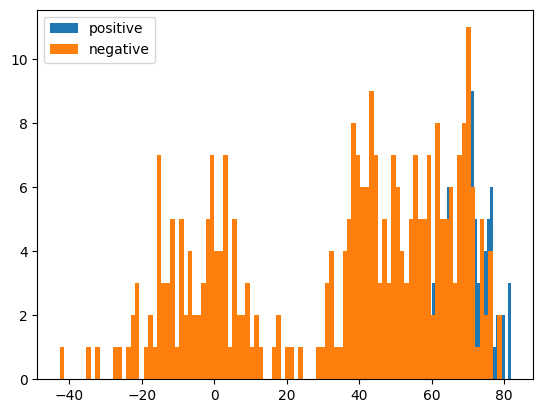

ROC AUC: 0.88
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

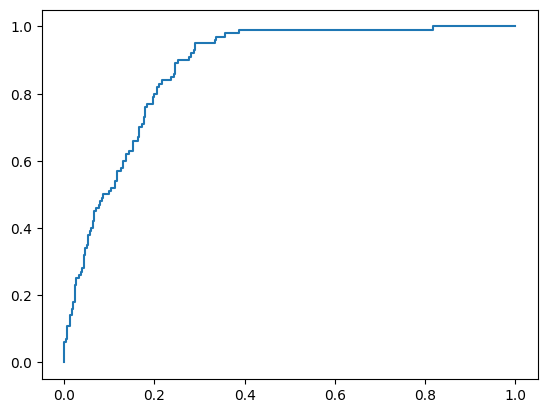

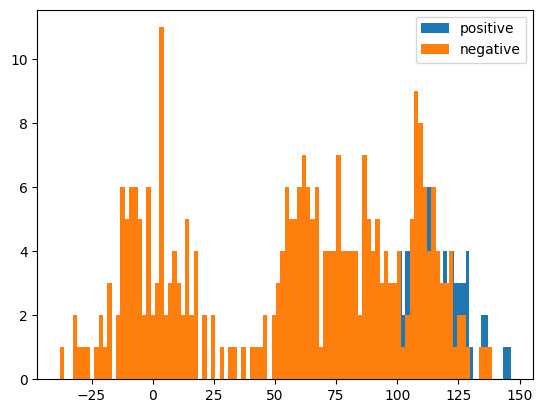

ROC AUC: 0.86
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

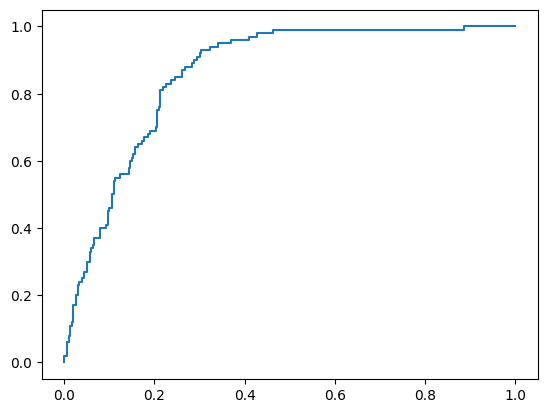

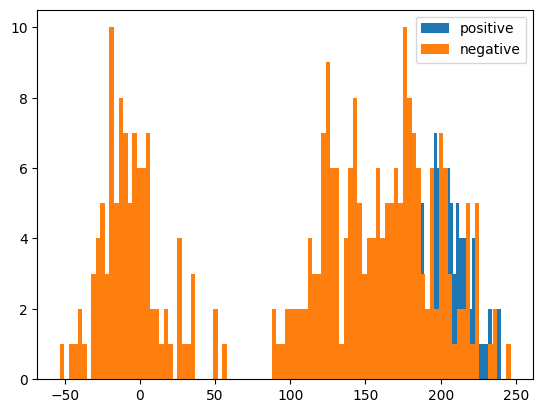

ROC AUC: 0.87
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

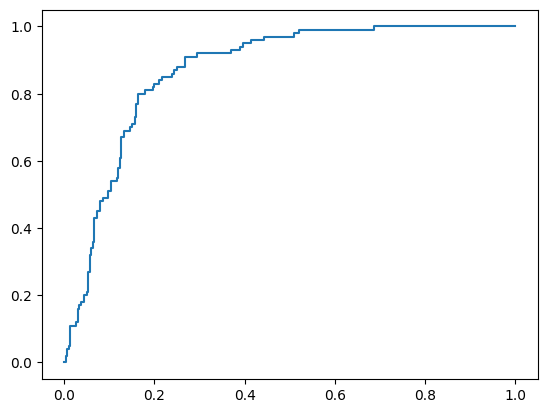

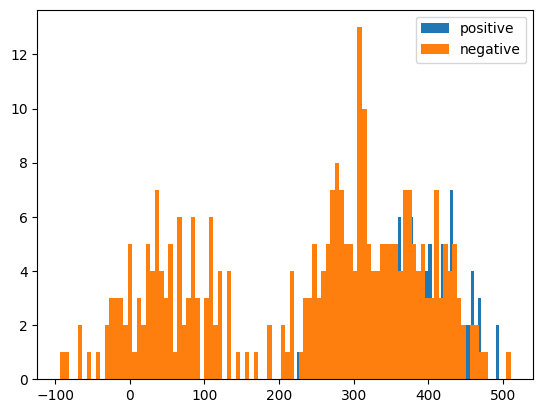

ROC AUC: 0.85
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

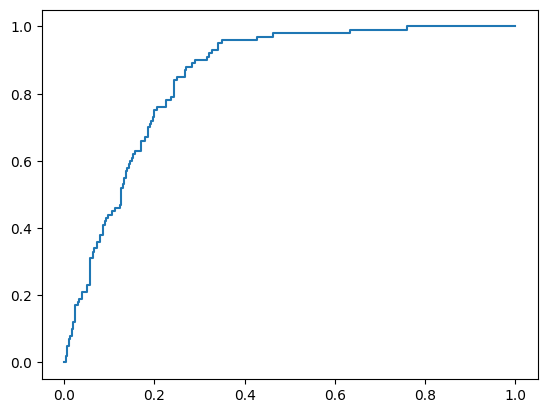

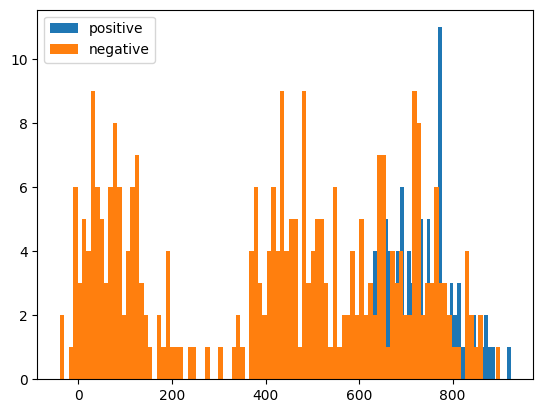

ROC AUC: 0.86
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

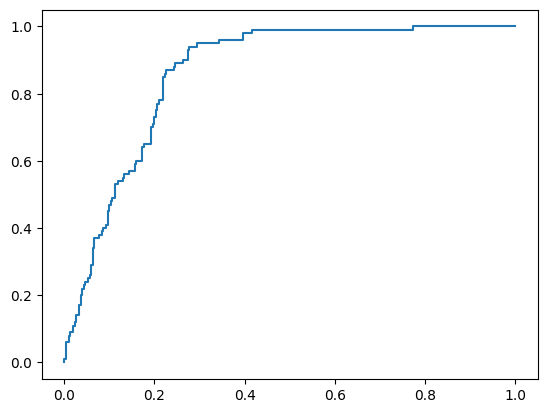

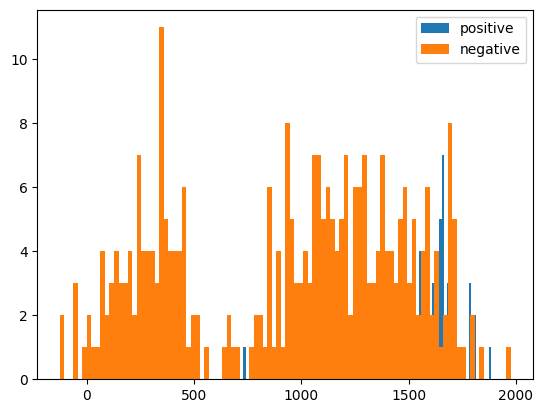

ROC AUC: 0.85
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

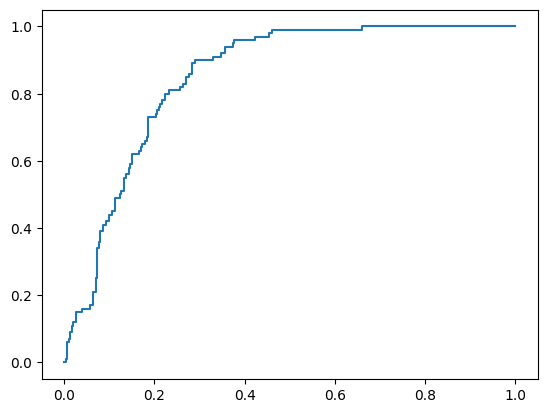

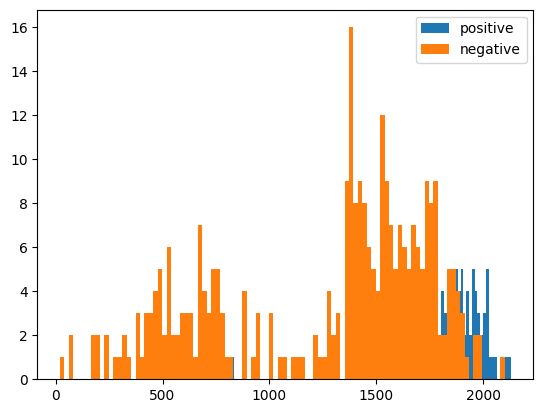

ROC AUC: 0.91
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

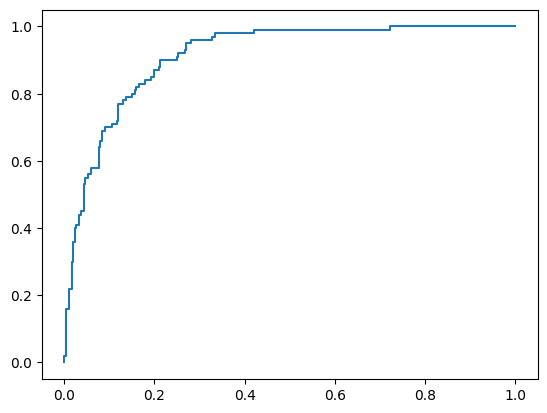

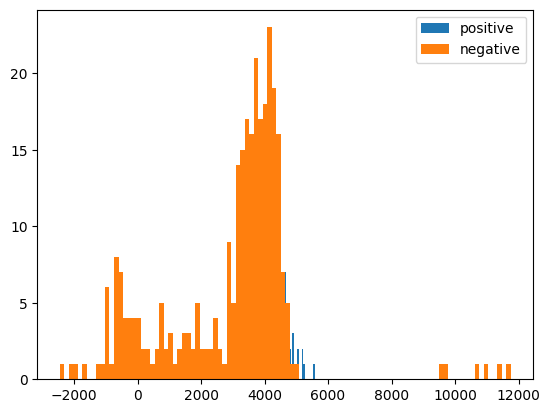

ROC AUC: 0.83


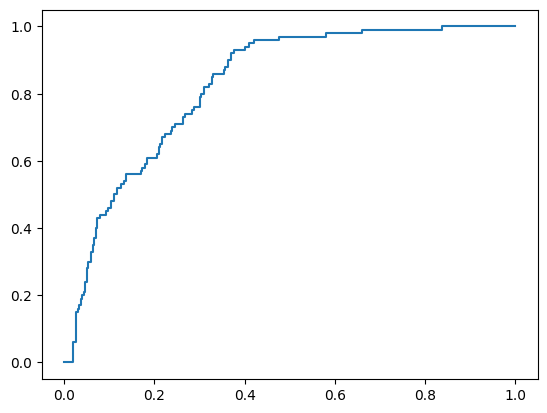

<Figure size 640x480 with 0 Axes>

In [31]:
mlp_aucs = auc_all_layers_single_plot(
    gpt2_small,
    12,
    "blocks.{}.hook_mlp_out",
    feature_dataset,
    baseline_dataset2,
    False,
    evaluation_dataset_big2,
    "dot",
)

batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_id

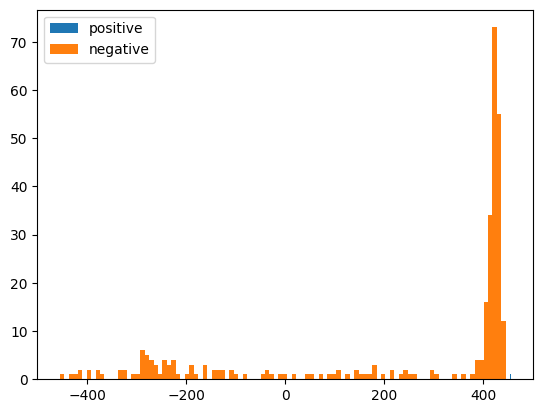

ROC AUC: 0.67
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

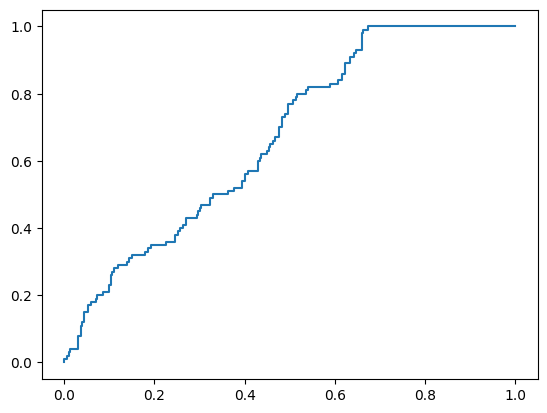

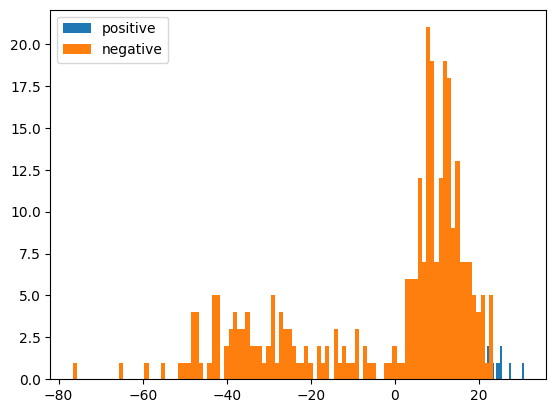

ROC AUC: 0.81
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

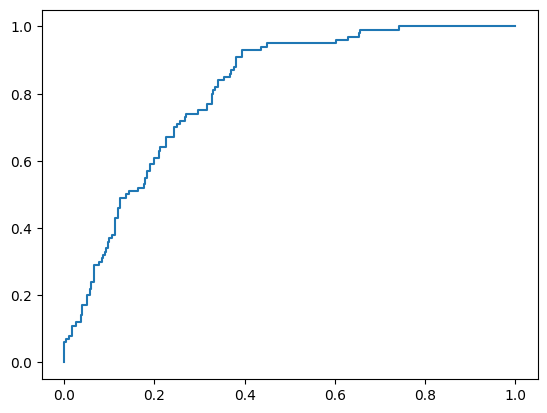

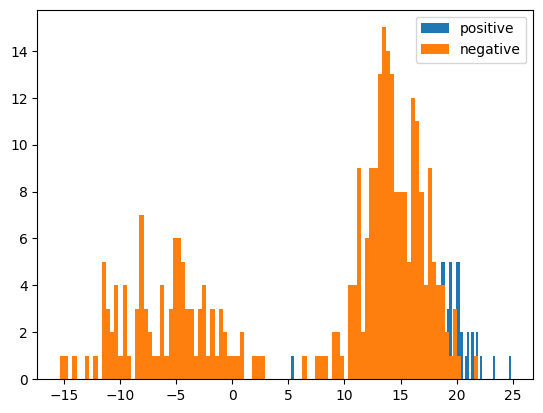

ROC AUC: 0.90
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

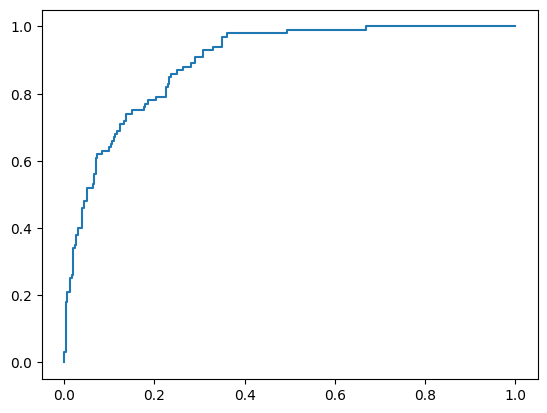

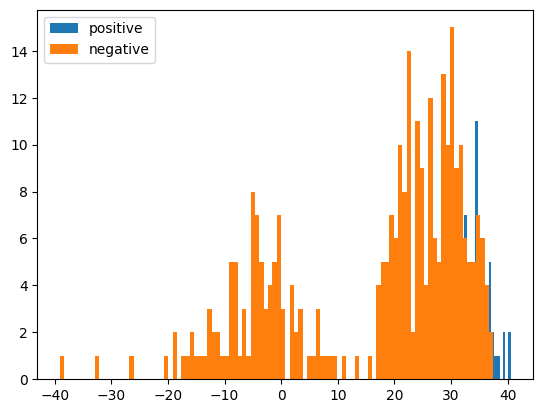

ROC AUC: 0.85
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

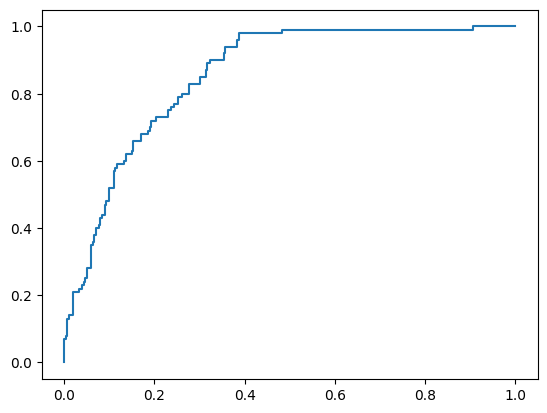

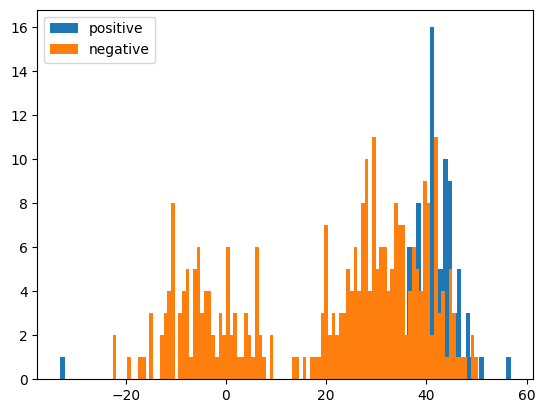

ROC AUC: 0.86
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

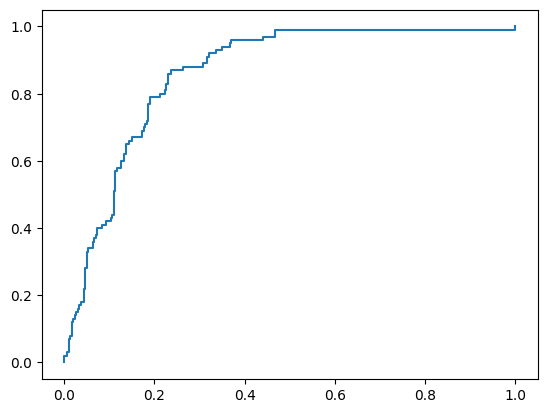

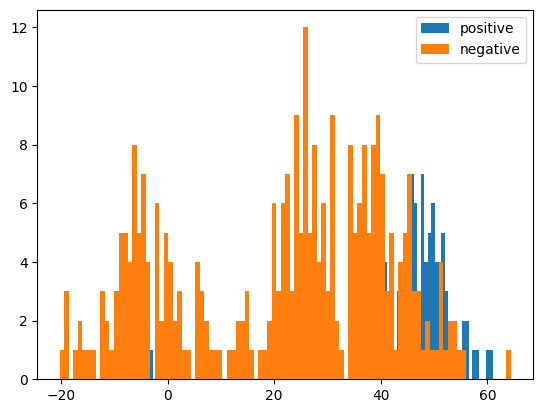

ROC AUC: 0.90
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

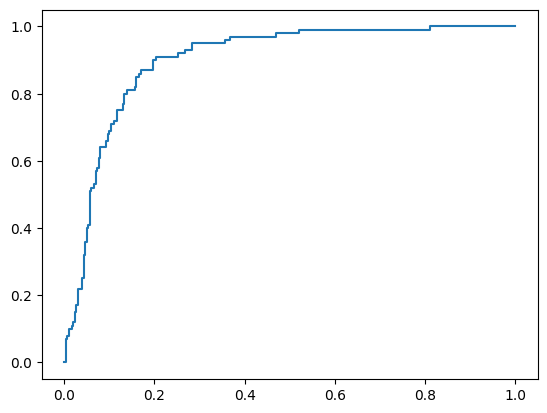

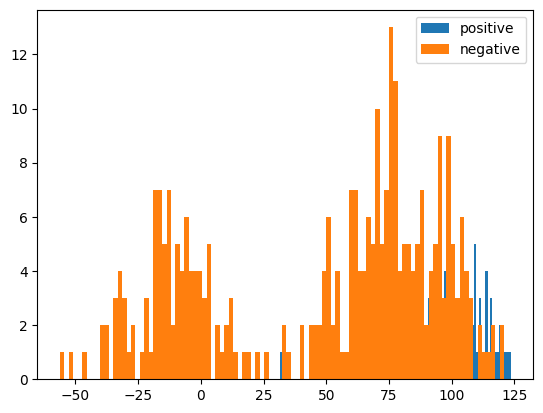

ROC AUC: 0.88
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

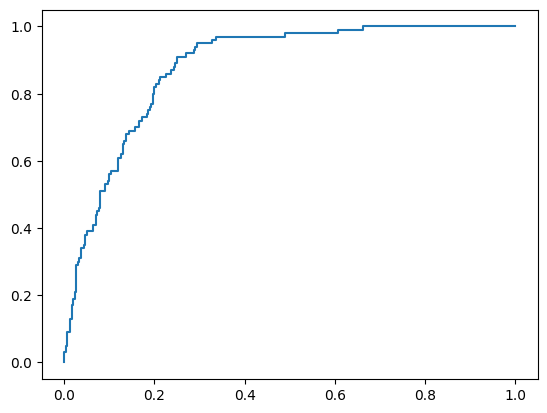

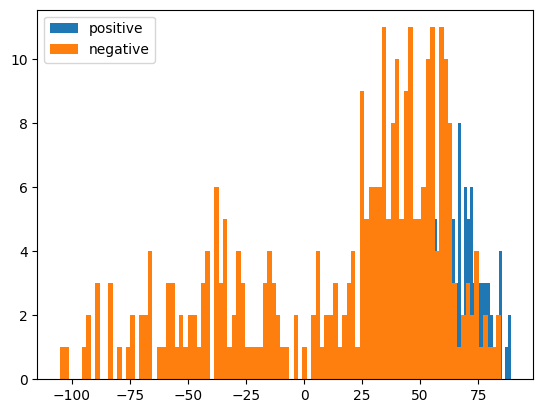

ROC AUC: 0.88
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

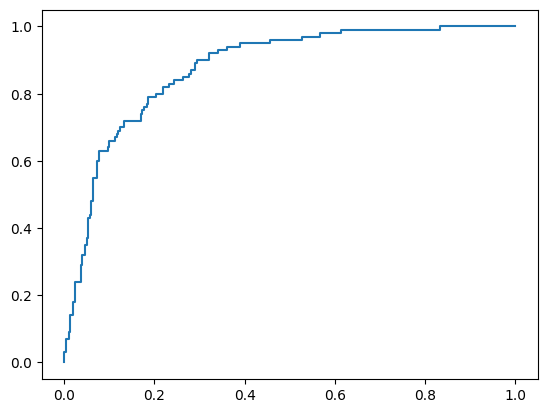

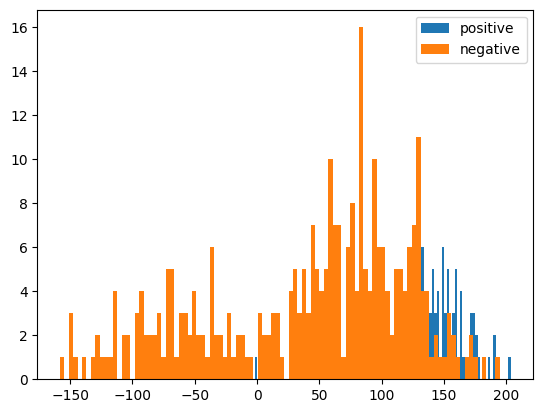

ROC AUC: 0.91
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

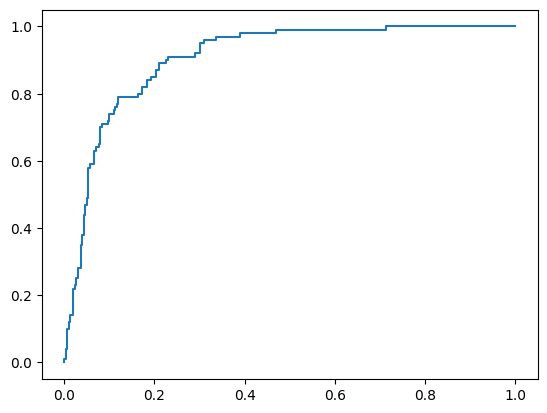

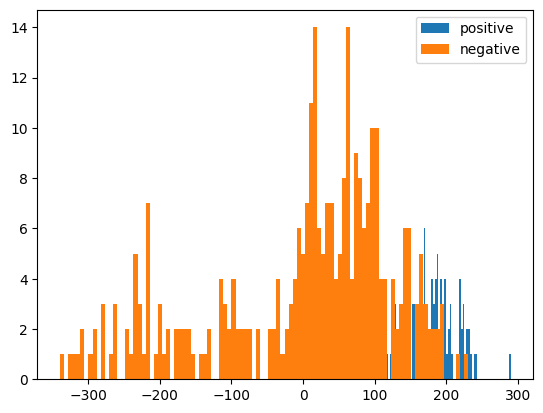

ROC AUC: 0.94
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

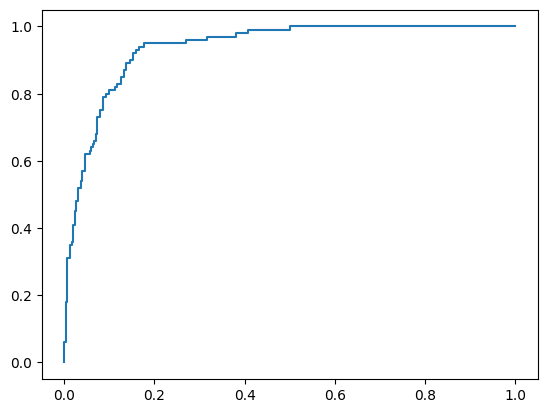

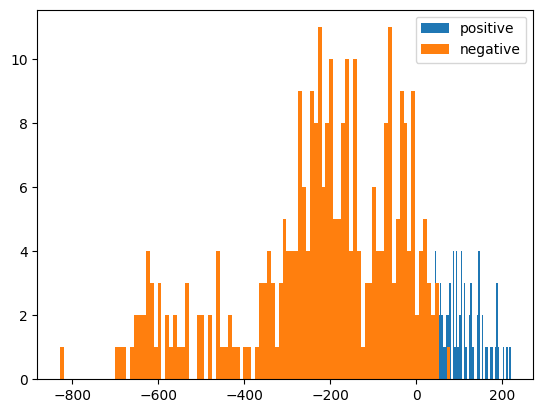

ROC AUC: 0.95
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

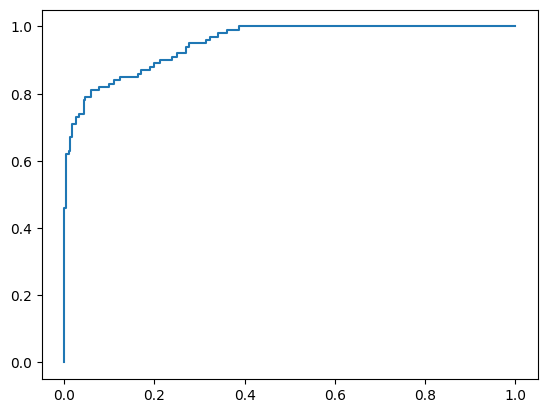

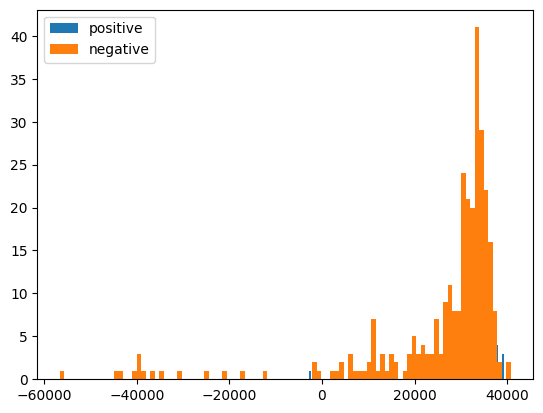

ROC AUC: 0.74


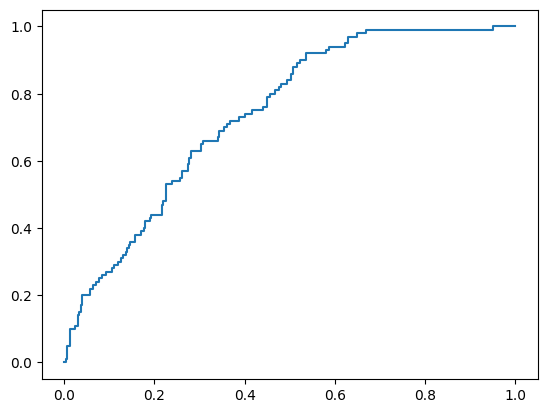

<Figure size 640x480 with 0 Axes>

In [32]:
attn_aucs = auc_all_layers_single_plot(
    gpt2_small,
    12,
    "blocks.{}.hook_attn_out",
    feature_dataset,
    baseline_dataset2,
    False,
    evaluation_dataset_big2,
    "dot",
)

In [33]:
attn_aucs

[0.6698,
 0.8084,
 0.8953666666666666,
 0.8548666666666667,
 0.8602333333333334,
 0.8993666666666666,
 0.8807666666666667,
 0.8765666666666667,
 0.9062666666666667,
 0.9367666666666667,
 0.9501333333333333,
 0.7398]

In [34]:
mlp_aucs

[0.7781666666666667,
 0.8166,
 0.8123,
 0.8454333333333335,
 0.8774333333333333,
 0.8596333333333335,
 0.8706999999999999,
 0.8523000000000001,
 0.8613333333333334,
 0.8494333333333334,
 0.9128333333333334,
 0.8270333333333333]

In [35]:
resid_pre_aucs

[0.6944666666666667,
 0.6875666666666667,
 0.6551333333333333,
 0.7379666666666667,
 0.8087333333333333,
 0.8003333333333333,
 0.8340666666666666,
 0.8506666666666667,
 0.8812,
 0.8878666666666666,
 0.8965666666666667,
 0.9384333333333333]

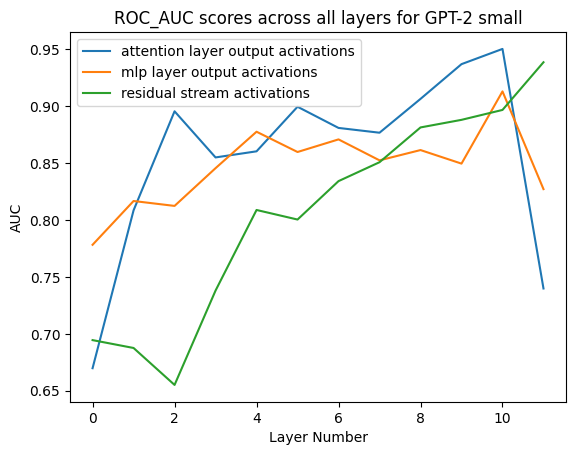

In [40]:
plt.plot(attn_aucs, label="attention layer output activations")
plt.plot(mlp_aucs, label="mlp layer output activations")
plt.plot(resid_pre_aucs, label="residual stream activations")
plt.title(f"ROC_AUC scores across all layers for GPT-2 small")
plt.xlabel("Layer Number")
plt.ylabel("AUC")
plt.legend()
plt.show()

batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_id

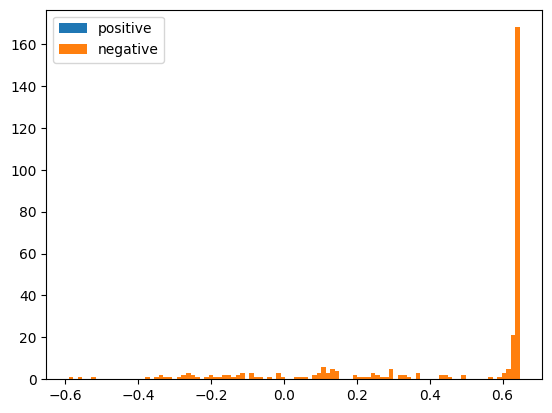

ROC AUC: 0.60
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

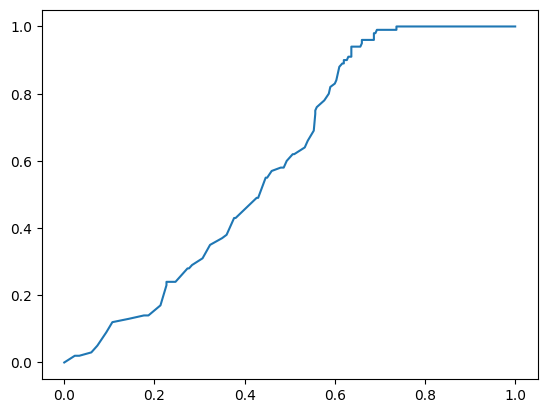

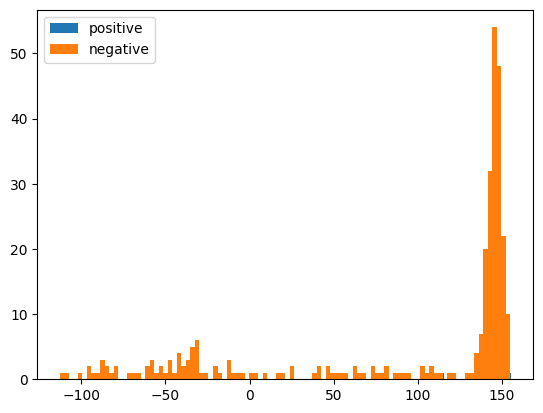

ROC AUC: 0.76
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

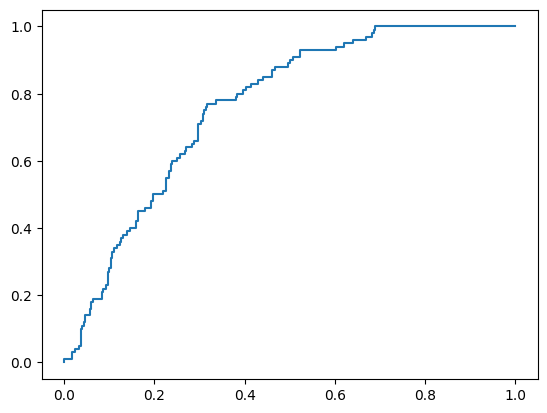

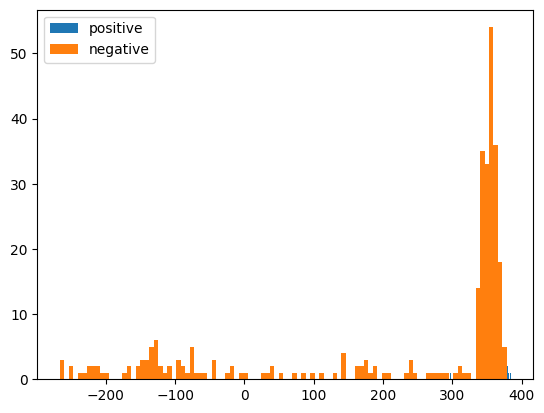

ROC AUC: 0.90
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

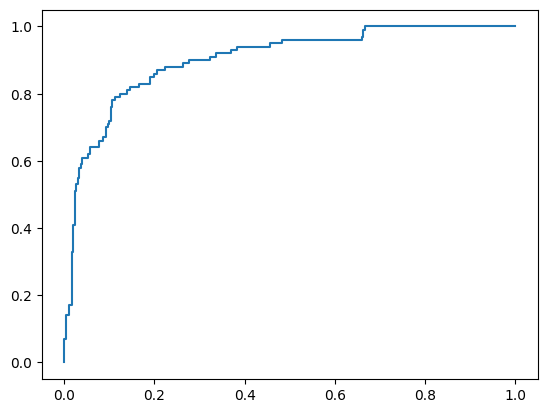

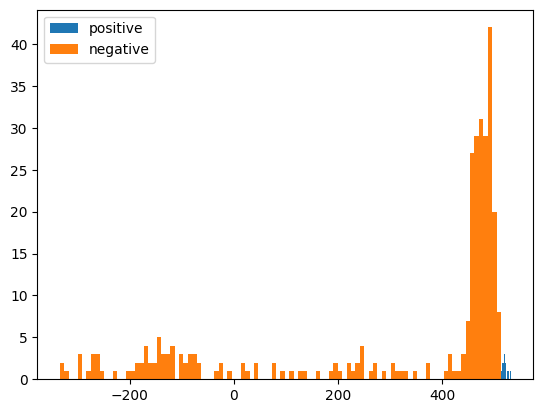

ROC AUC: 0.93
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

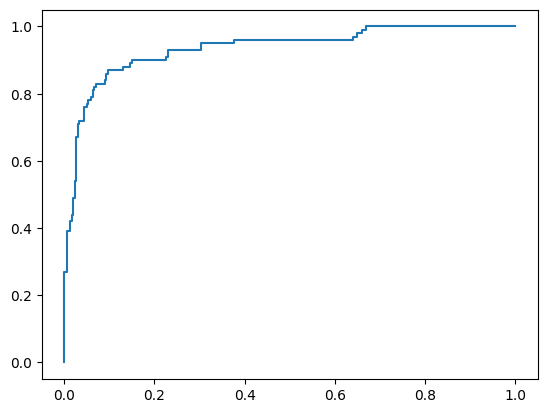

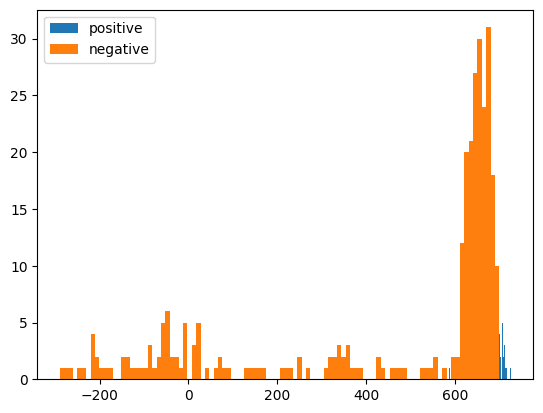

ROC AUC: 0.91
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

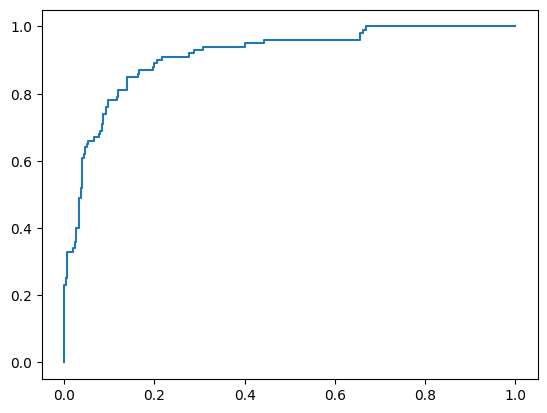

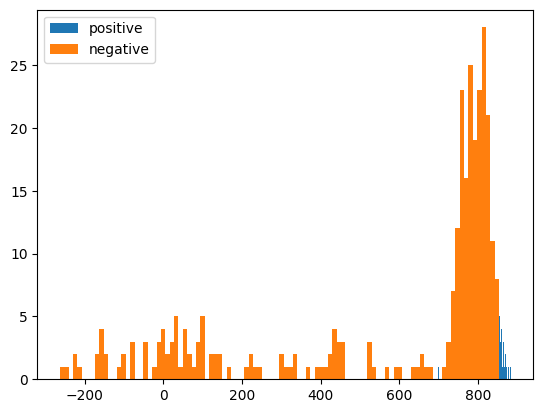

ROC AUC: 0.92
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

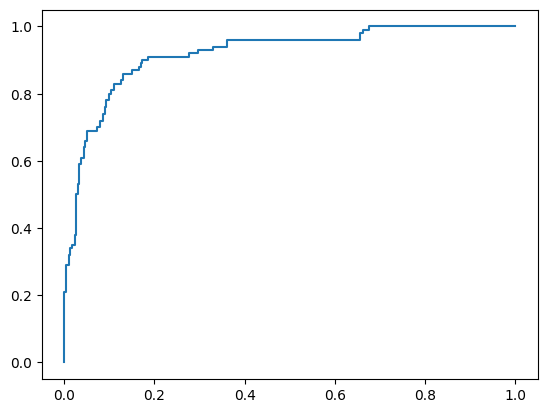

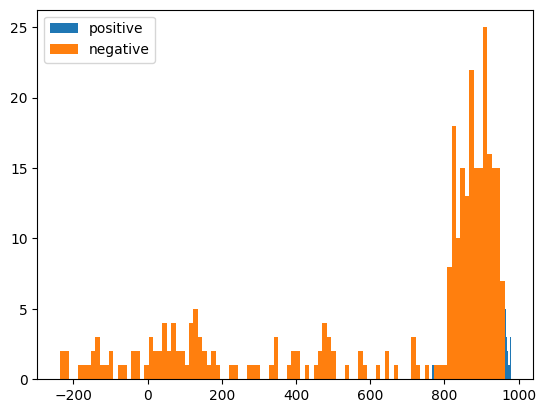

ROC AUC: 0.90
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

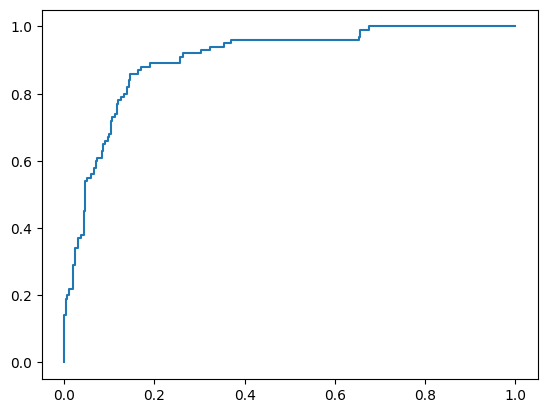

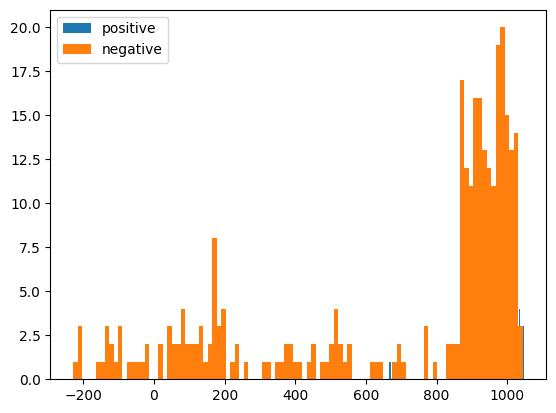

ROC AUC: 0.87
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

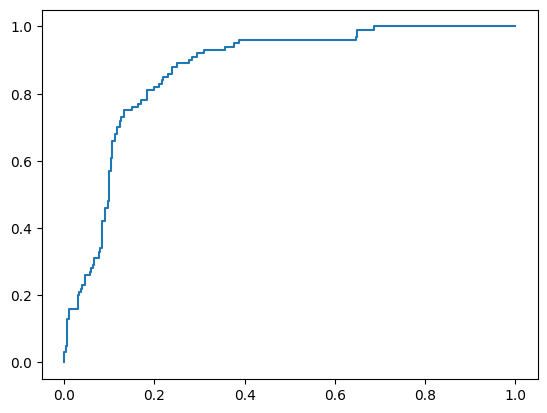

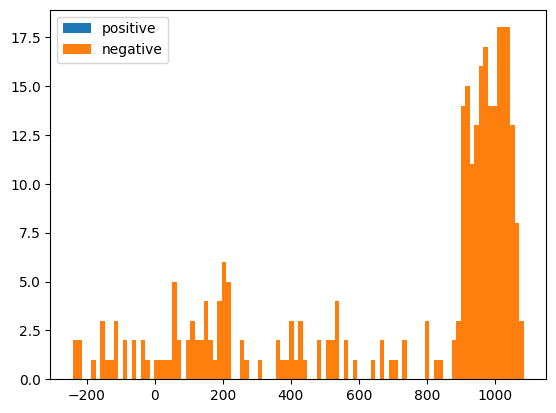

ROC AUC: 0.85
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

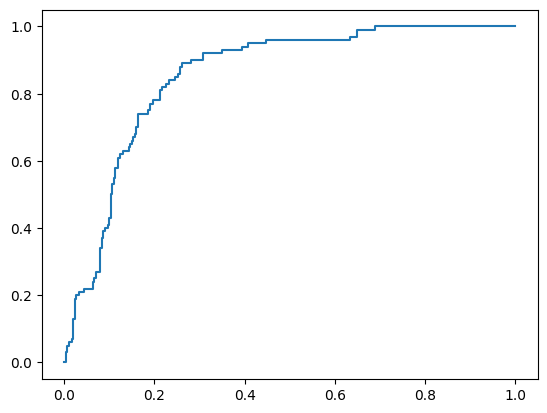

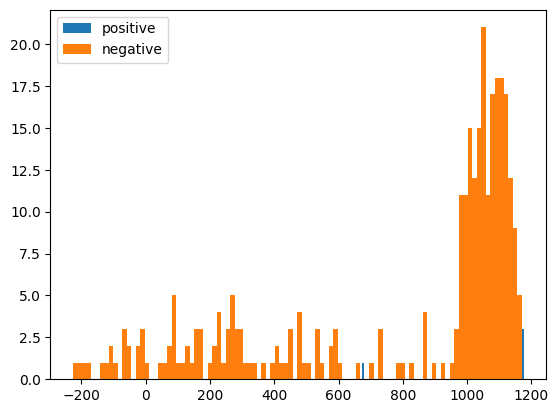

ROC AUC: 0.86
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

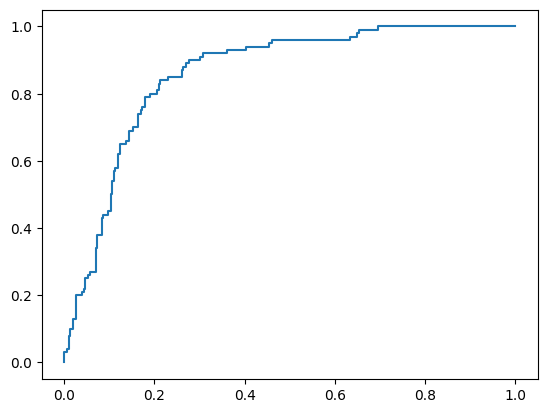

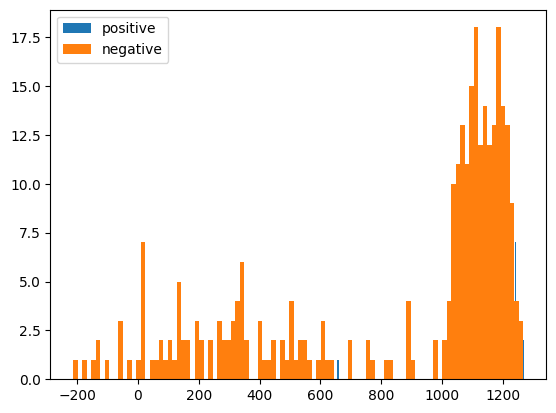

ROC AUC: 0.85
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

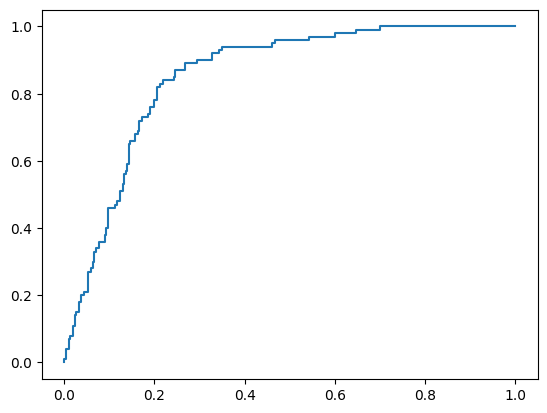

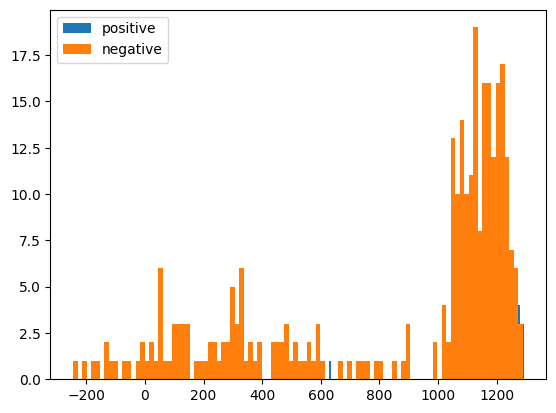

ROC AUC: 0.85
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

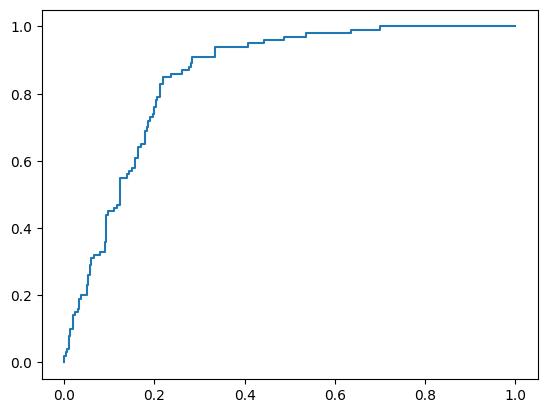

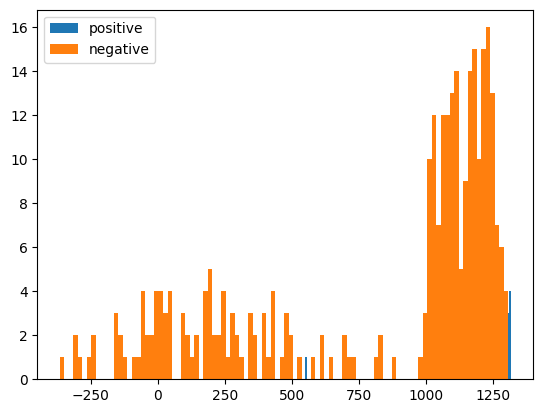

ROC AUC: 0.87
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

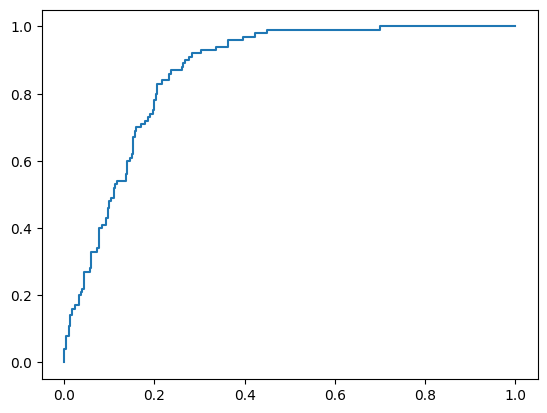

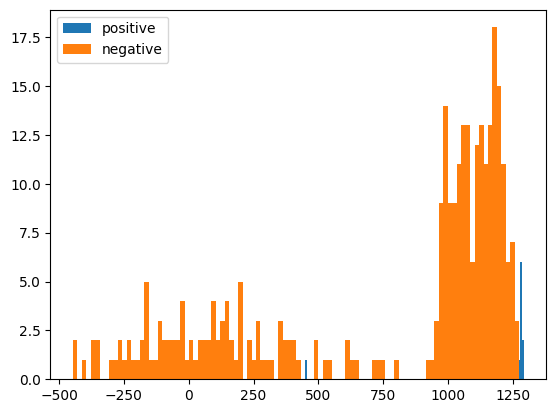

ROC AUC: 0.88
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

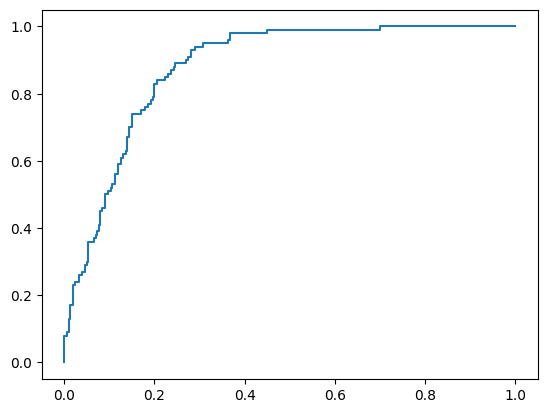

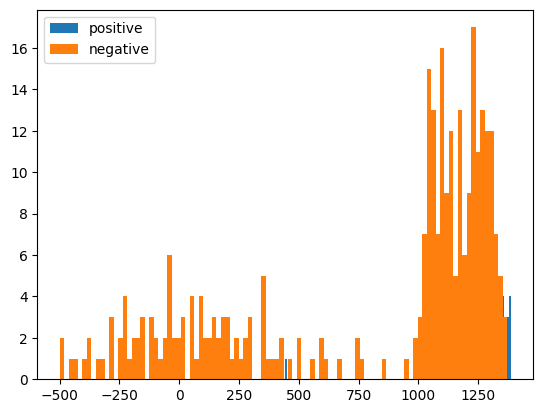

ROC AUC: 0.87
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

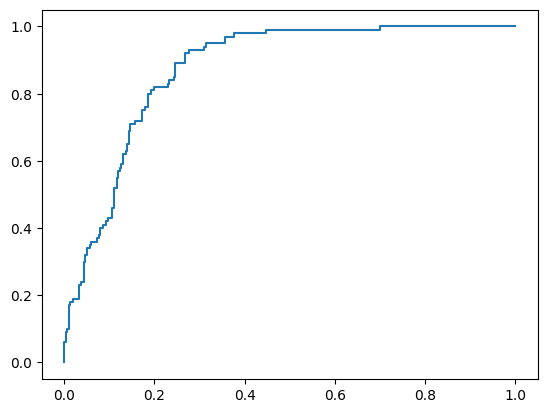

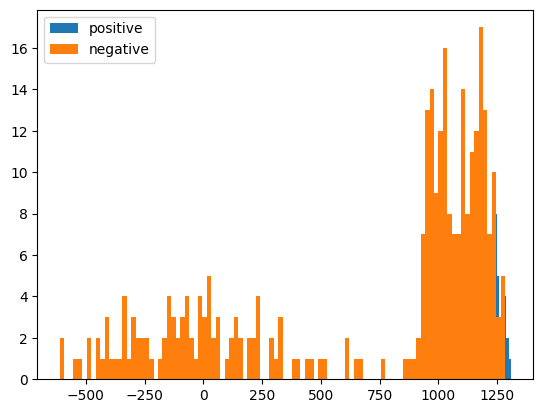

ROC AUC: 0.87
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

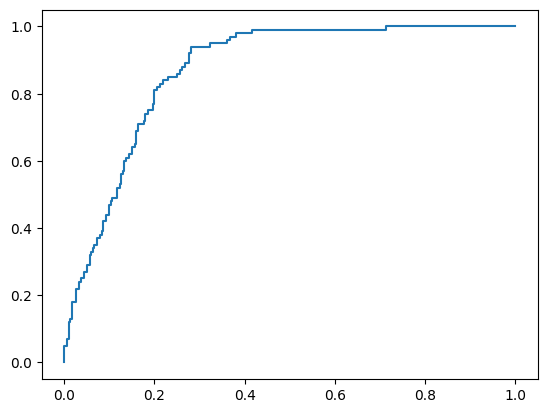

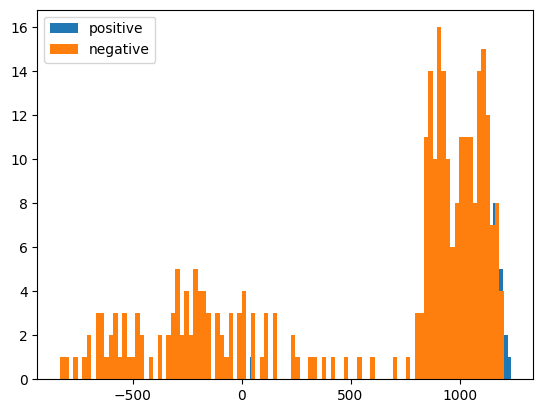

ROC AUC: 0.86
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

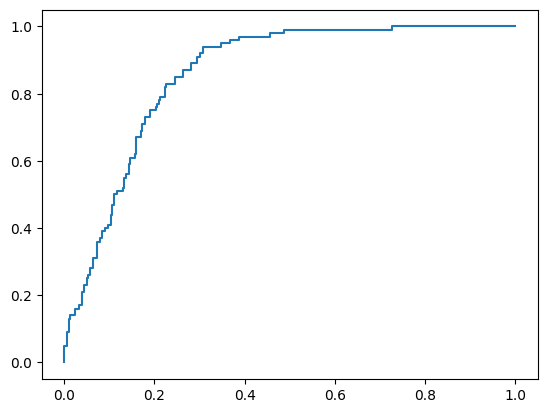

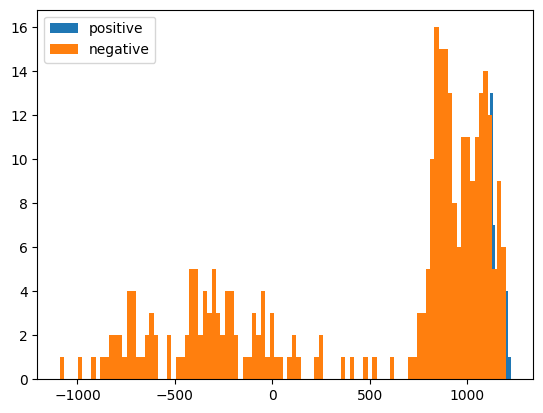

ROC AUC: 0.85
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

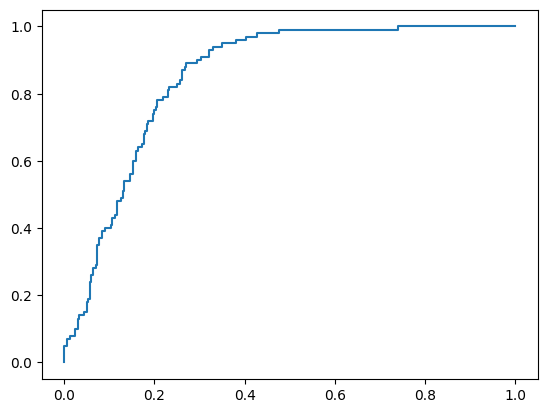

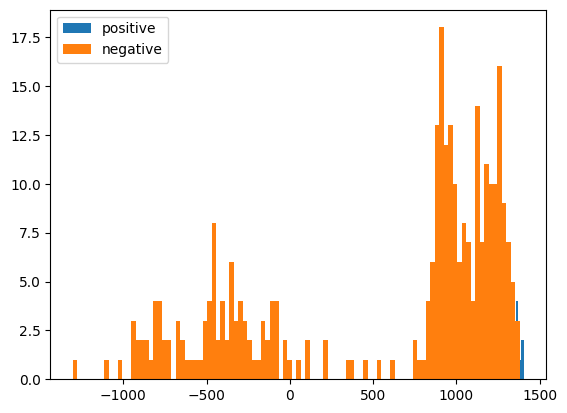

ROC AUC: 0.85
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

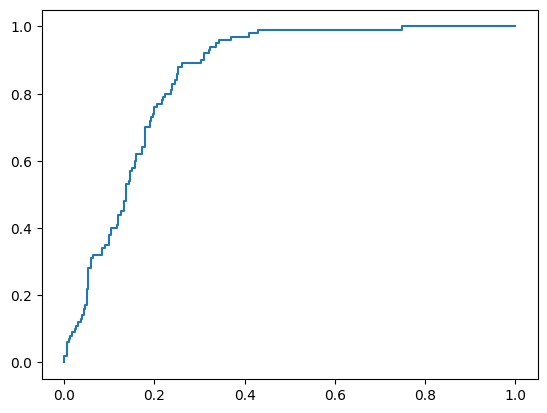

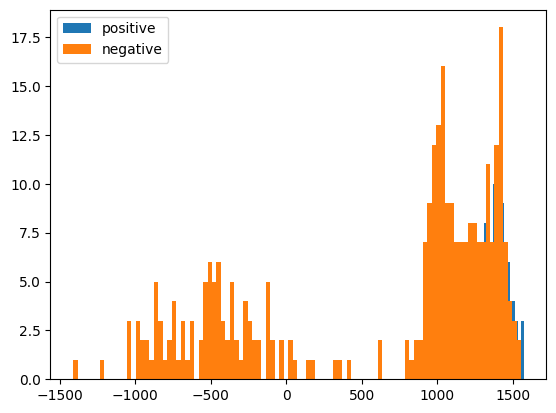

ROC AUC: 0.85
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

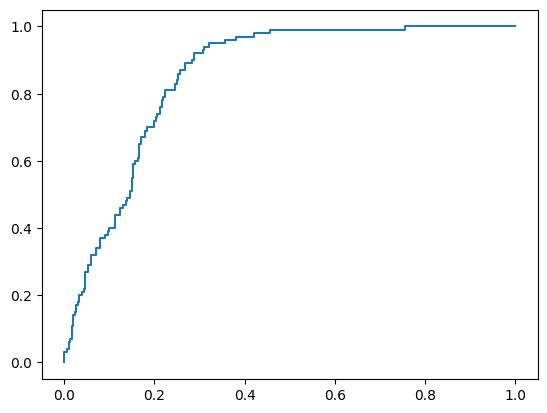

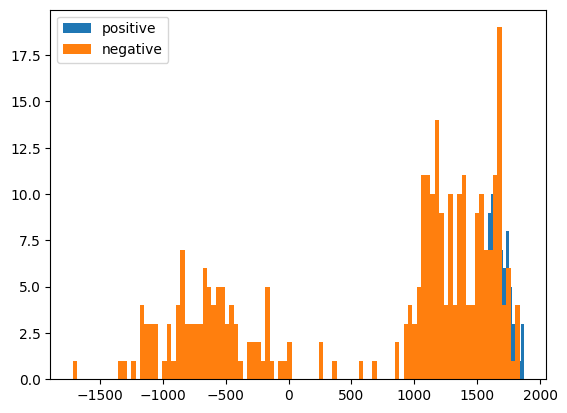

ROC AUC: 0.85
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

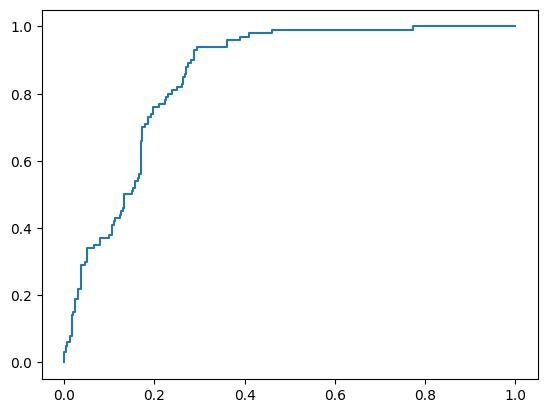

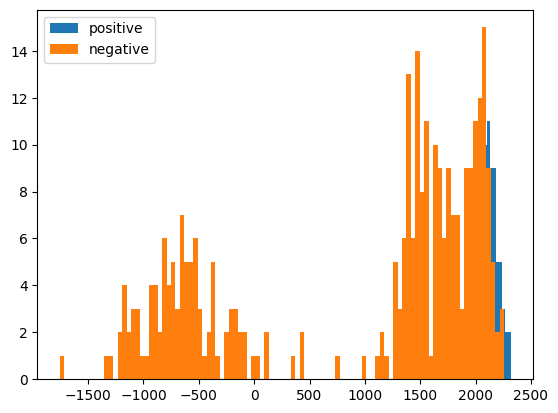

ROC AUC: 0.88
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

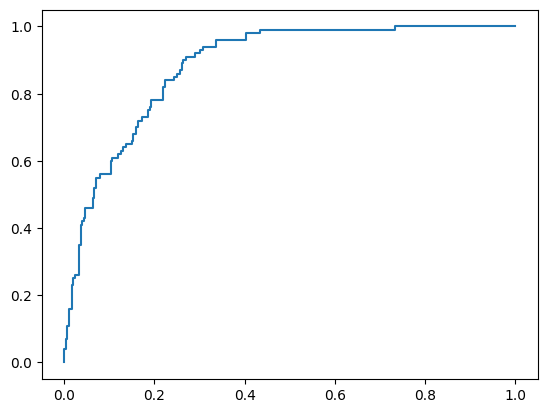

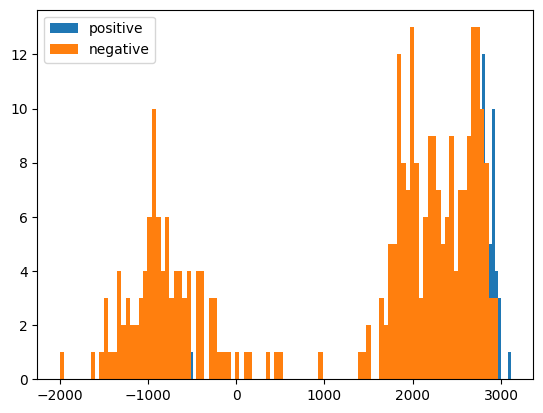

ROC AUC: 0.87
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

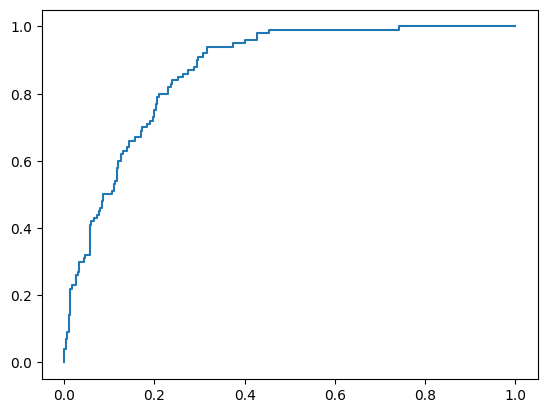

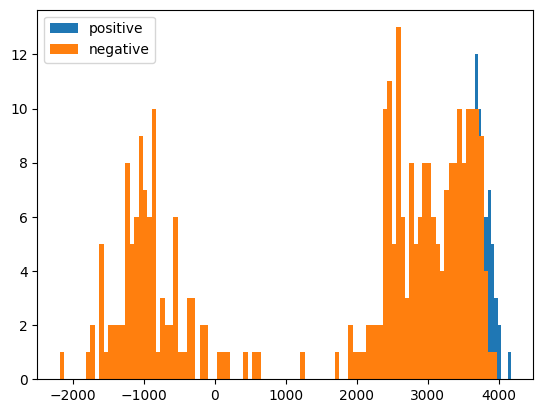

ROC AUC: 0.88
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

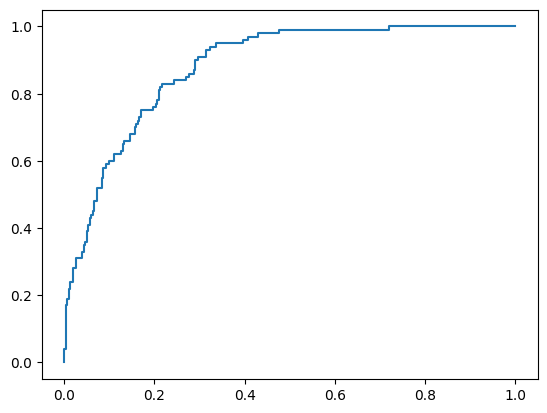

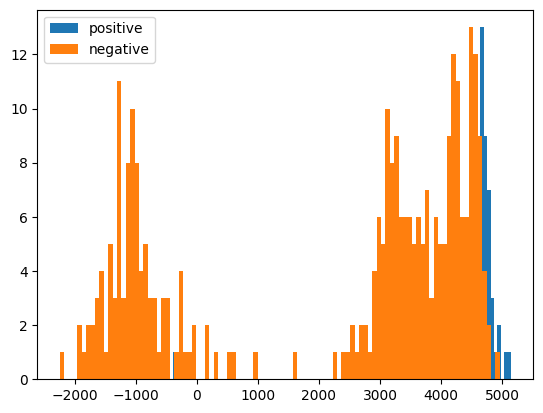

ROC AUC: 0.88
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

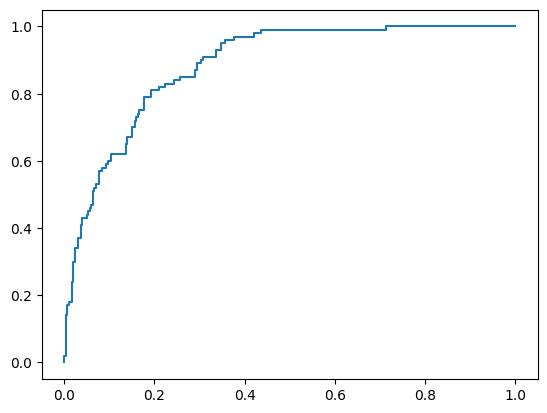

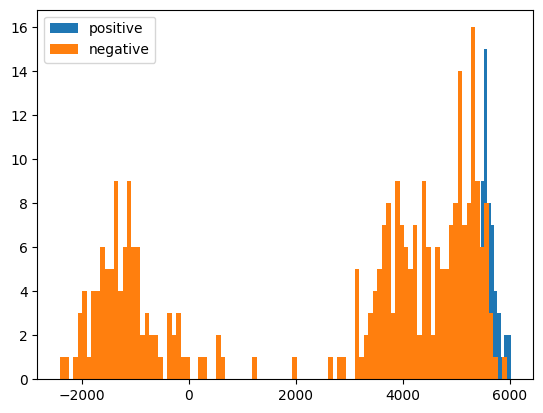

ROC AUC: 0.88
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

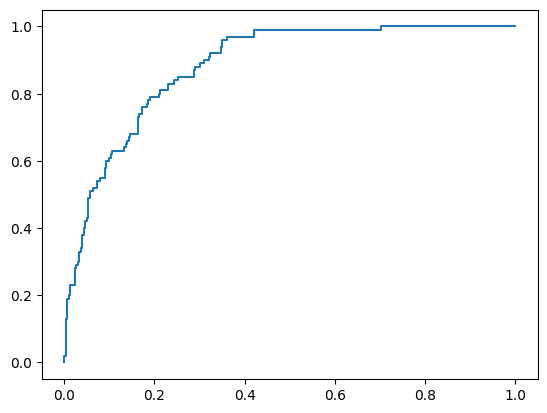

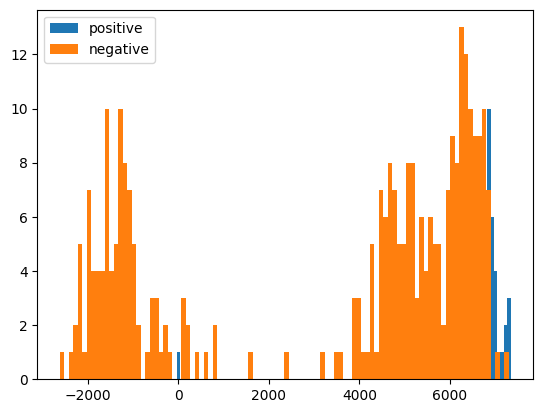

ROC AUC: 0.87
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

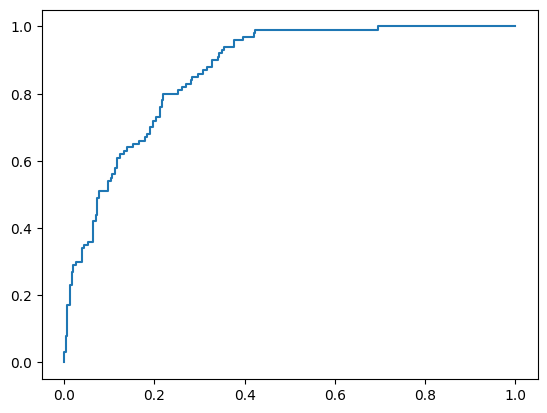

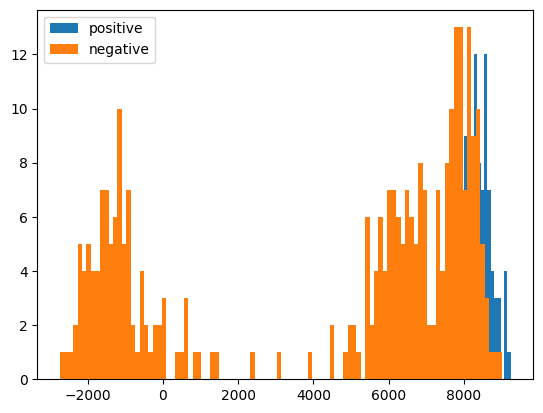

ROC AUC: 0.89
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

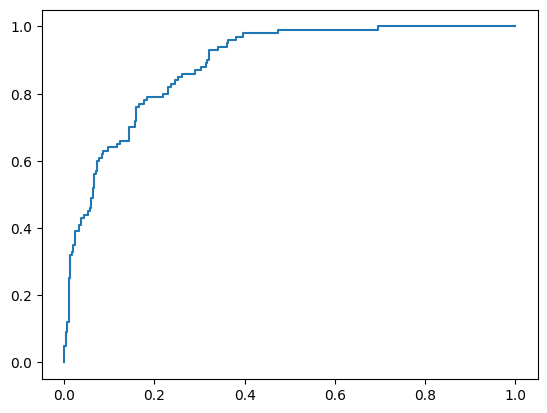

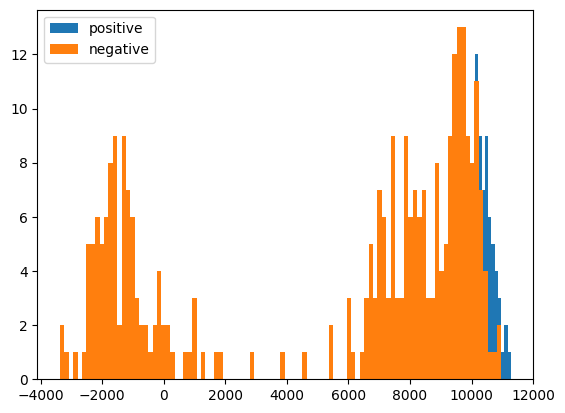

ROC AUC: 0.89
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

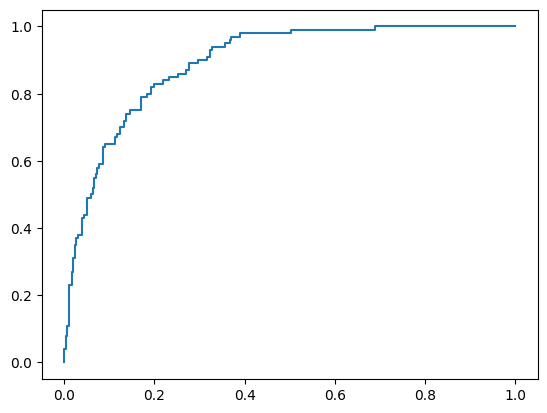

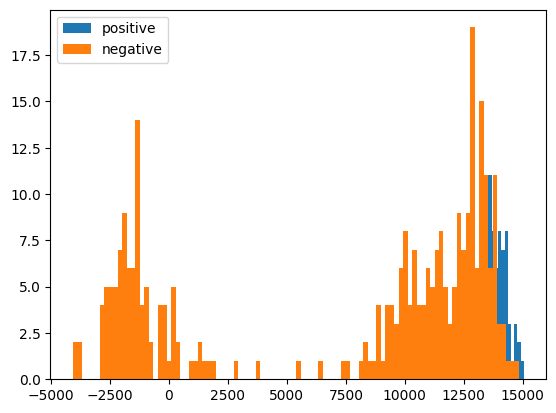

ROC AUC: 0.88
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

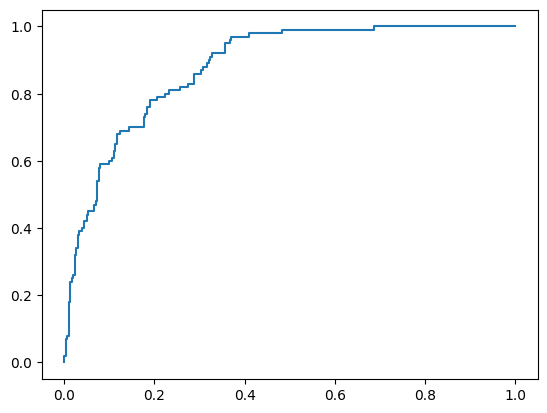

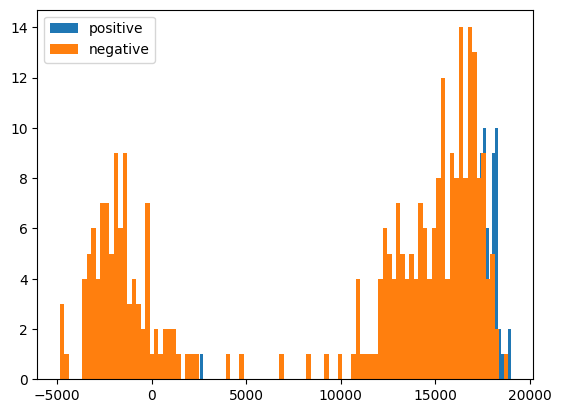

ROC AUC: 0.88
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

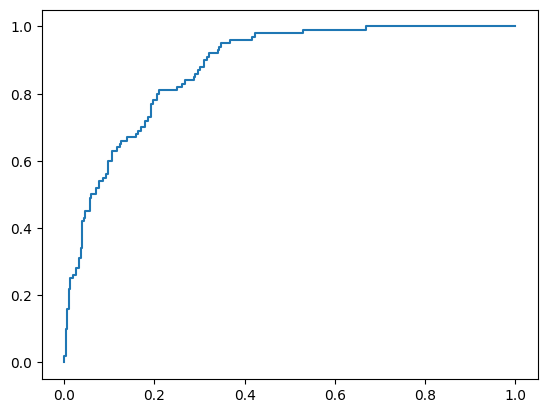

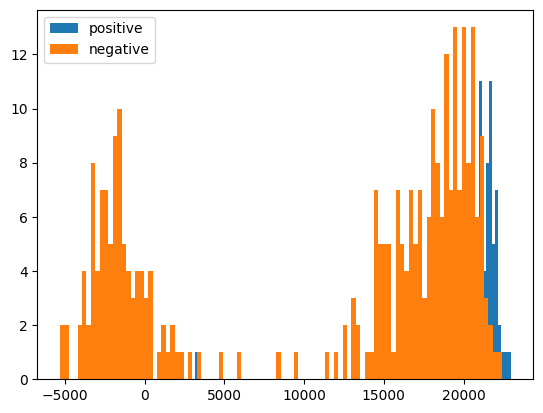

ROC AUC: 0.89
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

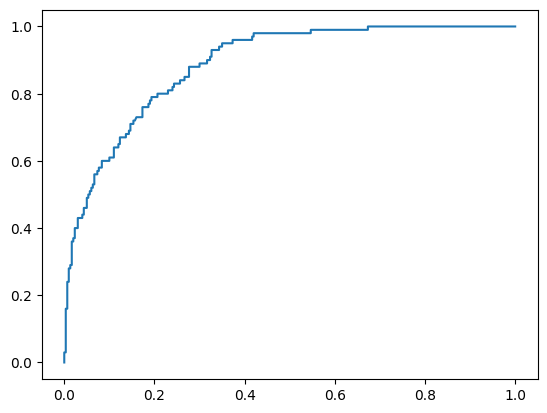

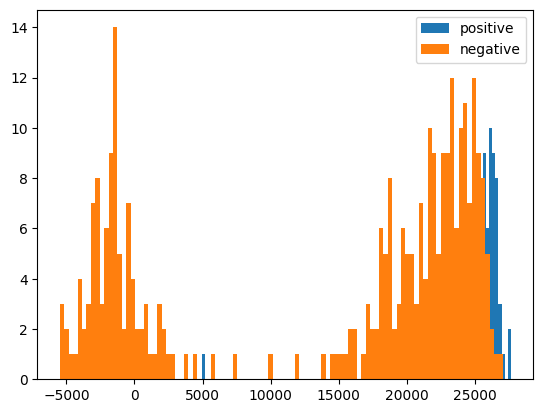

ROC AUC: 0.89
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

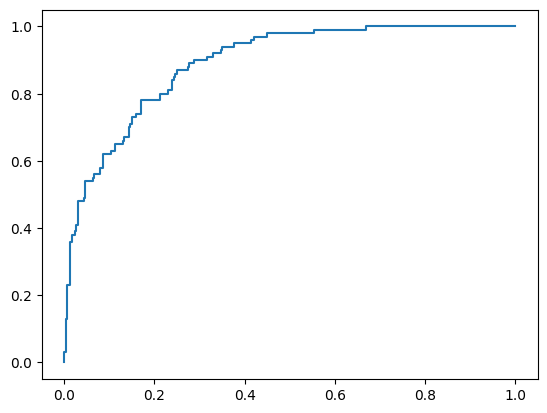

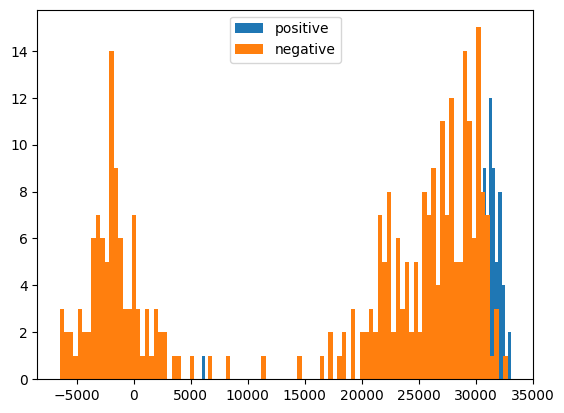

ROC AUC: 0.88
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

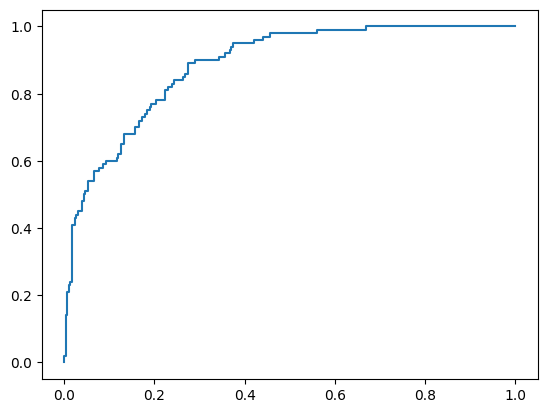

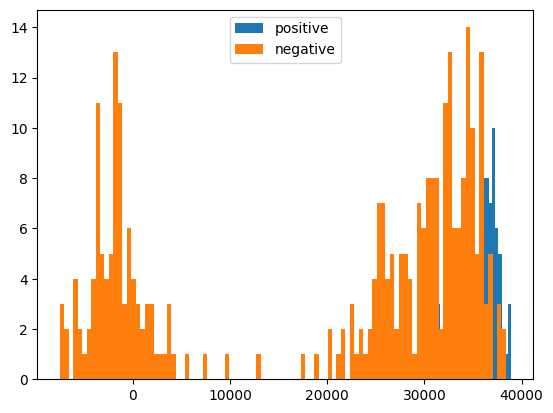

ROC AUC: 0.88
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

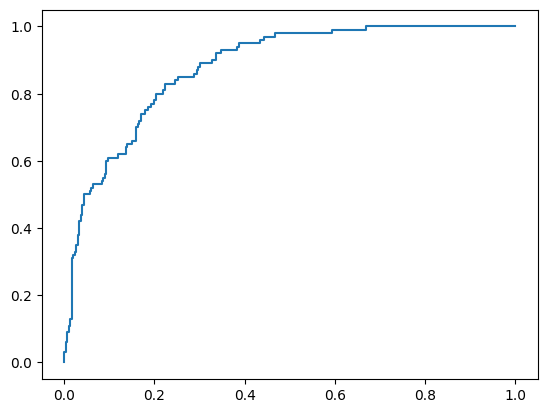

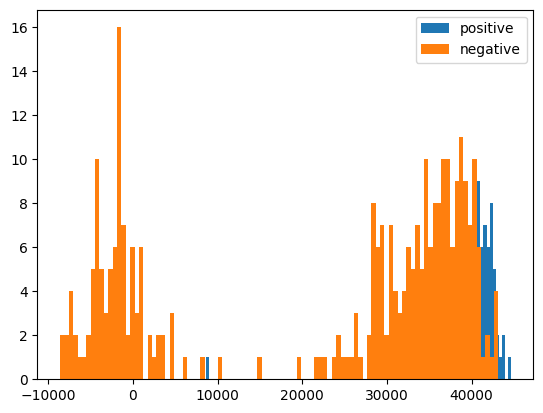

ROC AUC: 0.88
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

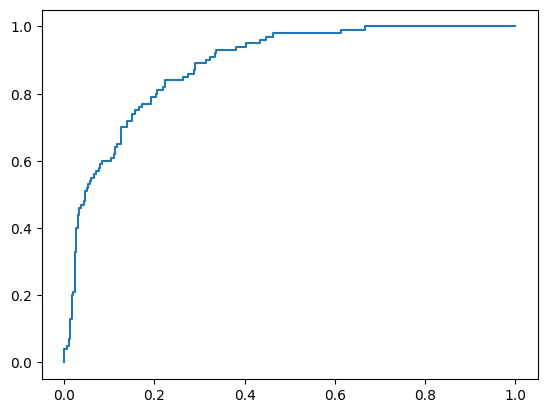

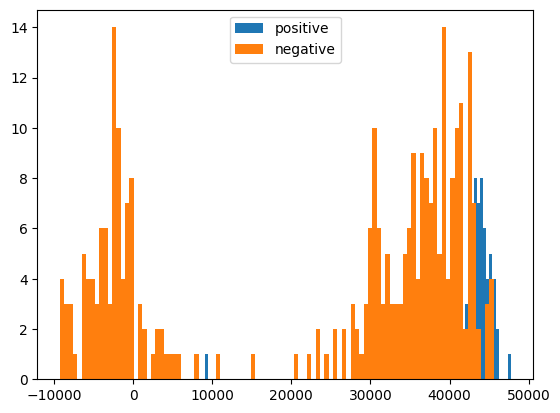

ROC AUC: 0.88
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

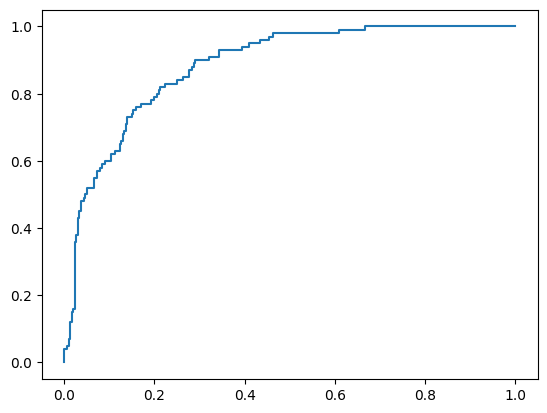

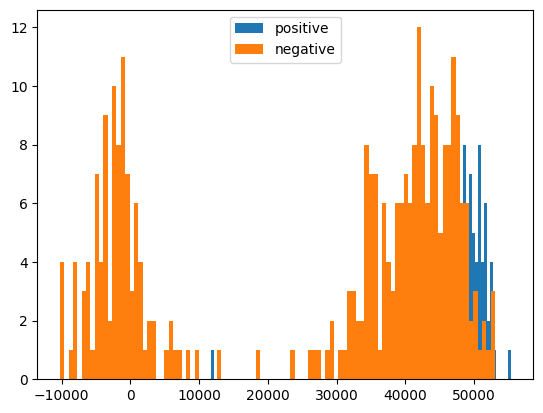

ROC AUC: 0.88
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

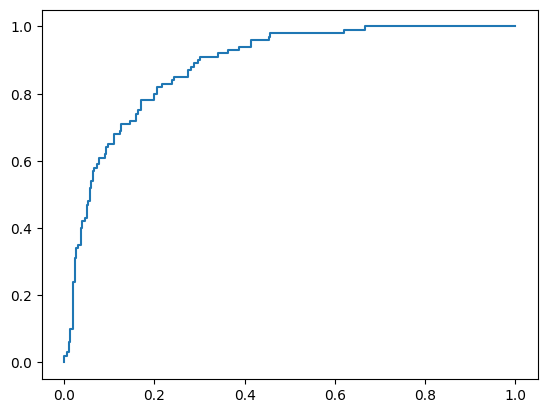

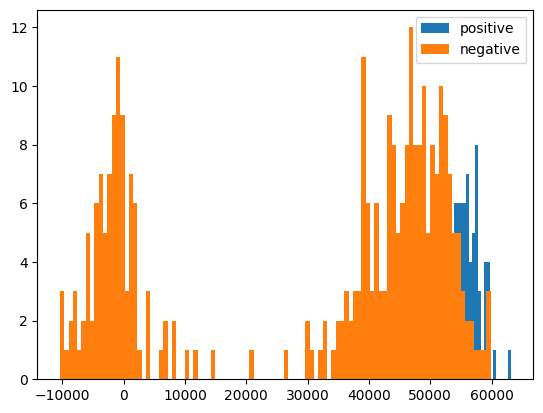

ROC AUC: 0.89
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

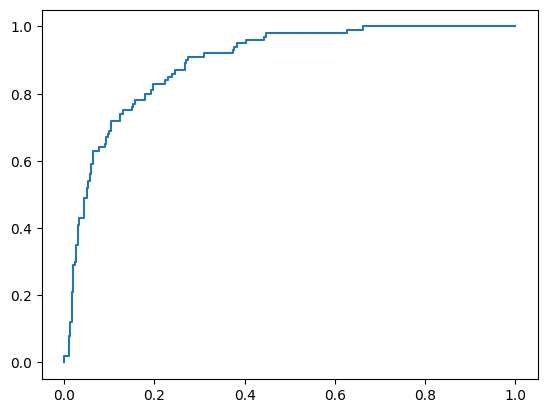

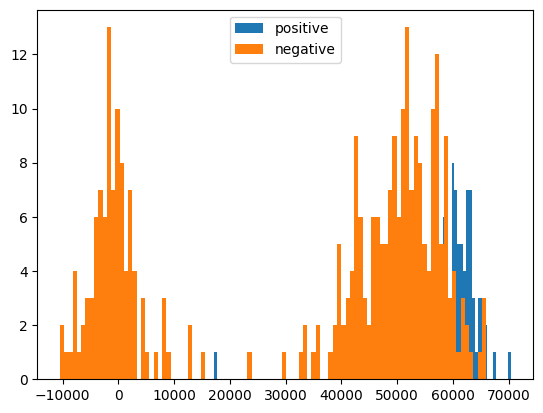

ROC AUC: 0.90
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

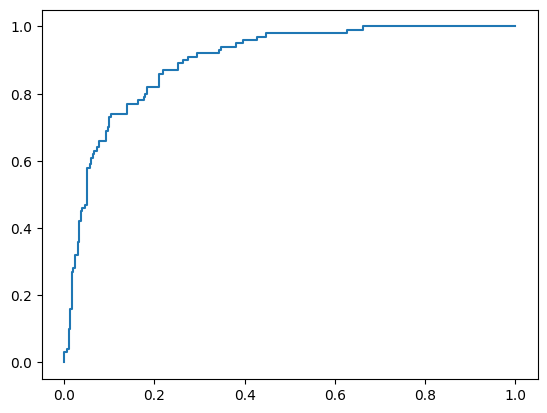

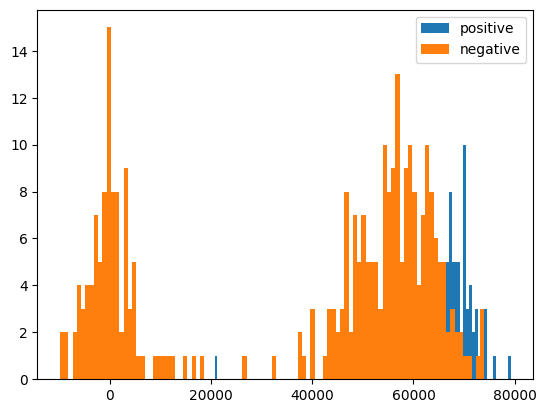

ROC AUC: 0.90
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

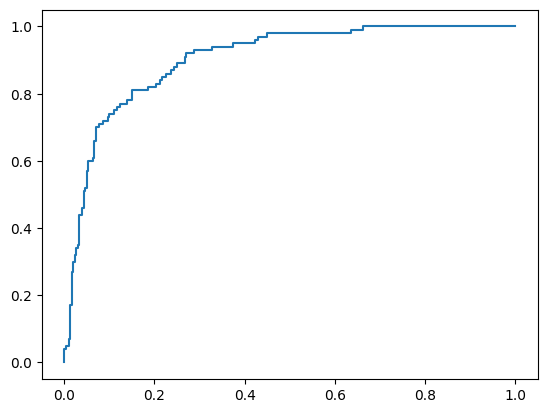

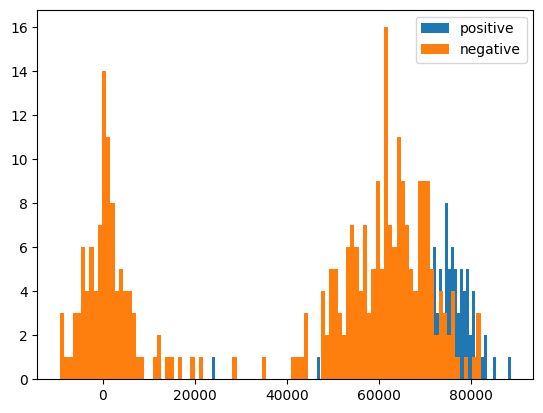

ROC AUC: 0.91
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

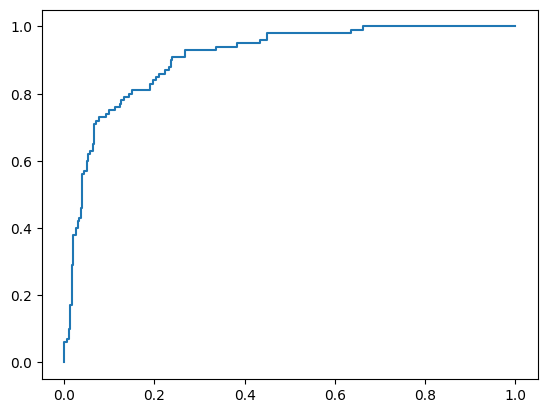

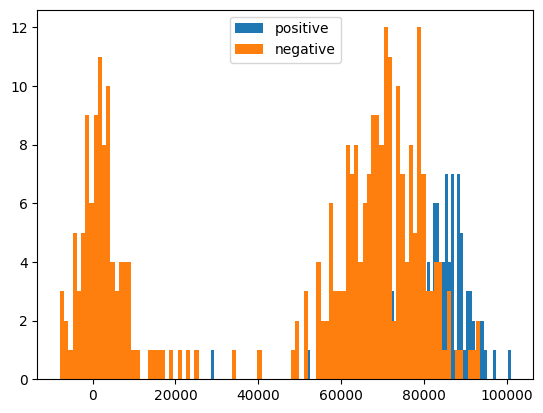

ROC AUC: 0.91
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

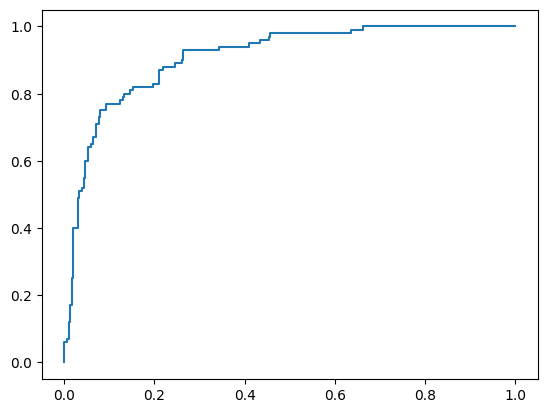

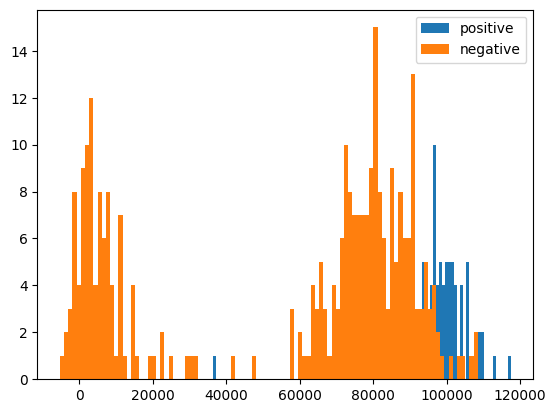

ROC AUC: 0.91
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

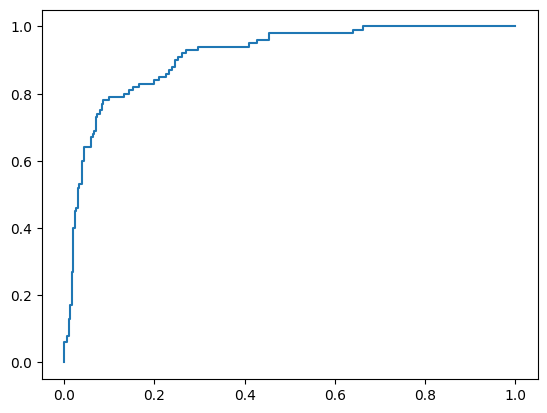

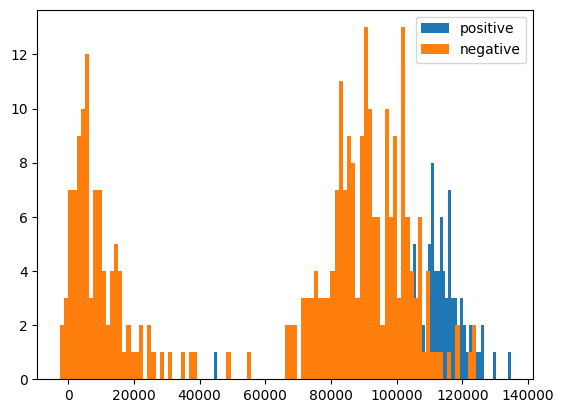

ROC AUC: 0.92
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

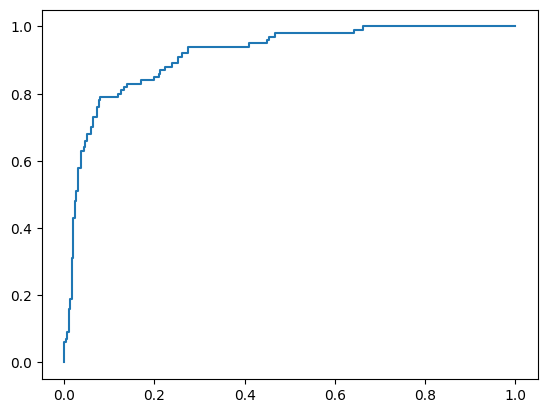

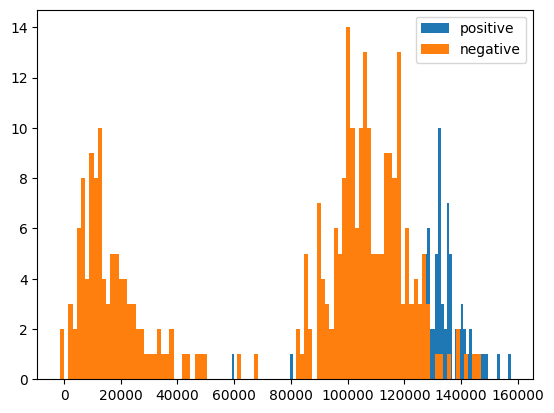

ROC AUC: 0.91
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

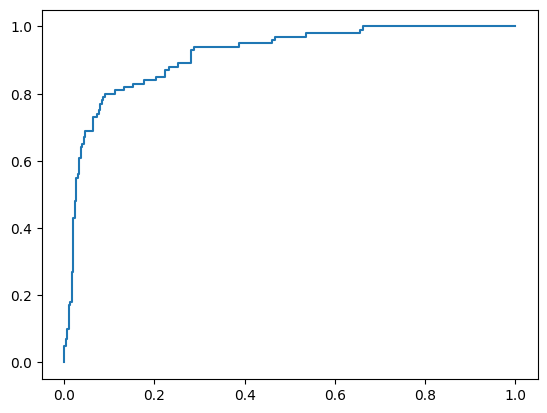

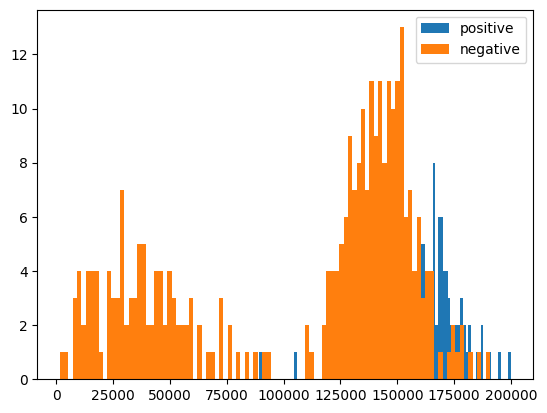

ROC AUC: 0.89
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

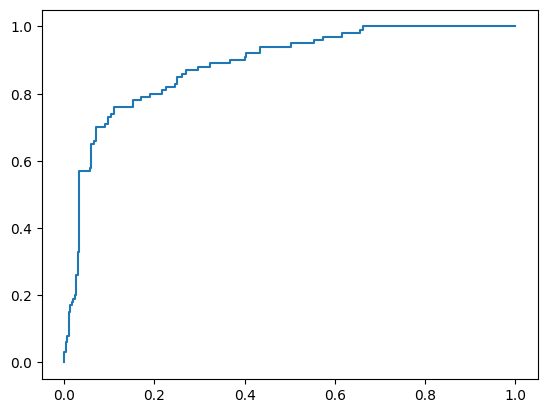

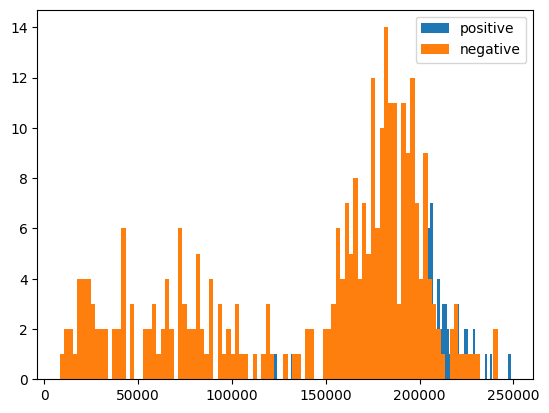

ROC AUC: 0.84


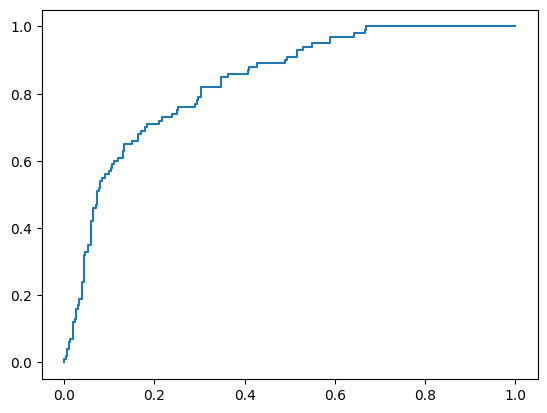

<Figure size 640x480 with 0 Axes>

In [41]:
big_resid_pre_aucs = auc_all_layers_single_plot(
    gpt2_xl,
    48,
    "blocks.{}.hook_resid_pre",
    feature_dataset,
    baseline_dataset2,
    False,
    evaluation_dataset_big2,
    "dot",
)

batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_id

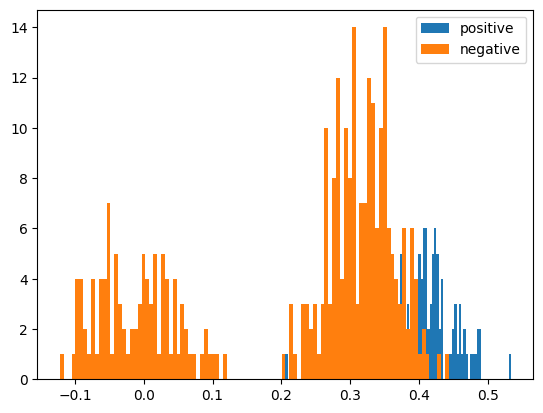

ROC AUC: 0.97
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

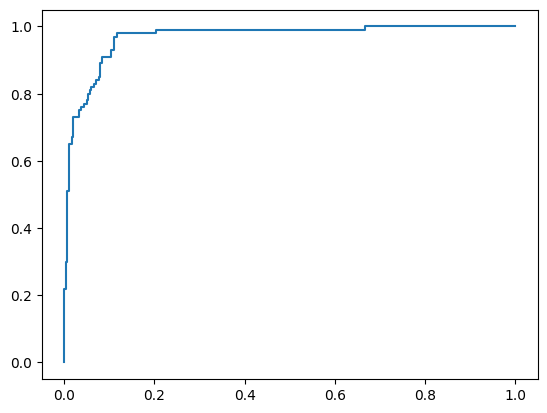

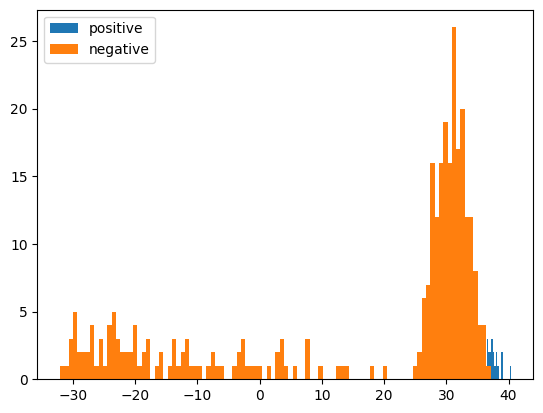

ROC AUC: 0.95
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

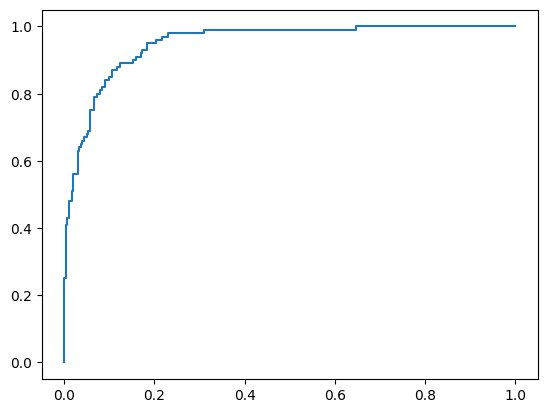

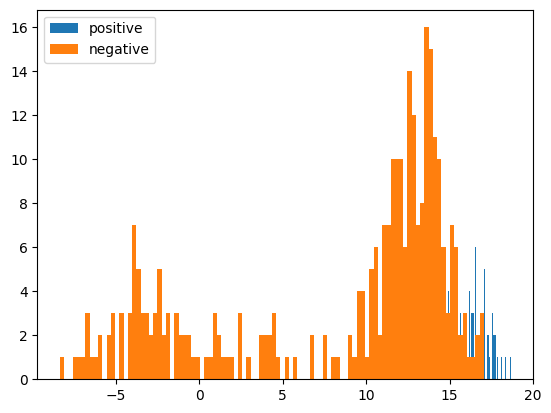

ROC AUC: 0.94
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

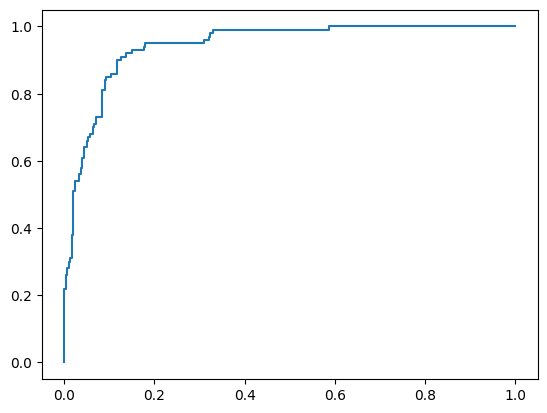

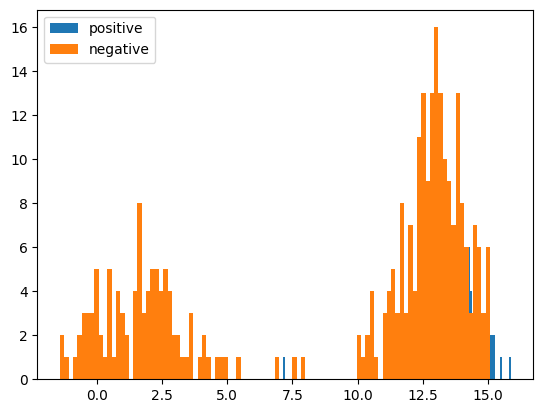

ROC AUC: 0.84
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

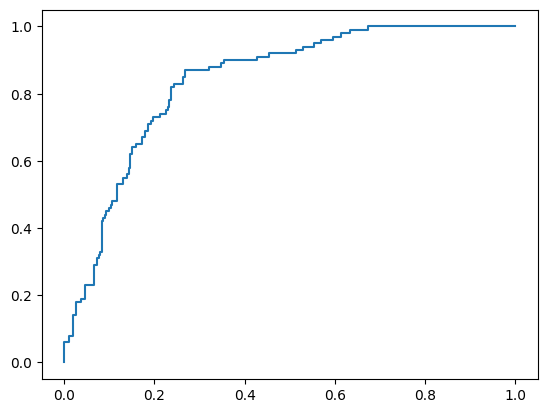

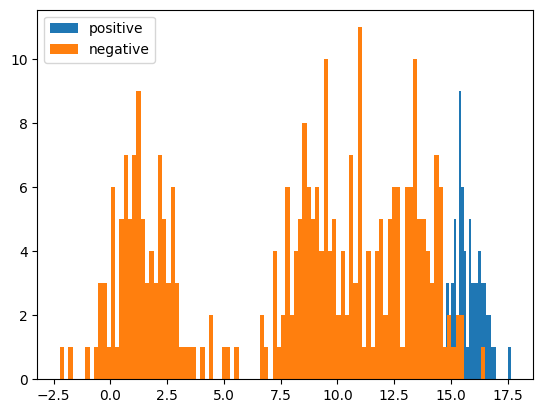

ROC AUC: 0.95
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

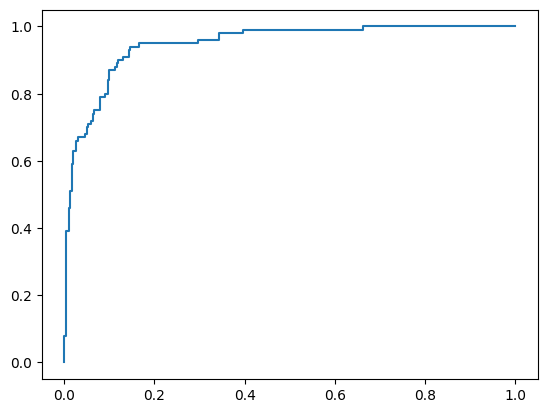

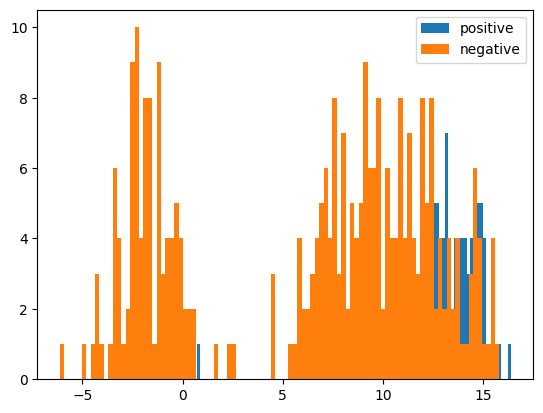

ROC AUC: 0.88
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

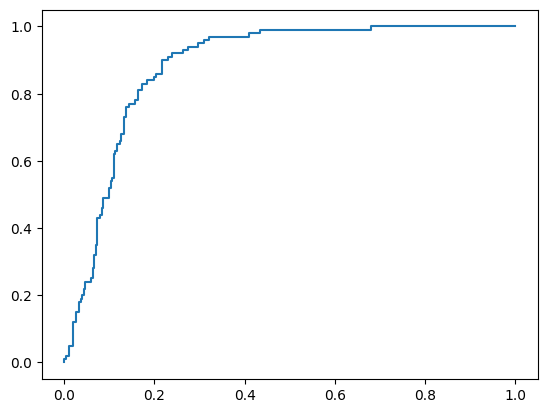

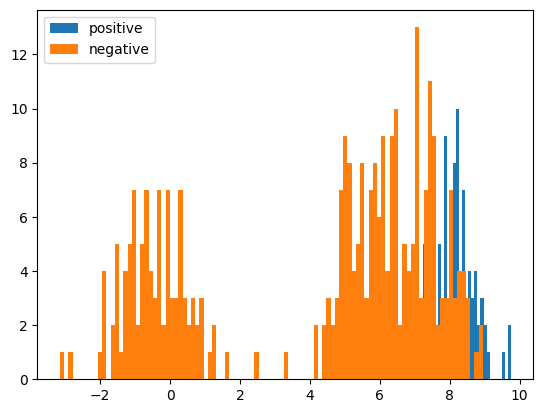

ROC AUC: 0.92
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

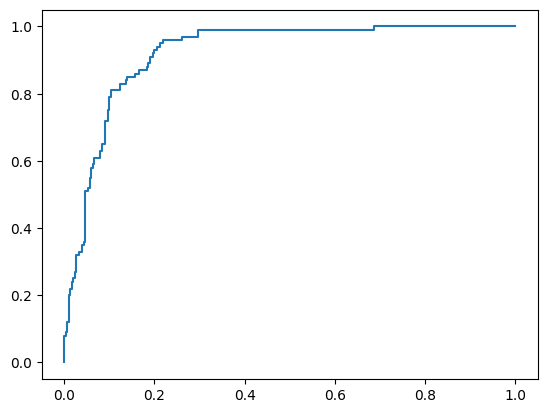

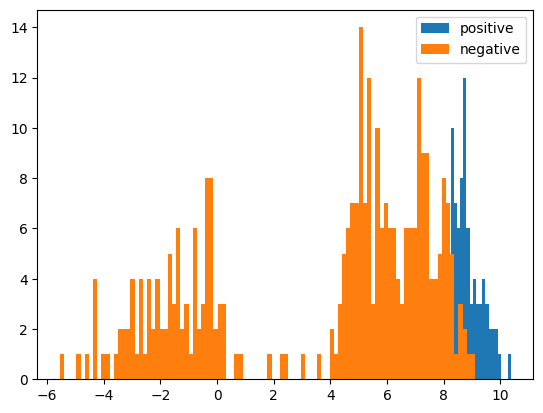

ROC AUC: 0.95
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

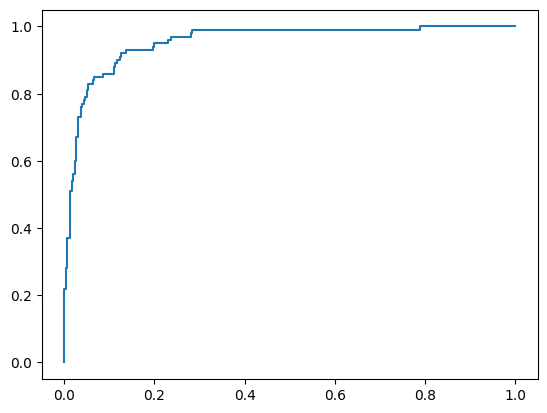

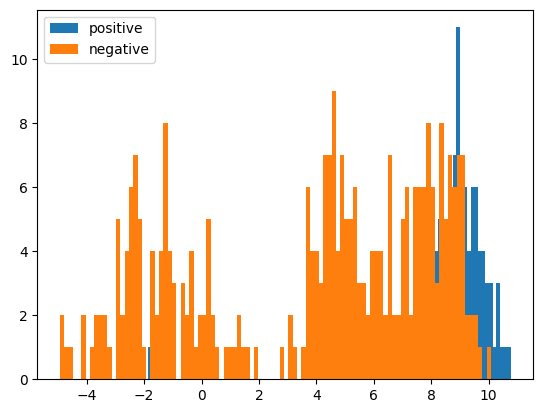

ROC AUC: 0.91
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

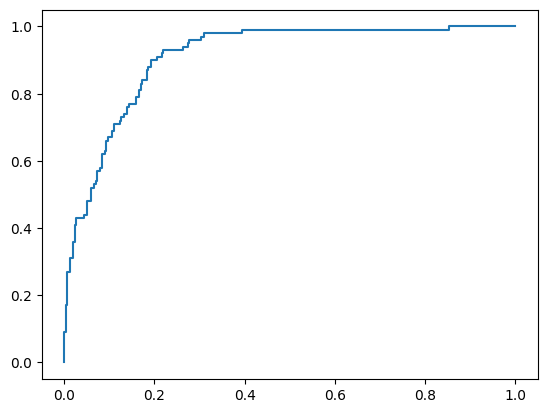

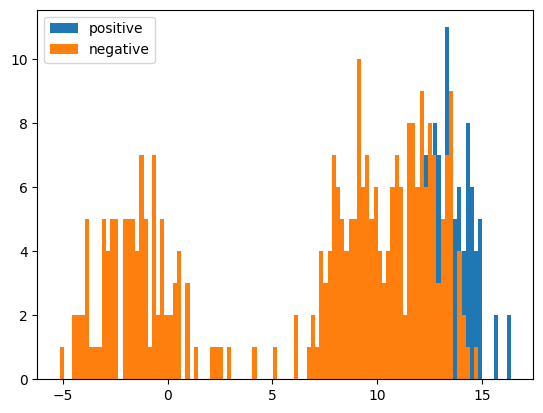

ROC AUC: 0.91
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

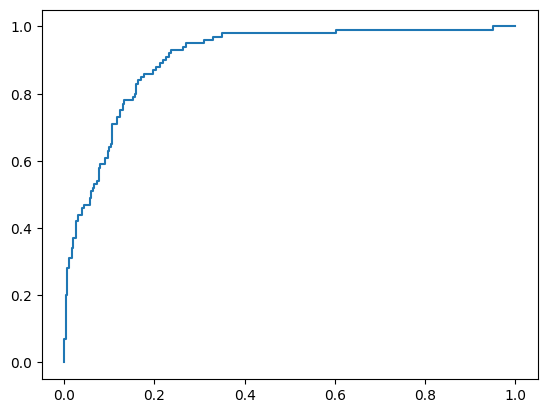

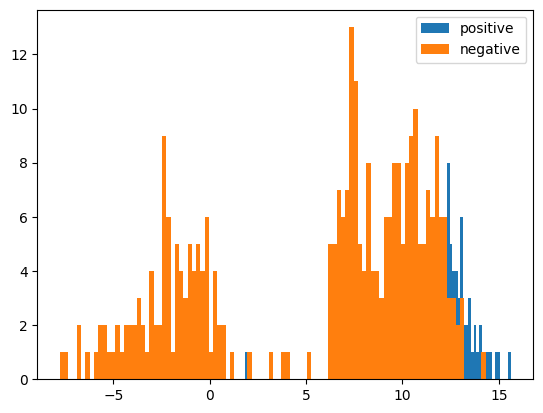

ROC AUC: 0.92
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

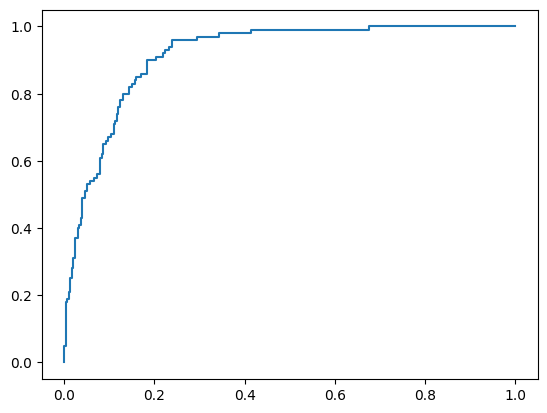

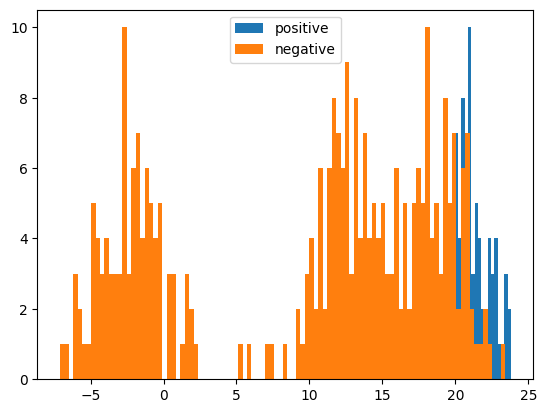

ROC AUC: 0.91
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

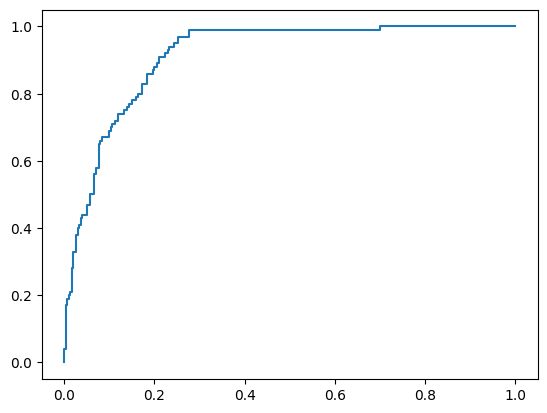

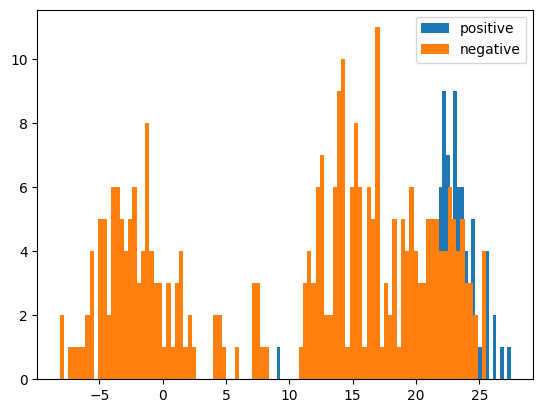

ROC AUC: 0.88
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

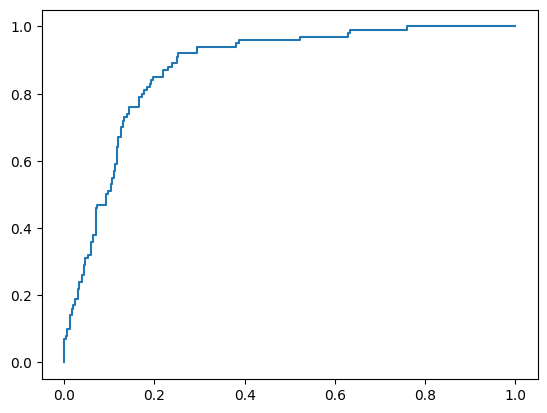

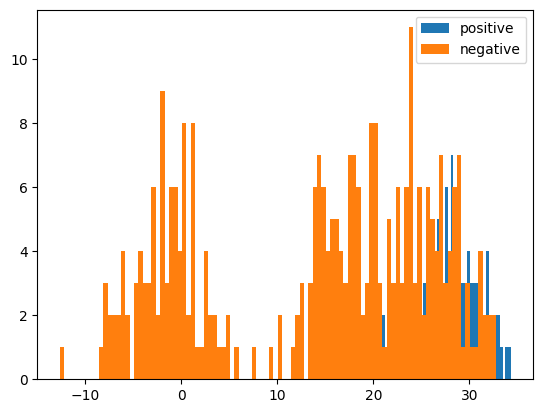

ROC AUC: 0.88
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

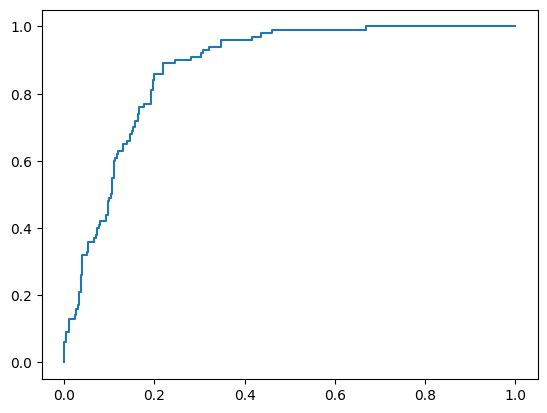

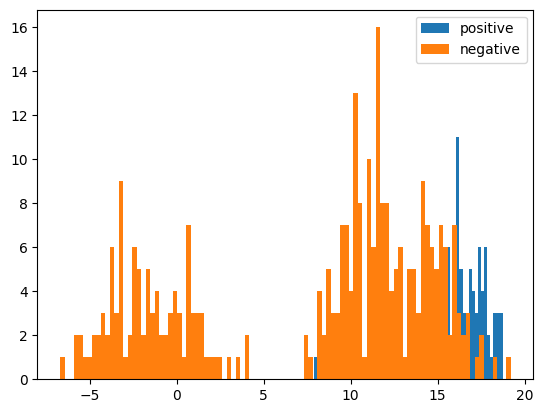

ROC AUC: 0.92
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

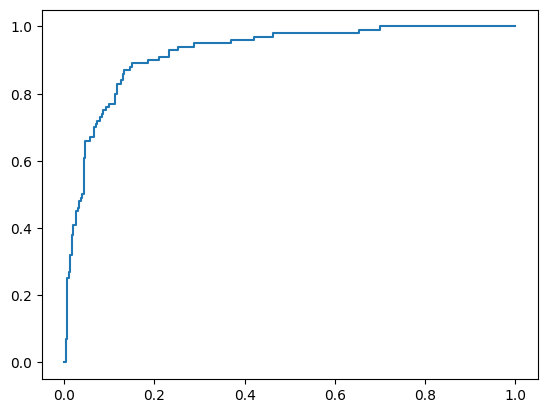

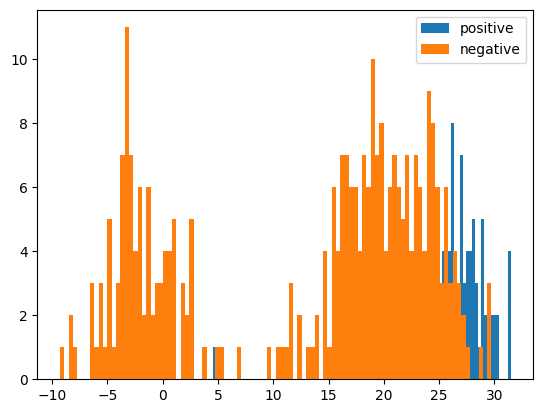

ROC AUC: 0.91
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

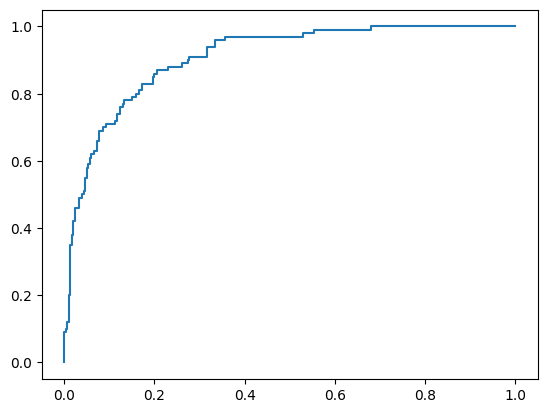

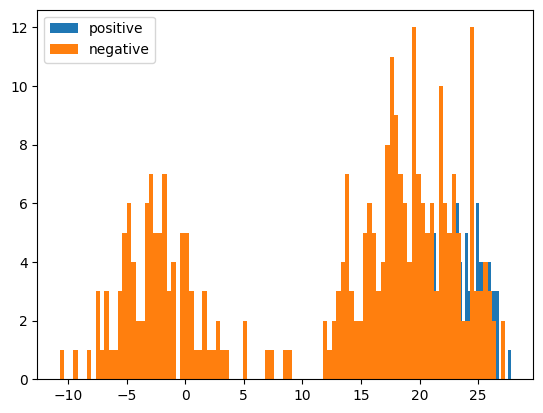

ROC AUC: 0.84
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

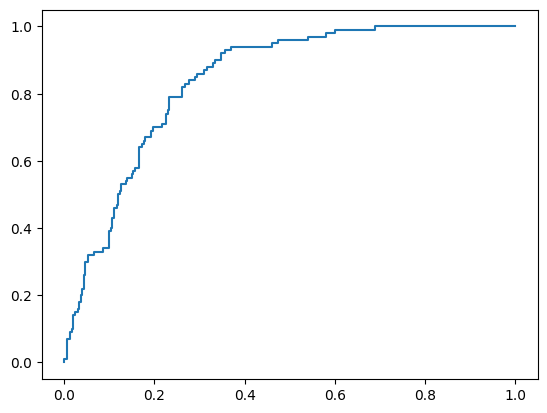

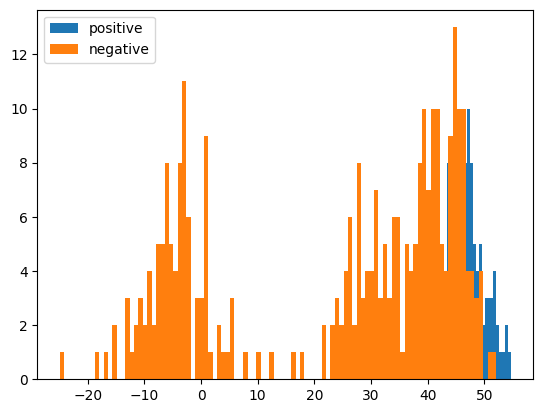

ROC AUC: 0.91
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

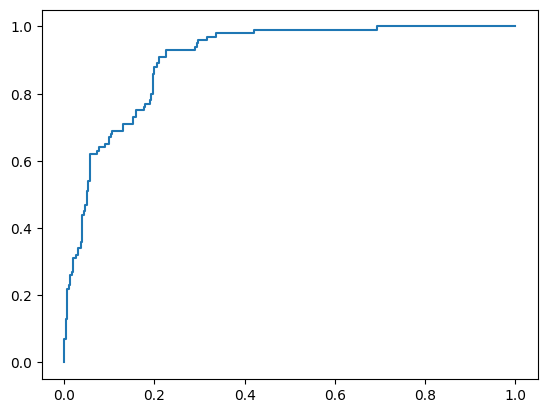

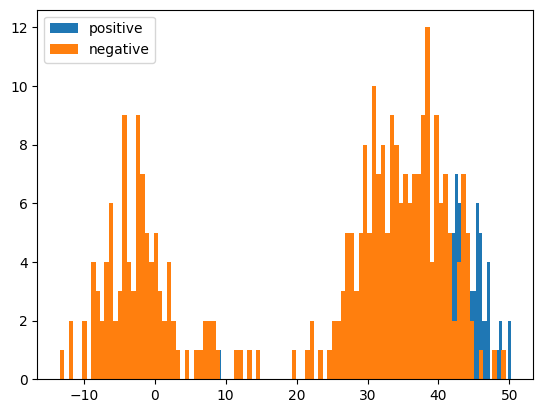

ROC AUC: 0.89
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

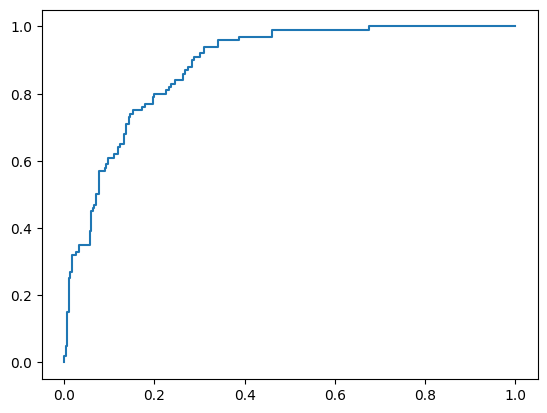

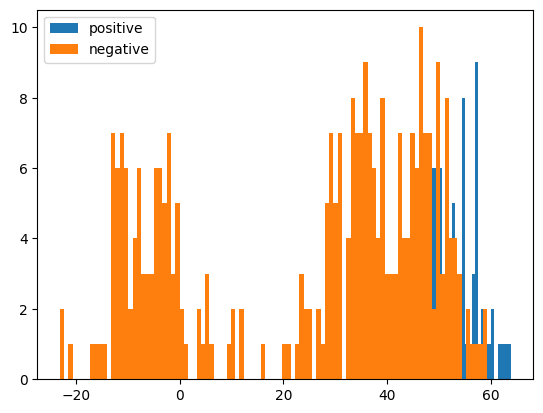

ROC AUC: 0.89
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

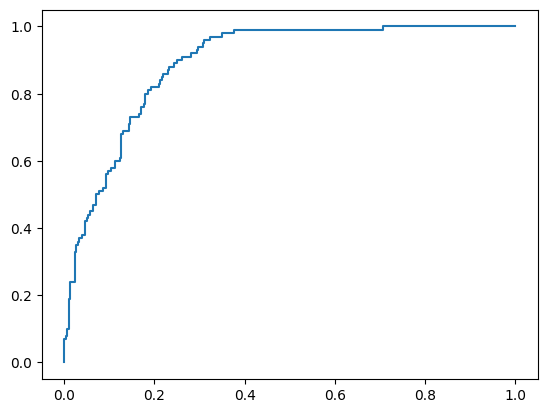

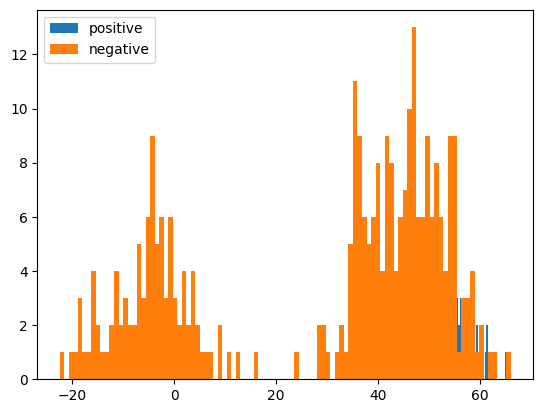

ROC AUC: 0.81
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

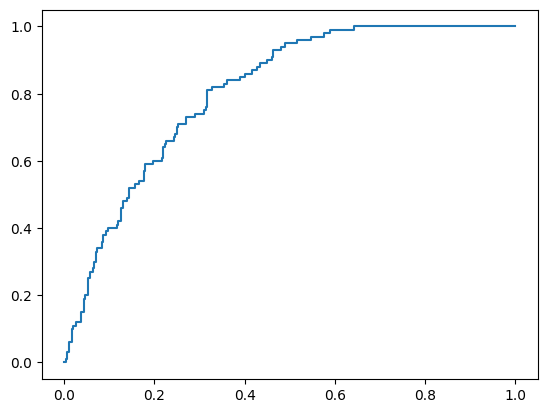

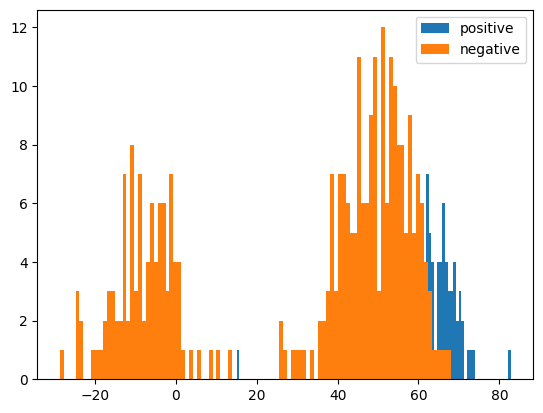

ROC AUC: 0.92
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

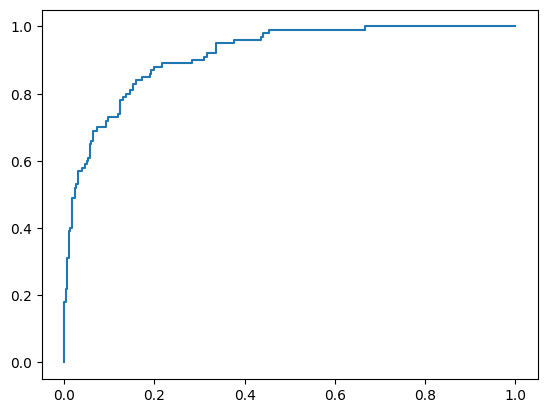

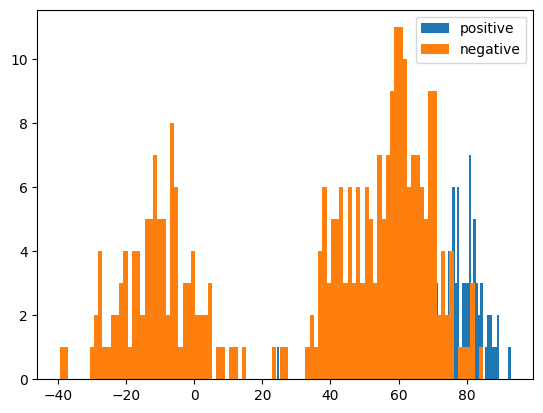

ROC AUC: 0.92
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

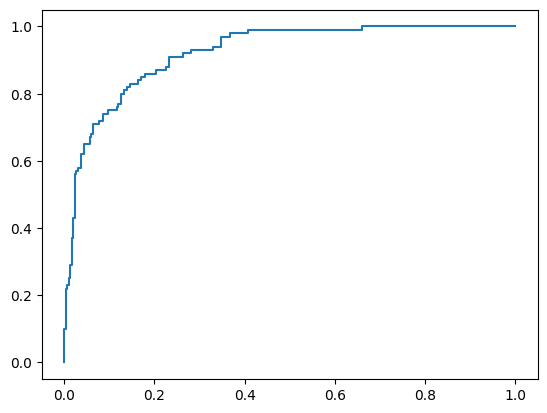

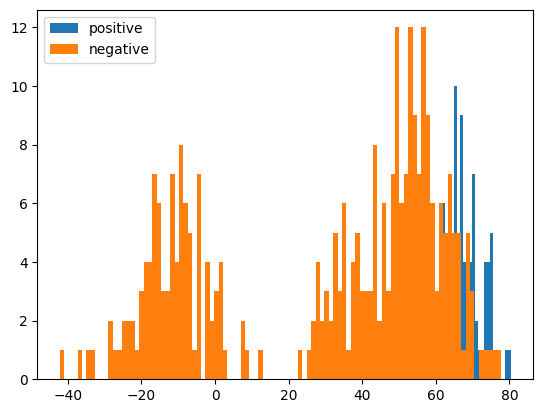

ROC AUC: 0.90
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

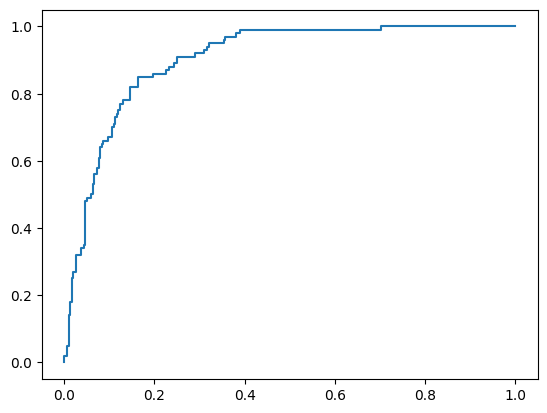

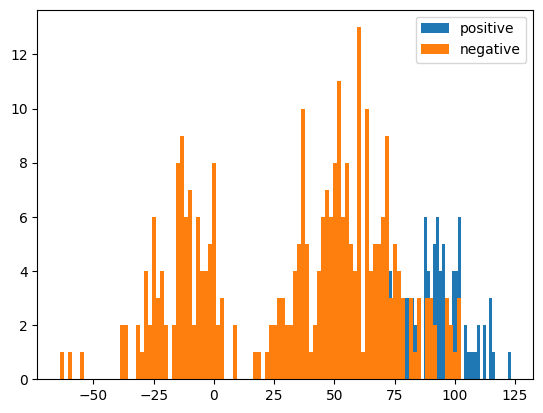

ROC AUC: 0.93
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

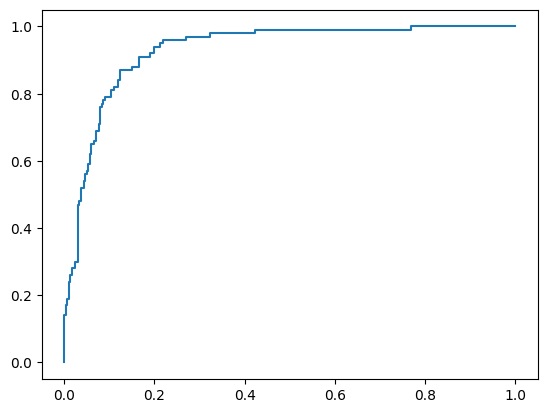

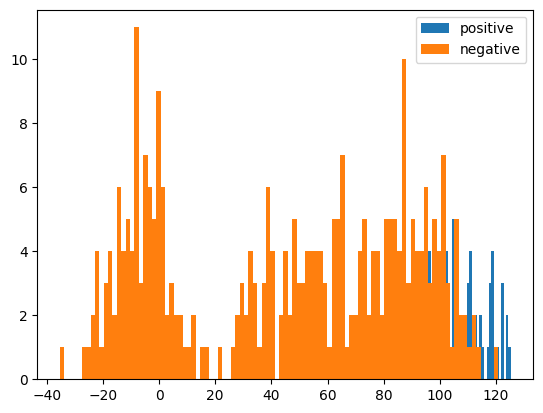

ROC AUC: 0.91
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

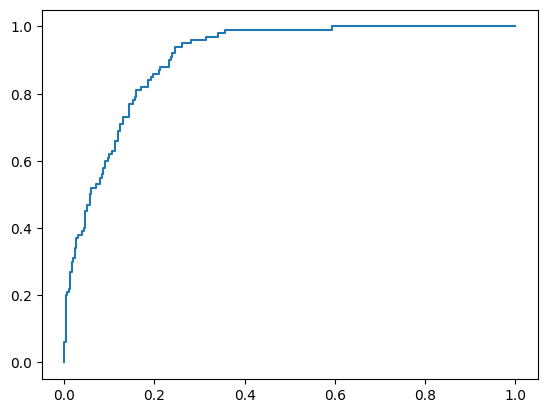

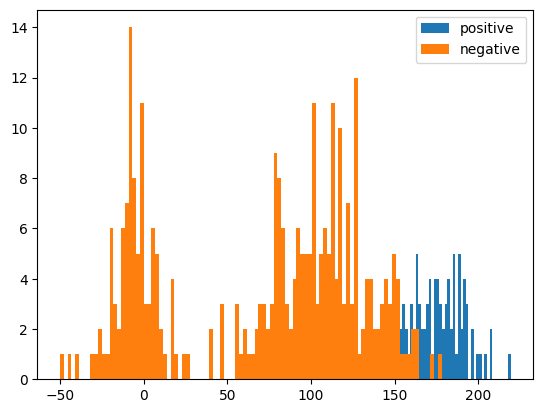

ROC AUC: 0.97
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

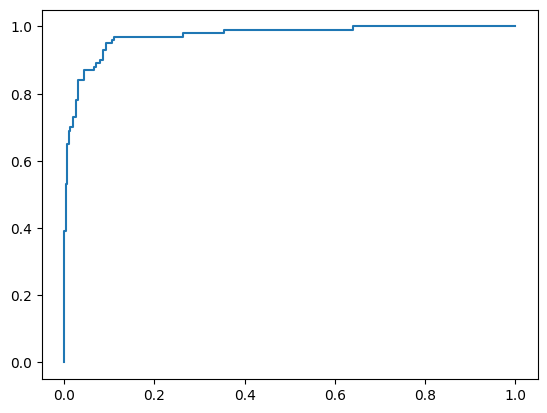

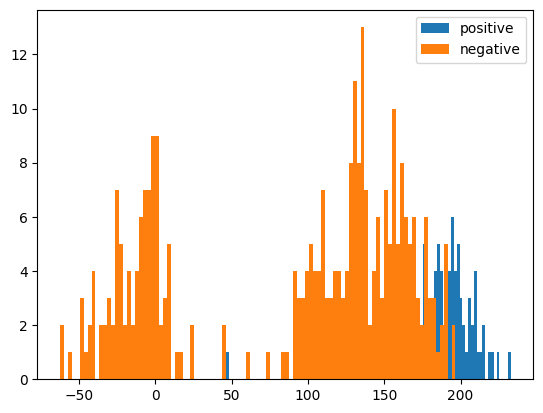

ROC AUC: 0.94
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

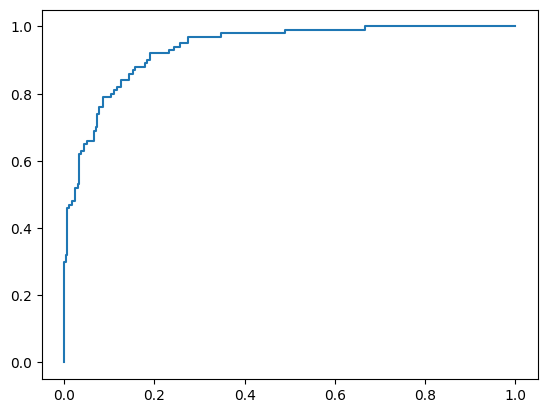

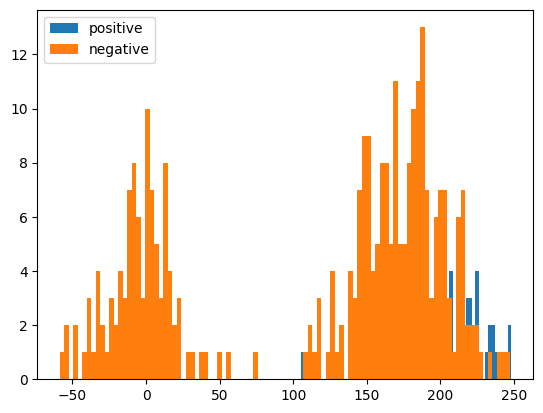

ROC AUC: 0.78
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

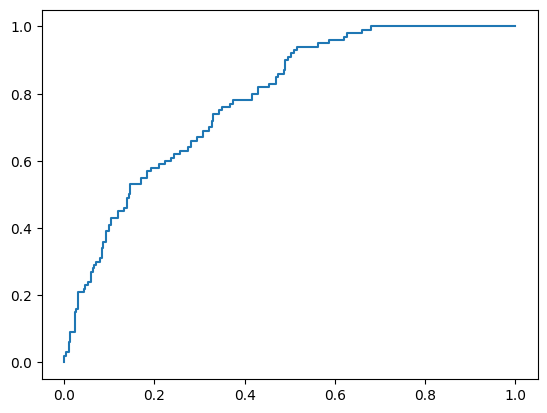

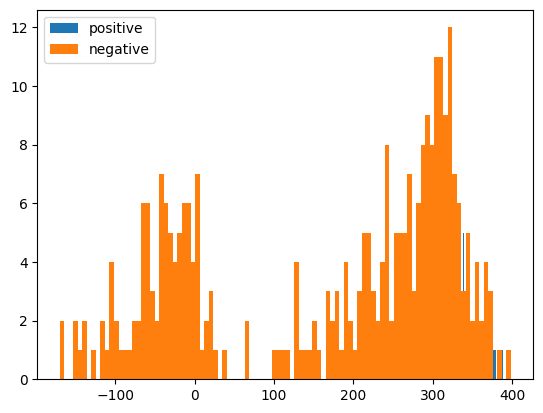

ROC AUC: 0.81
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

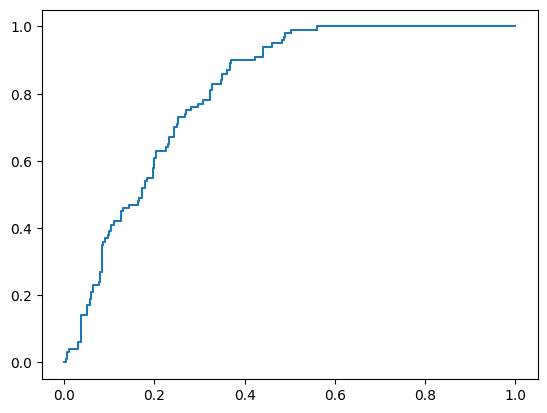

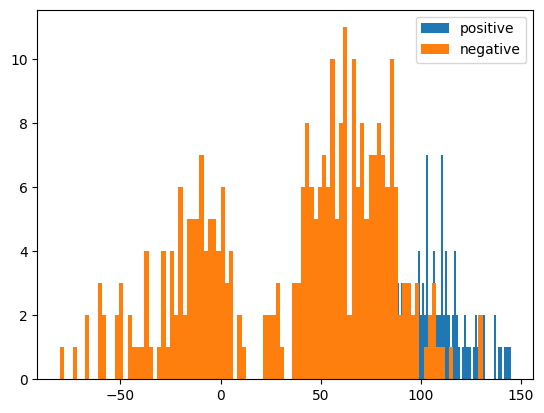

ROC AUC: 0.94
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

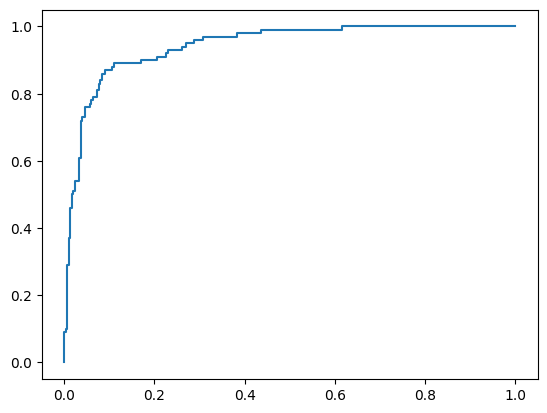

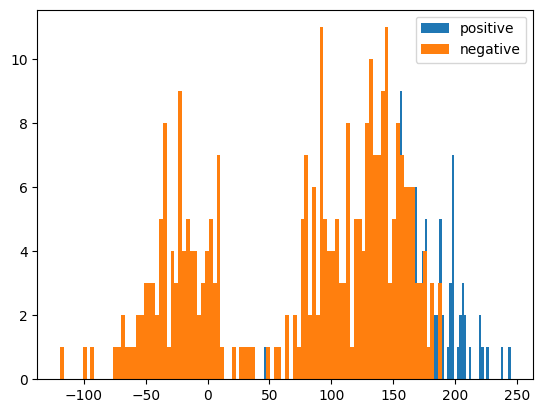

ROC AUC: 0.92
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

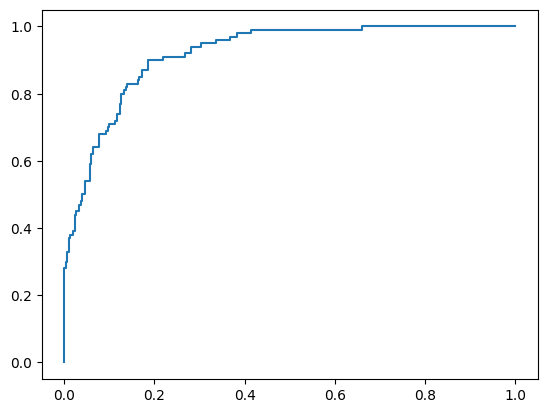

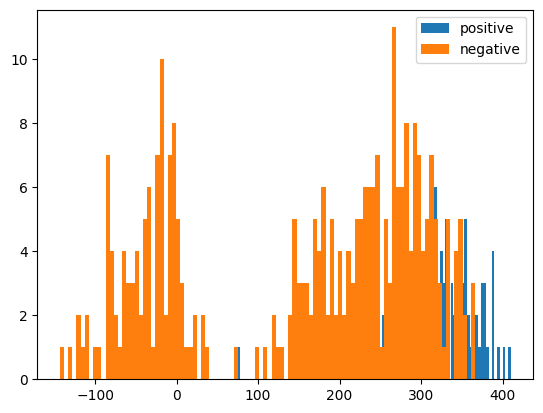

ROC AUC: 0.90
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

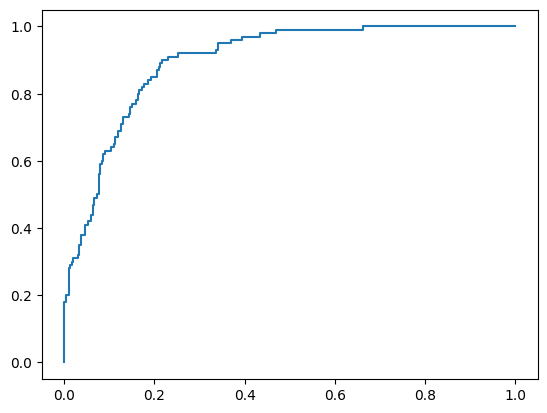

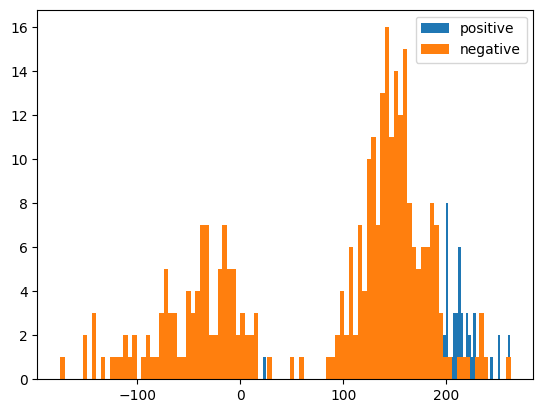

ROC AUC: 0.87
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

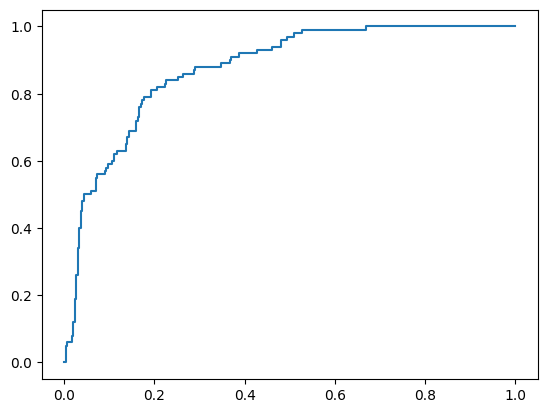

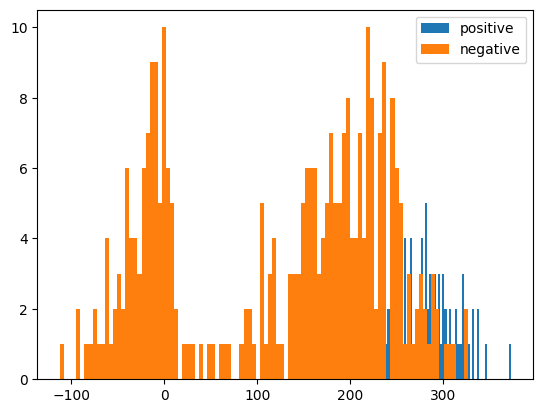

ROC AUC: 0.91
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

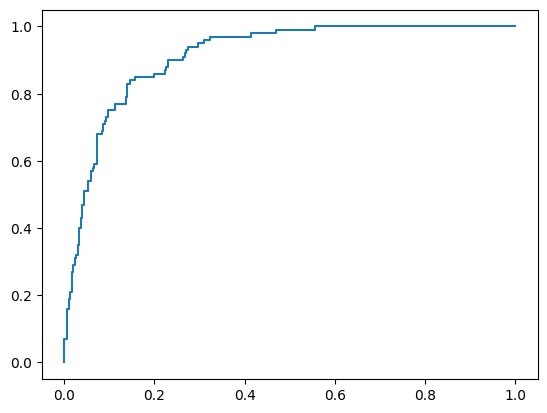

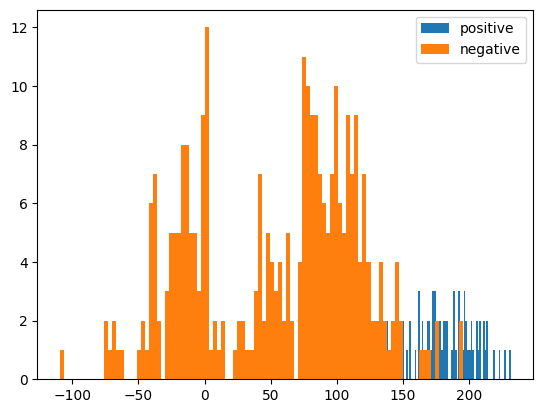

ROC AUC: 0.96
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

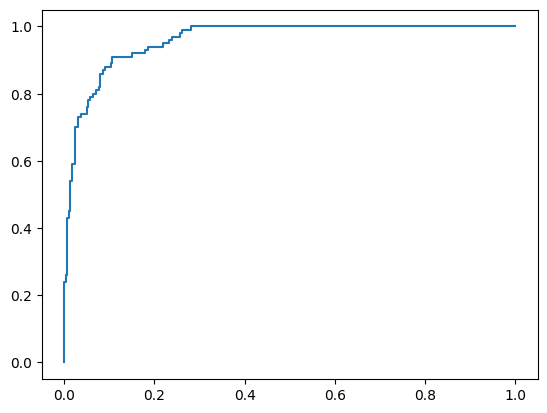

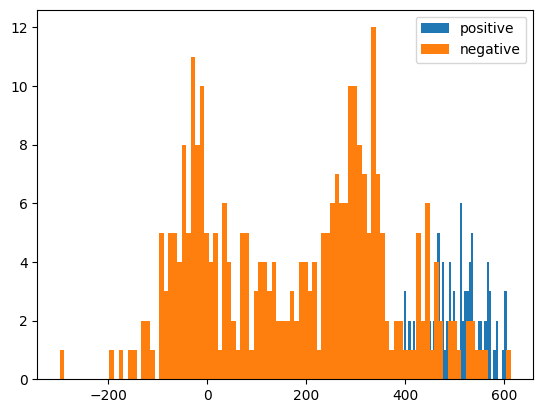

ROC AUC: 0.93
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

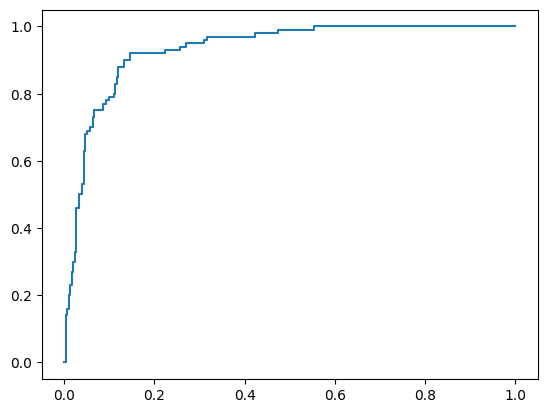

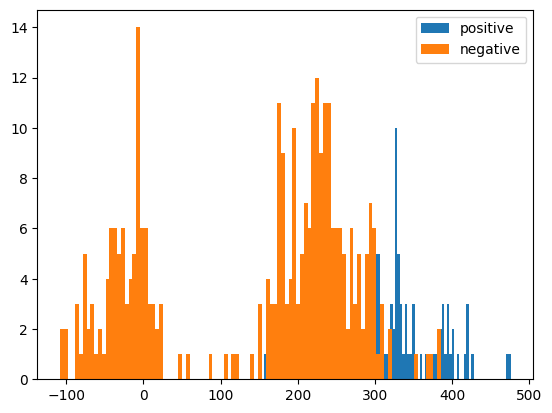

ROC AUC: 0.93
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

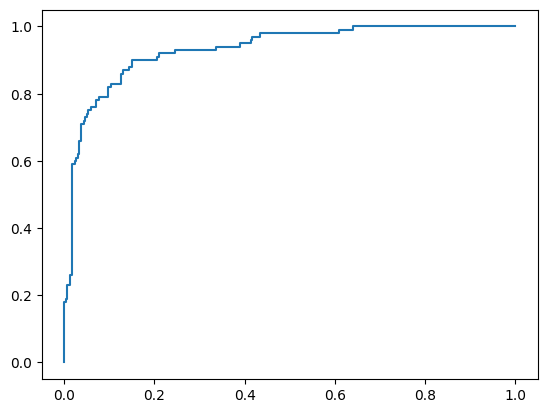

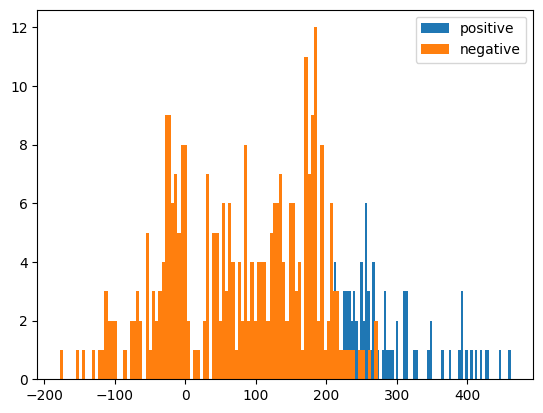

ROC AUC: 0.96
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

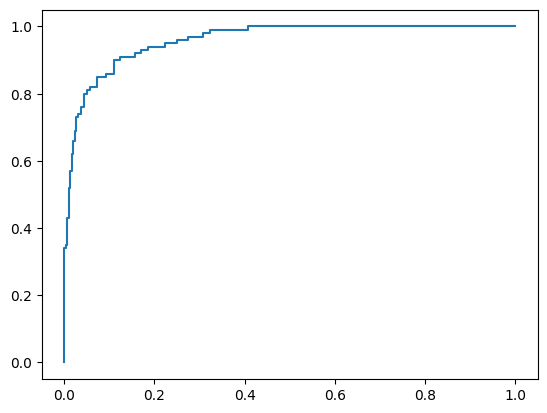

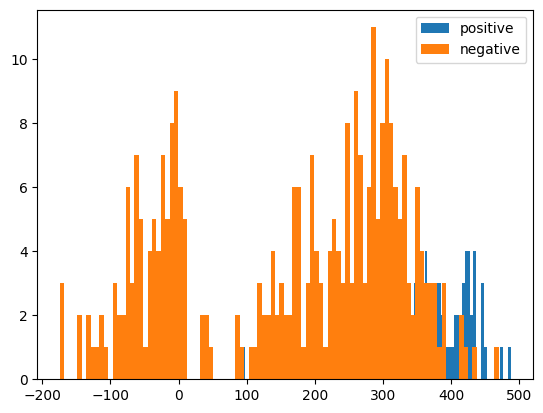

ROC AUC: 0.88
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

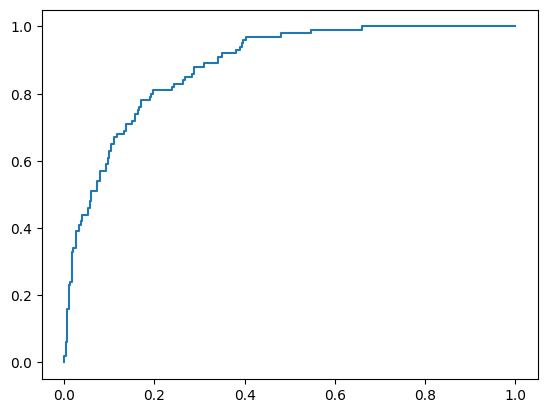

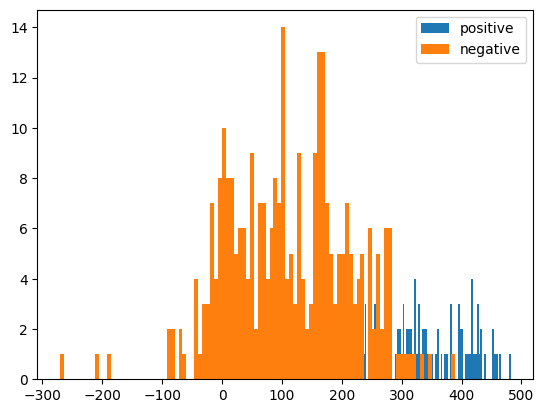

ROC AUC: 0.96
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

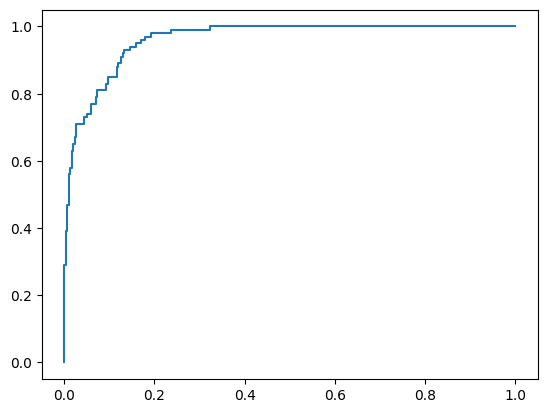

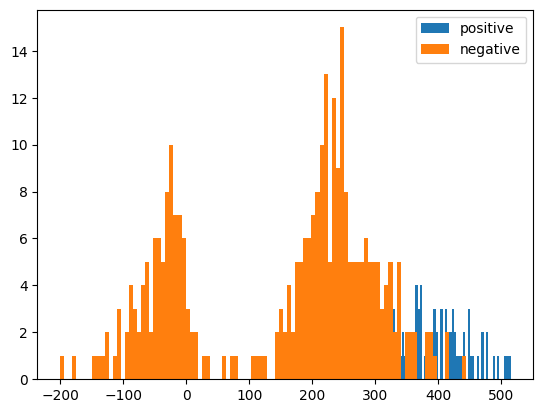

ROC AUC: 0.91
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

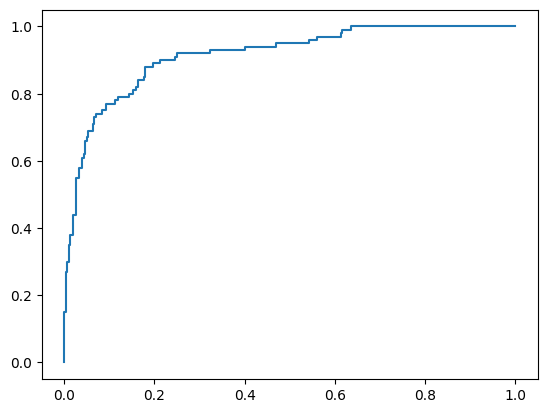

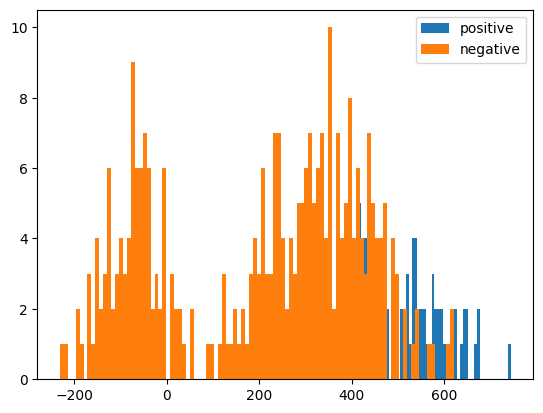

ROC AUC: 0.90
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

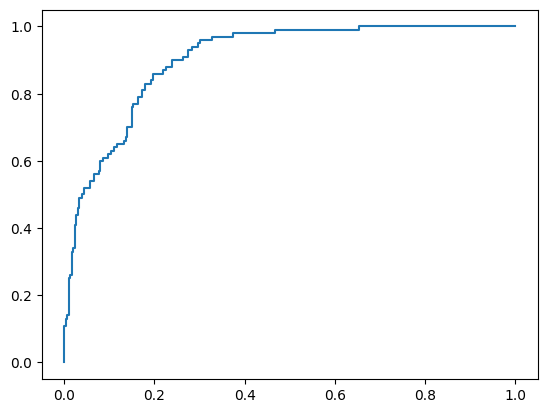

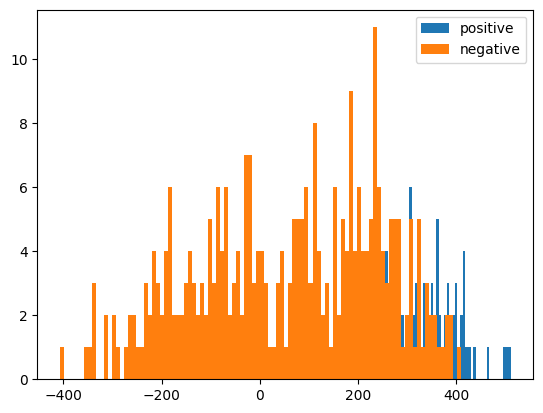

ROC AUC: 0.88
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

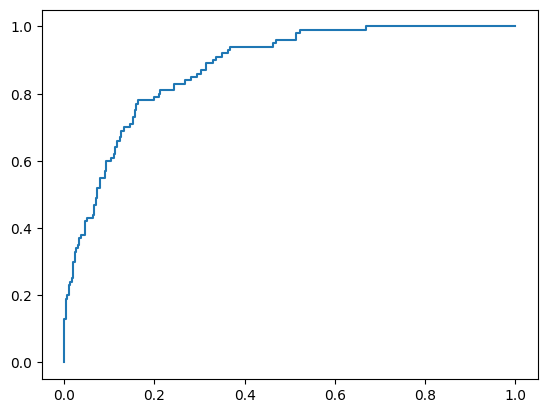

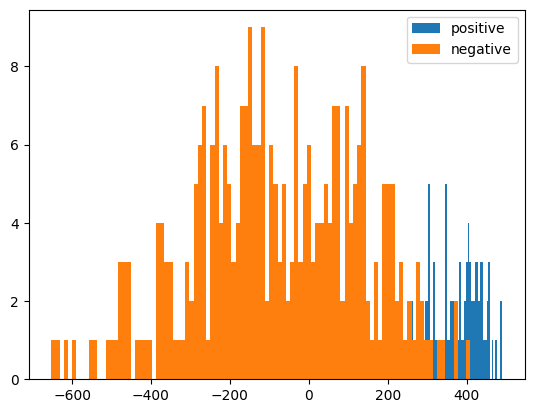

ROC AUC: 0.97
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

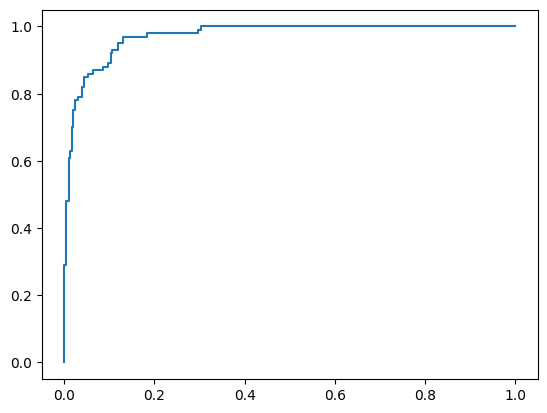

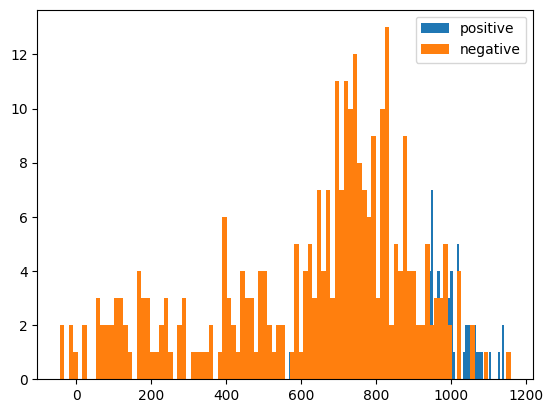

ROC AUC: 0.87
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

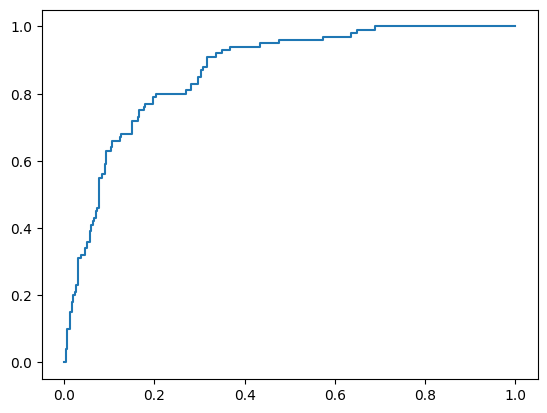

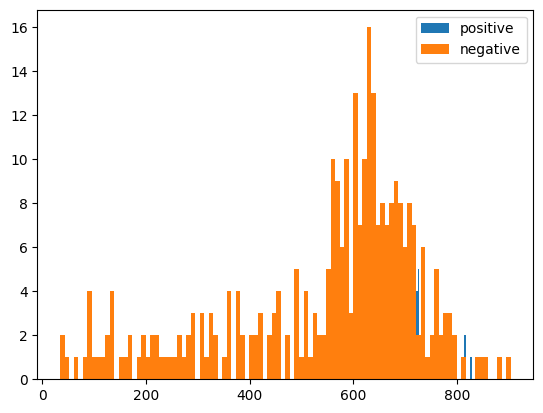

ROC AUC: 0.73
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

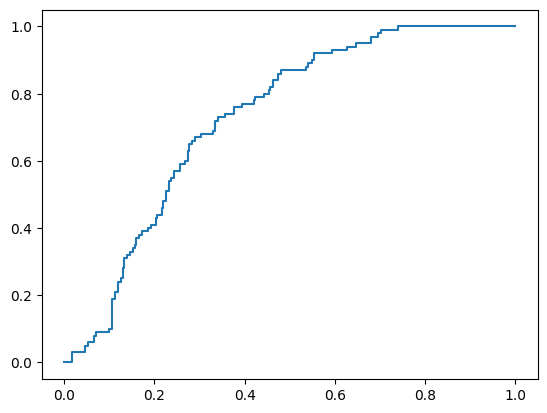

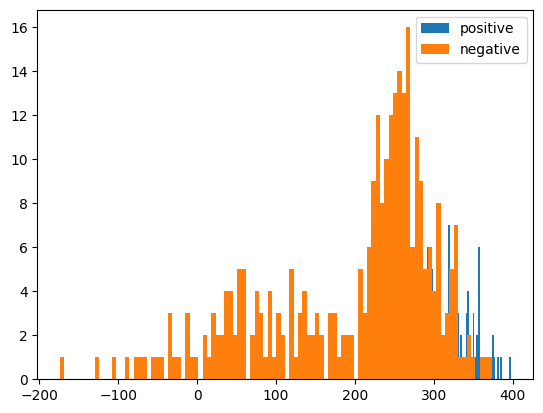

ROC AUC: 0.88


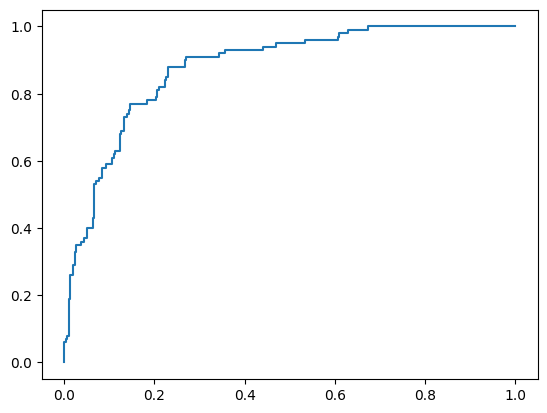

<Figure size 640x480 with 0 Axes>

In [42]:
big_attn_aucs = auc_all_layers_single_plot(
    gpt2_xl,
    48,
    "blocks.{}.hook_attn_out",
    feature_dataset,
    baseline_dataset2,
    False,
    evaluation_dataset_big2,
    "dot",
)

batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_id

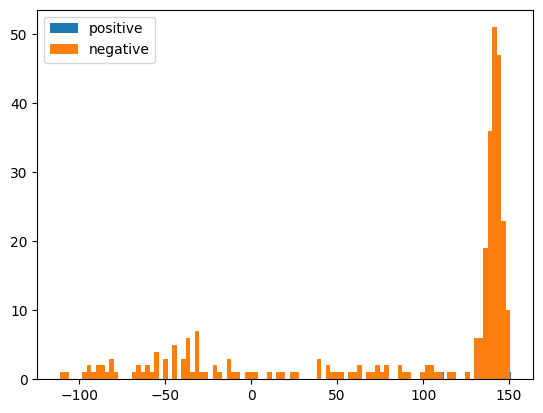

ROC AUC: 0.76
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

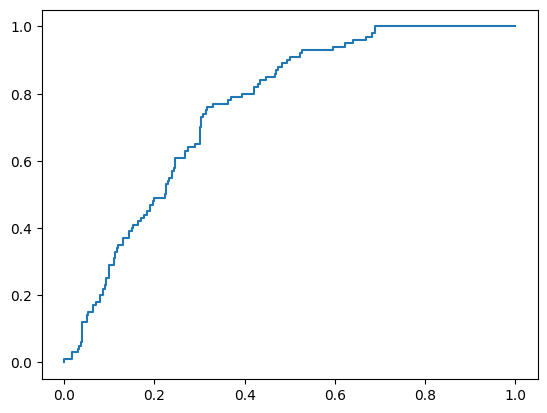

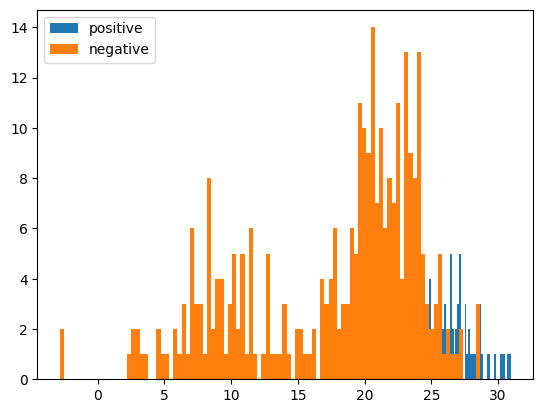

ROC AUC: 0.91
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

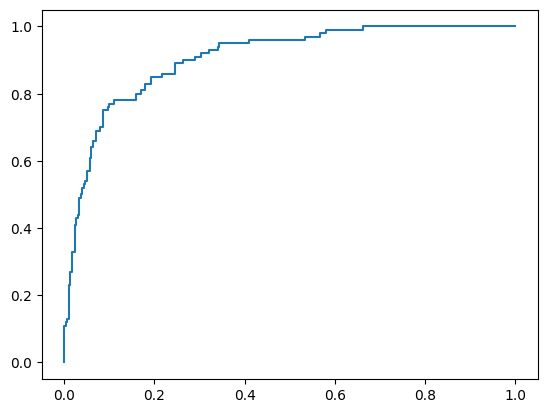

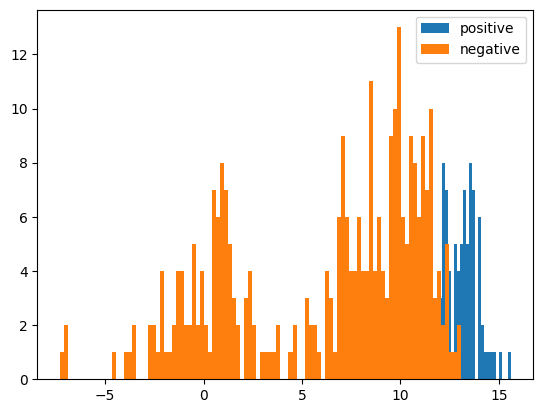

ROC AUC: 0.95
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

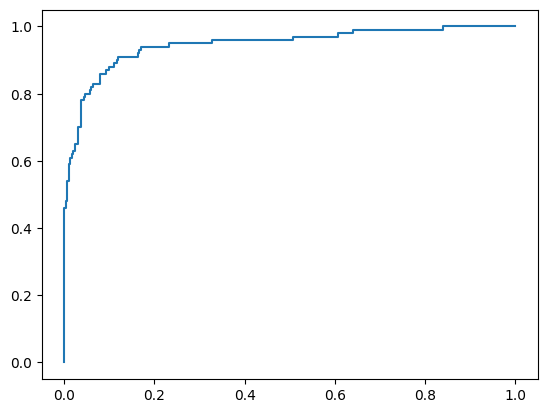

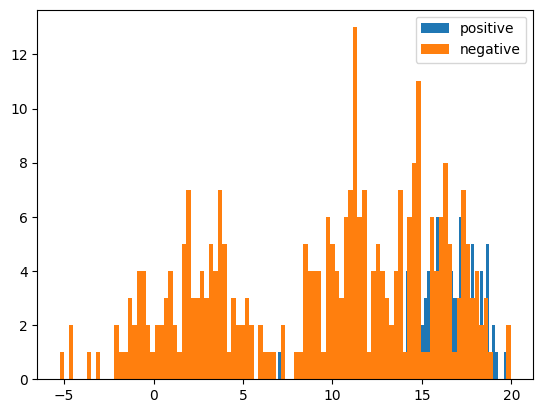

ROC AUC: 0.85
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

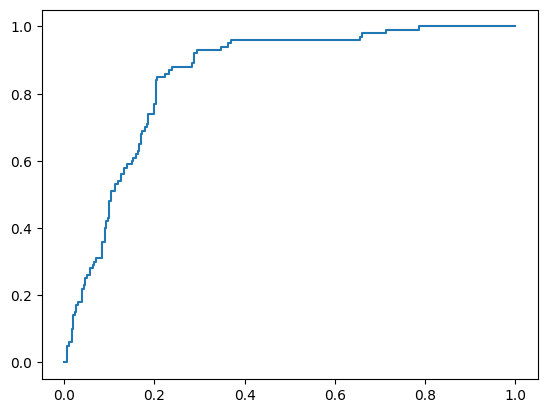

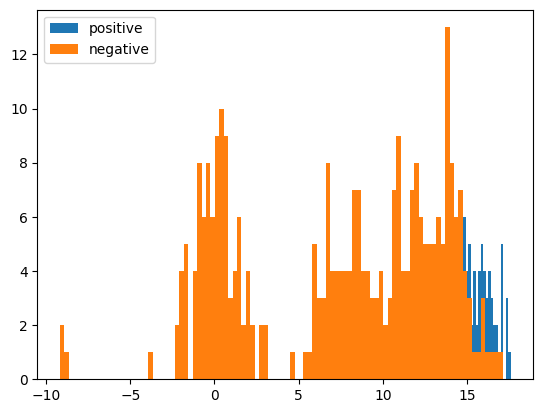

ROC AUC: 0.92
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

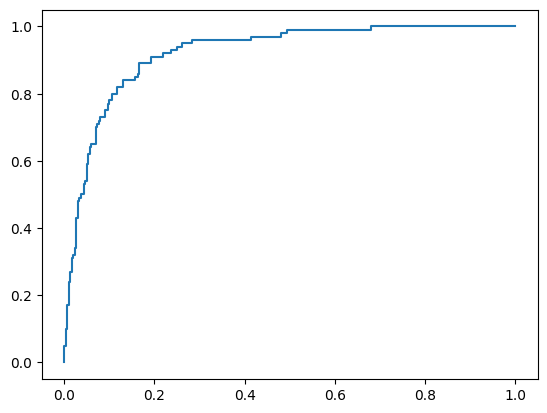

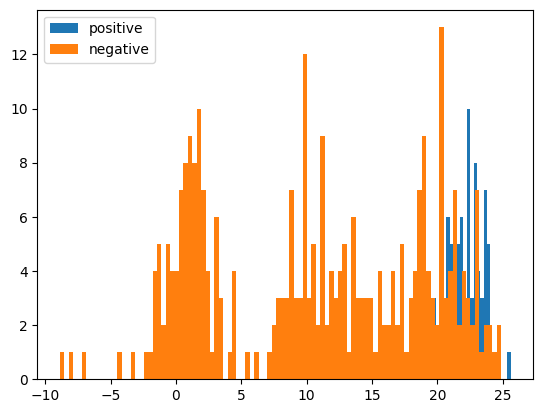

ROC AUC: 0.89
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

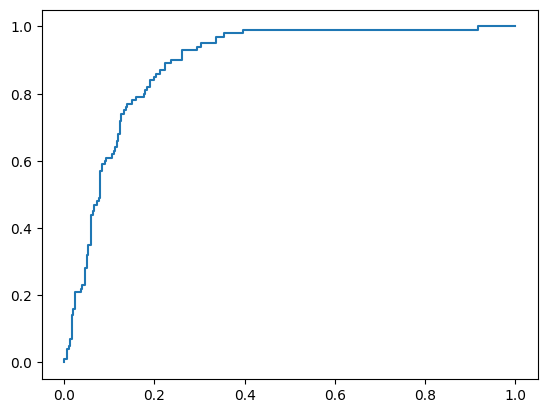

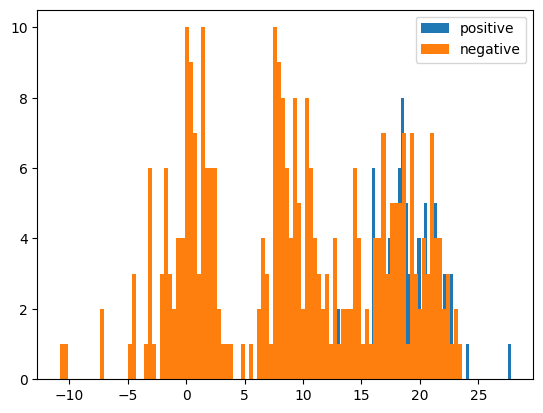

ROC AUC: 0.85
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

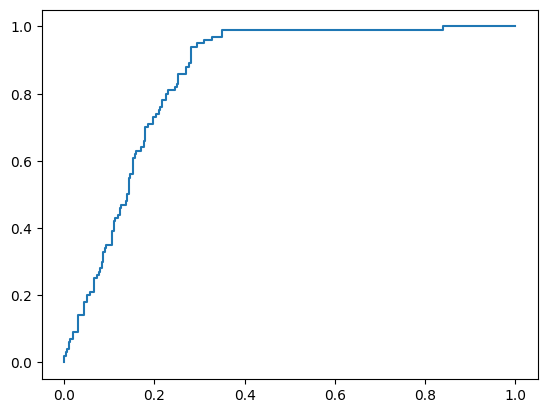

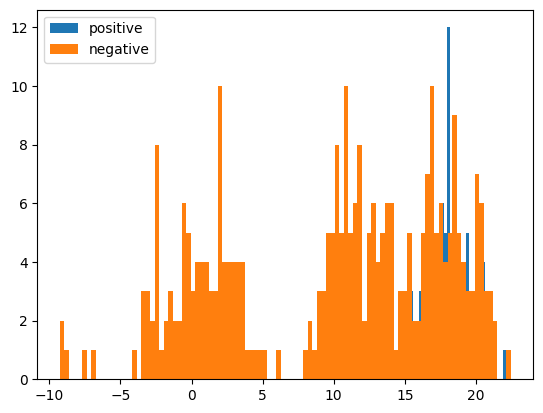

ROC AUC: 0.83
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

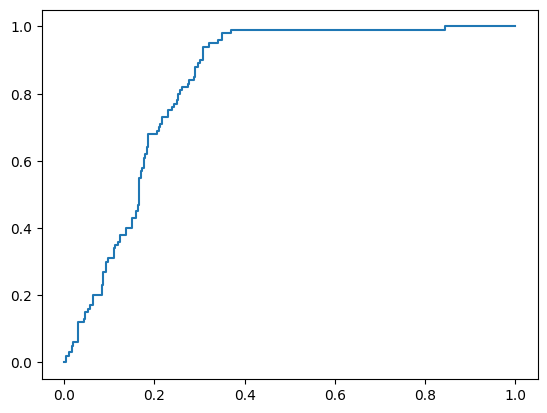

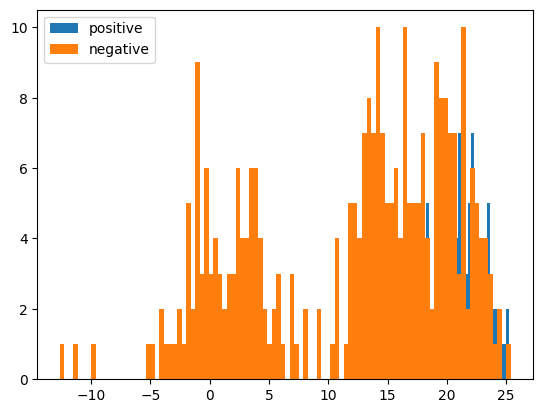

ROC AUC: 0.85
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

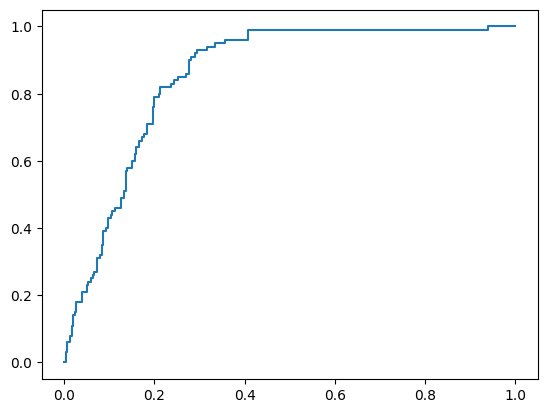

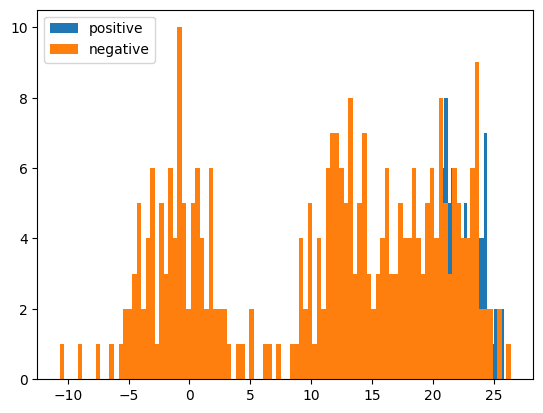

ROC AUC: 0.86
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

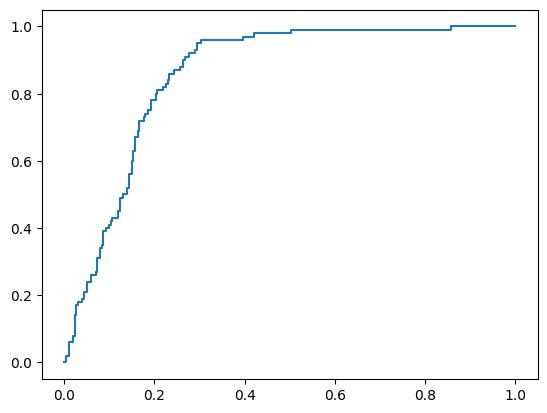

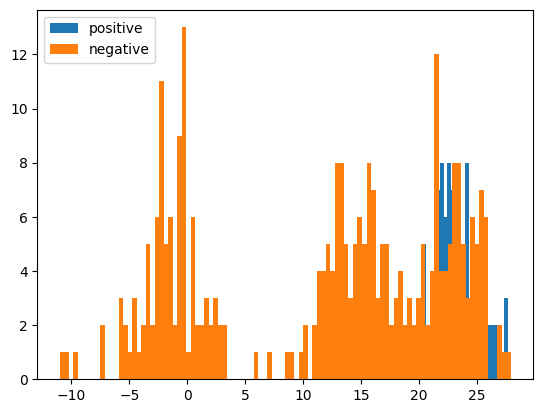

ROC AUC: 0.83
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

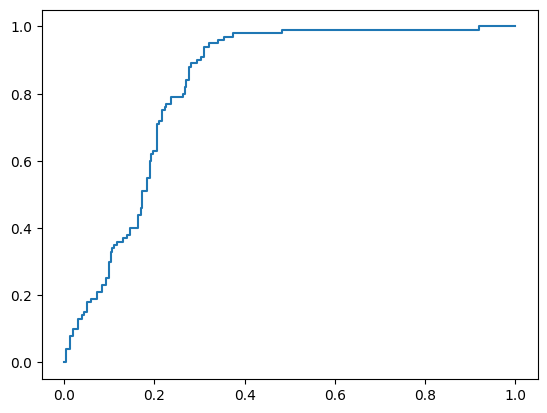

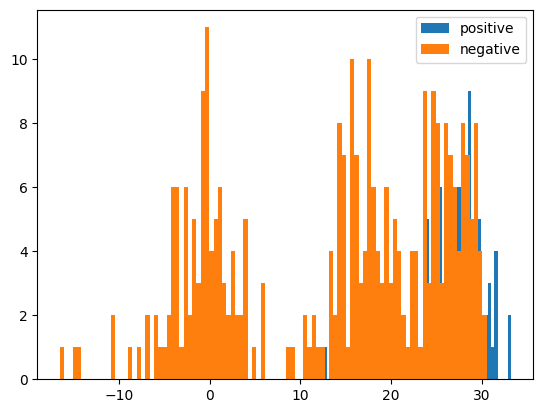

ROC AUC: 0.85
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

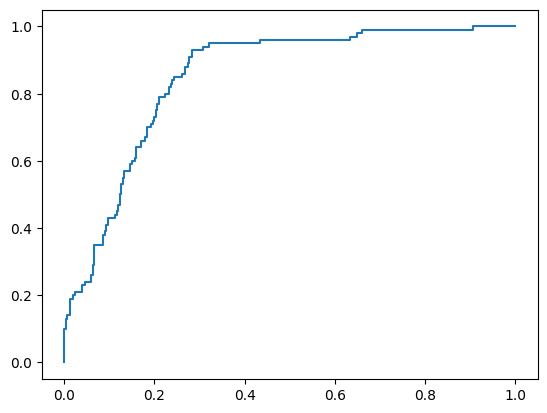

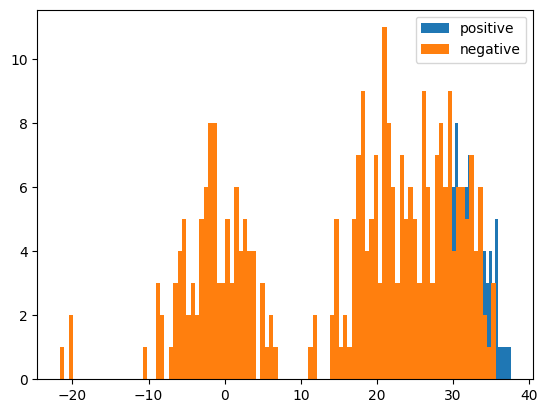

ROC AUC: 0.88
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

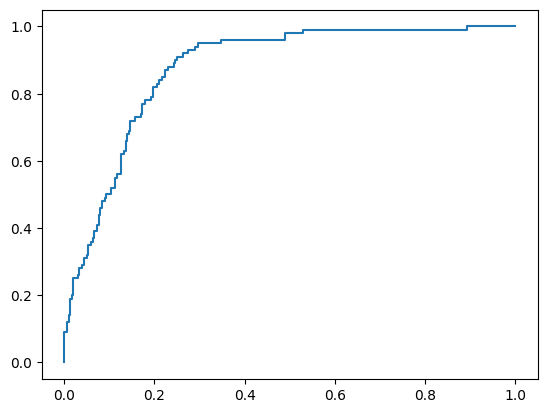

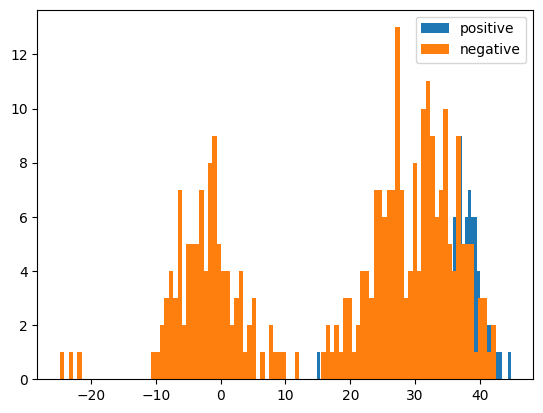

ROC AUC: 0.87
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

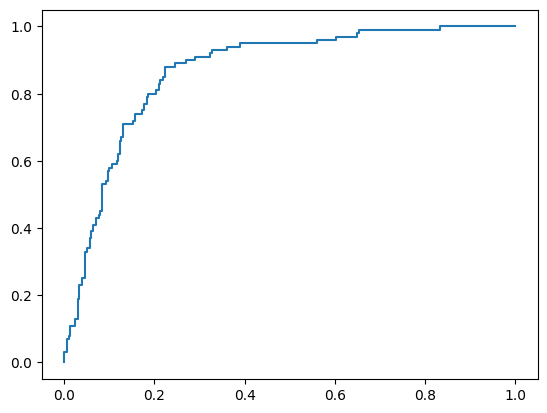

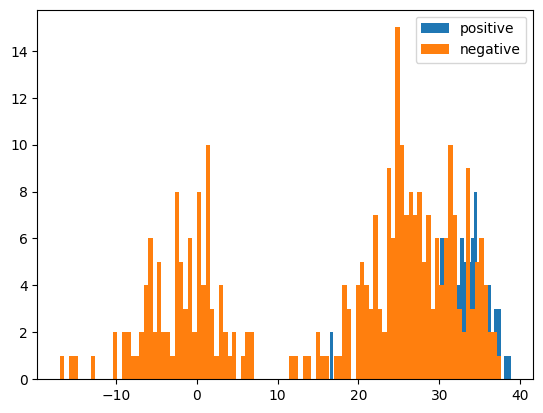

ROC AUC: 0.85
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

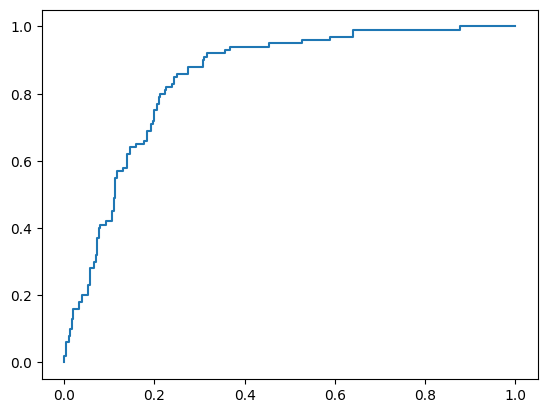

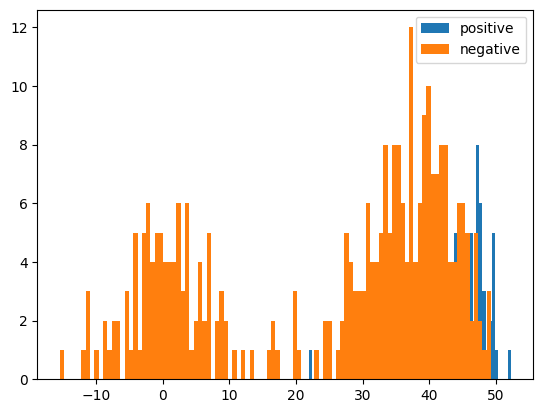

ROC AUC: 0.84
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

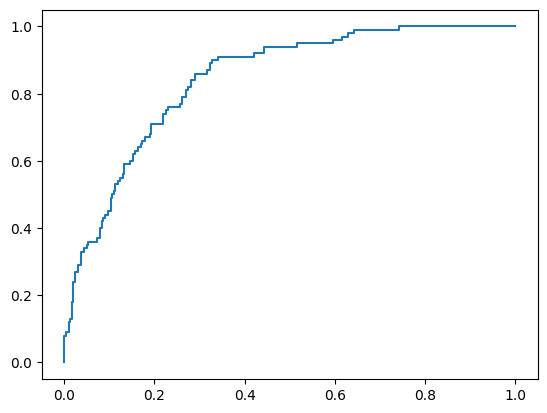

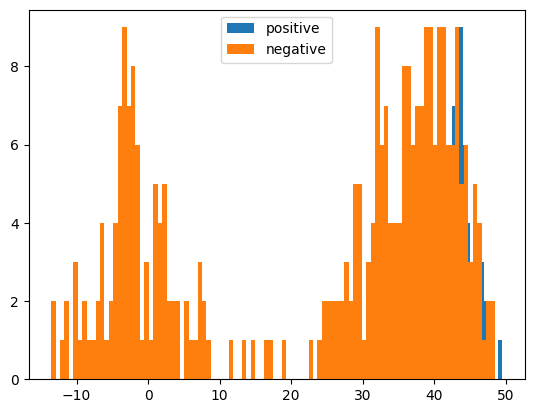

ROC AUC: 0.80
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

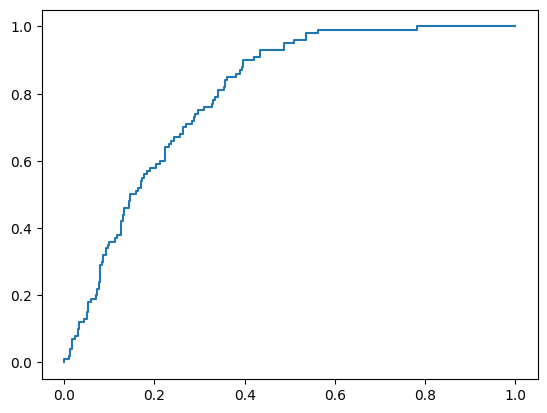

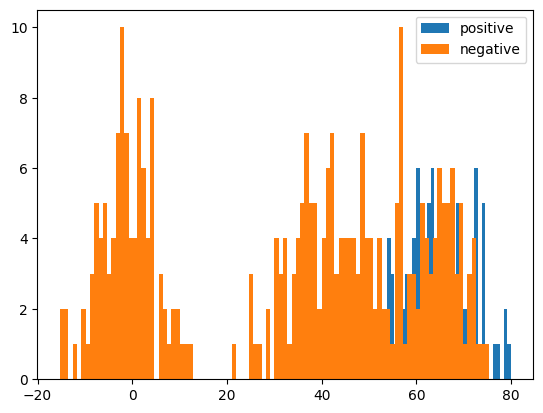

ROC AUC: 0.83
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

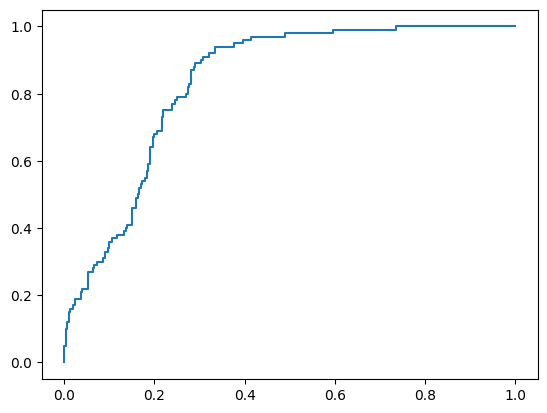

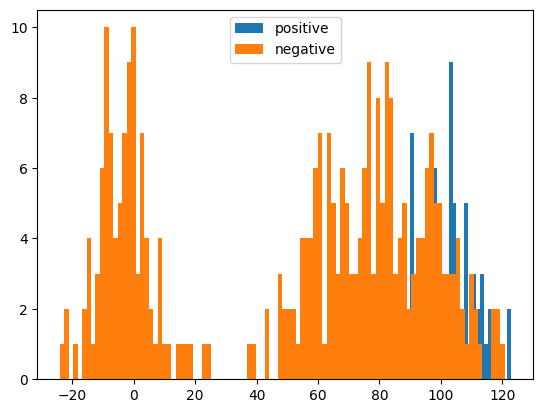

ROC AUC: 0.84
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

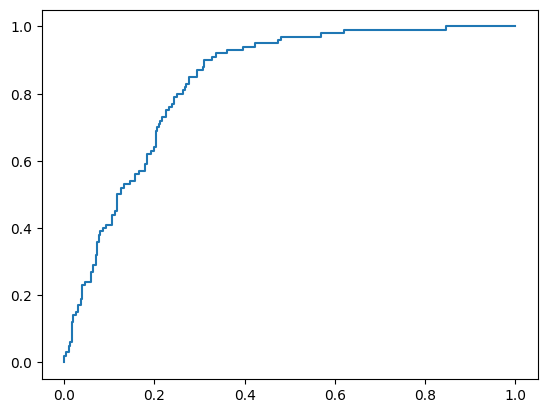

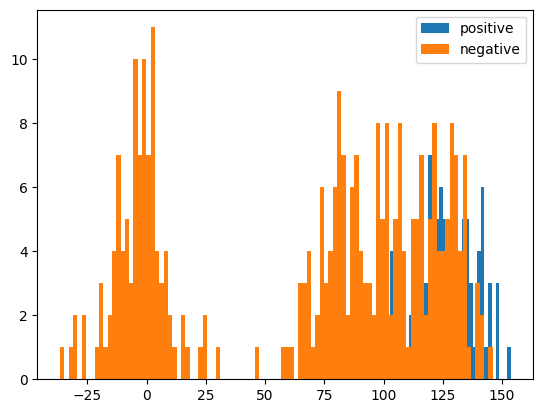

ROC AUC: 0.86
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

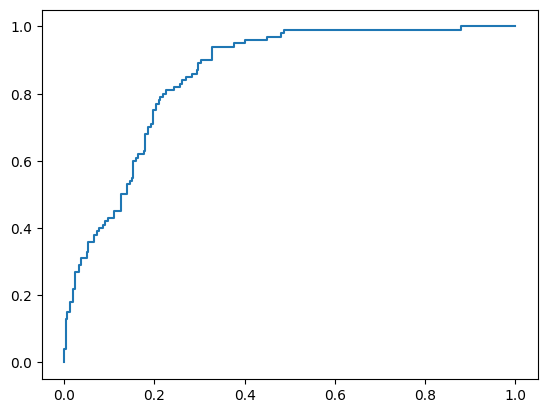

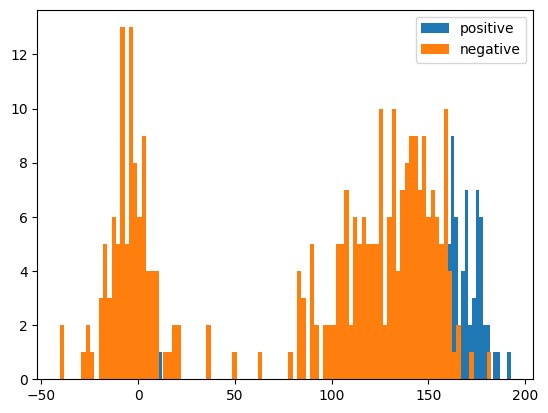

ROC AUC: 0.90
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

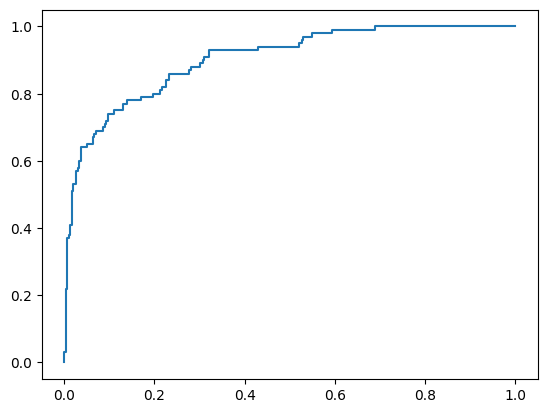

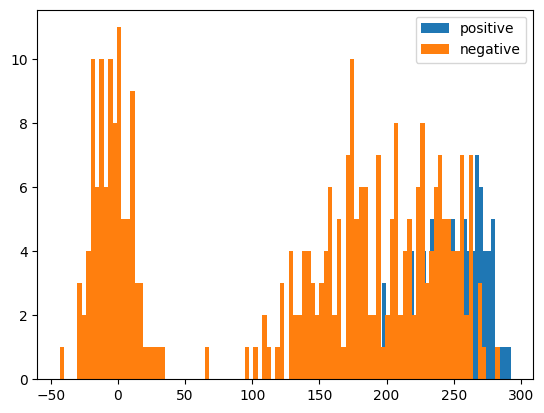

ROC AUC: 0.87
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

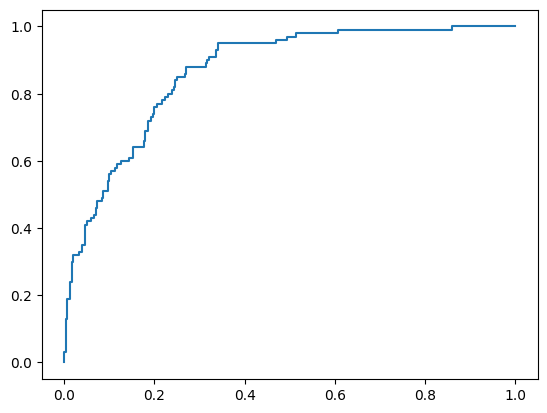

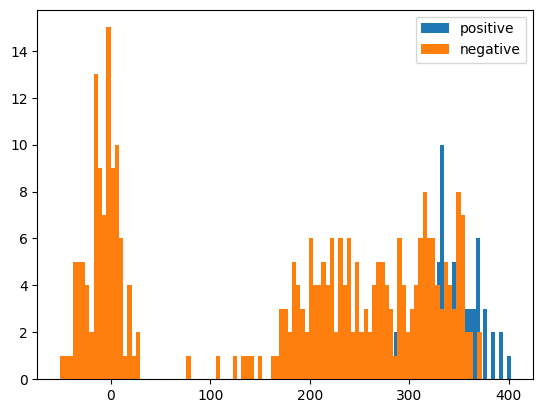

ROC AUC: 0.85
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

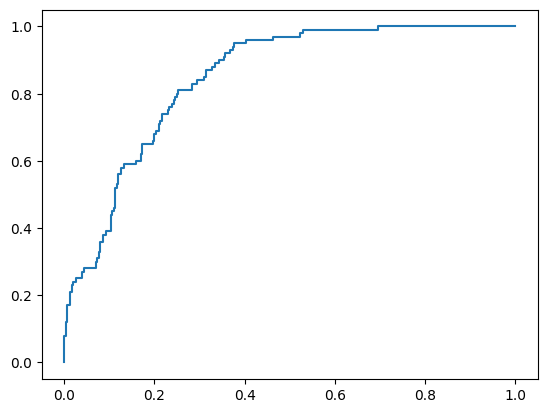

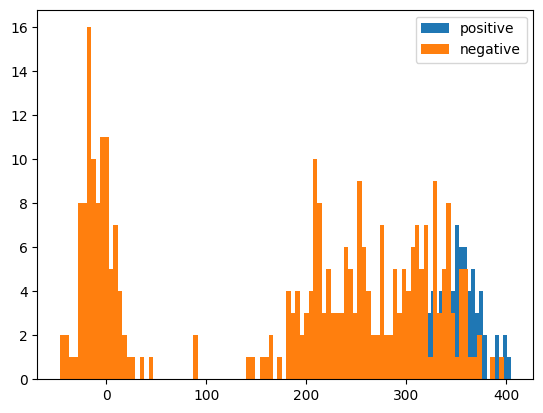

ROC AUC: 0.87
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

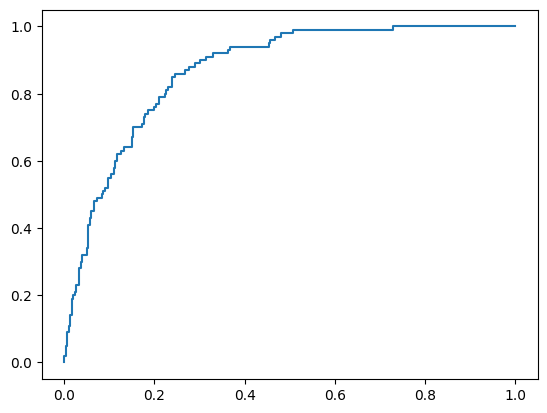

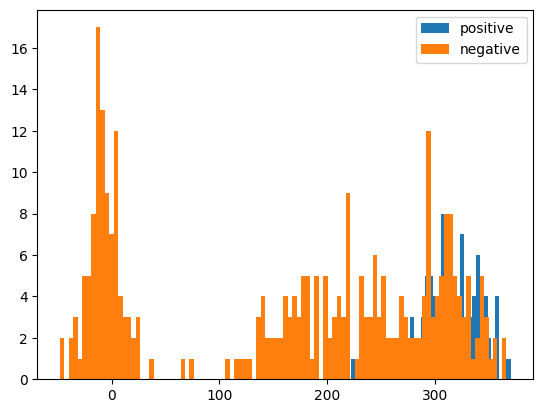

ROC AUC: 0.83
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

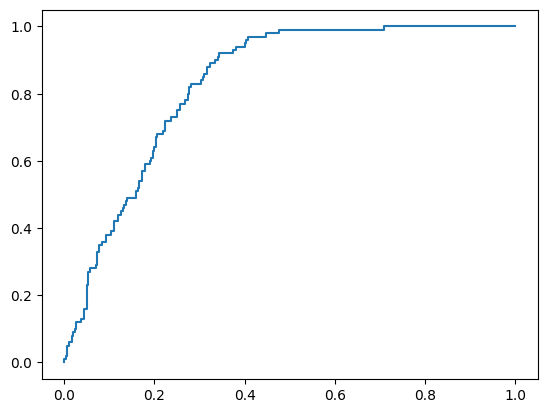

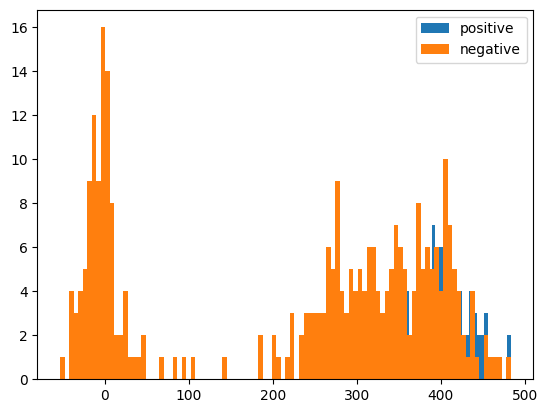

ROC AUC: 0.82
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

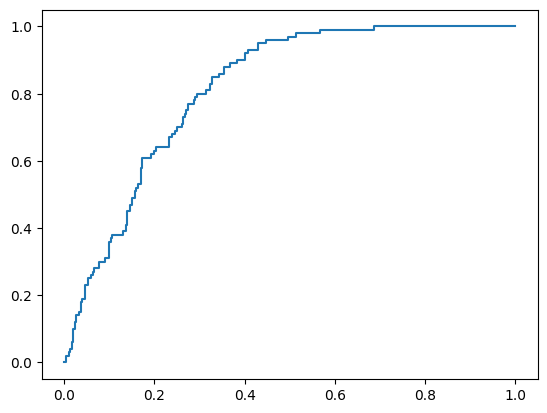

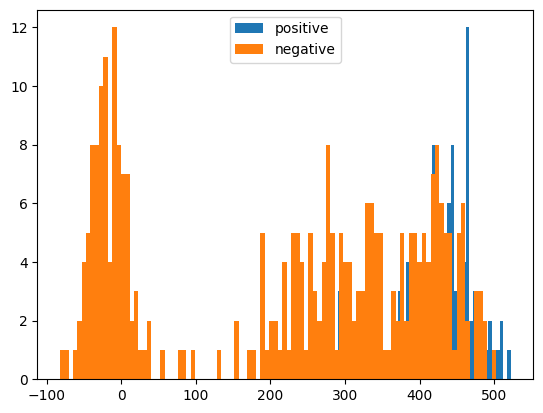

ROC AUC: 0.86
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

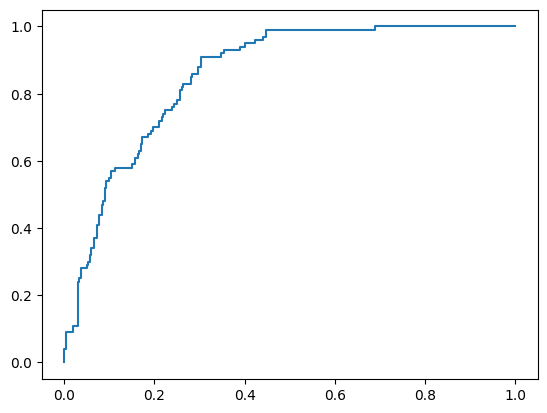

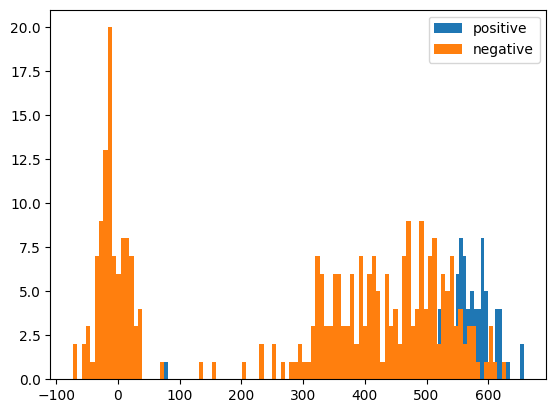

ROC AUC: 0.90
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

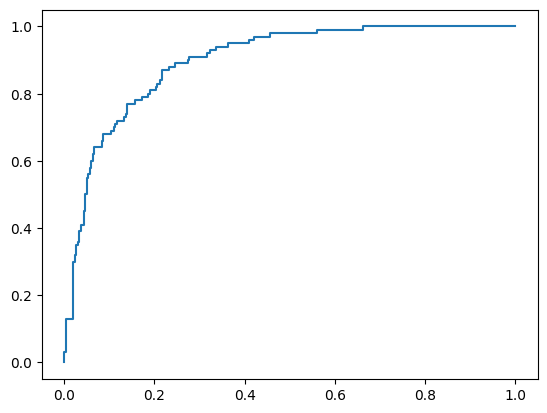

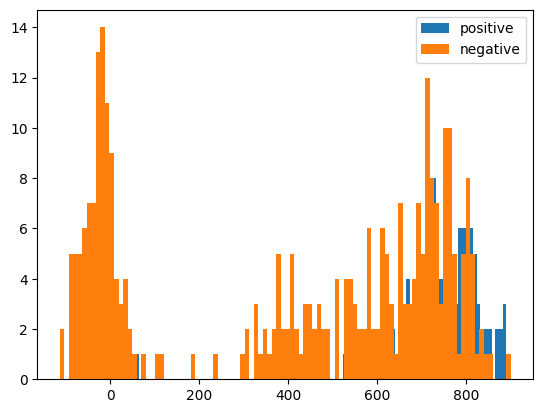

ROC AUC: 0.84
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

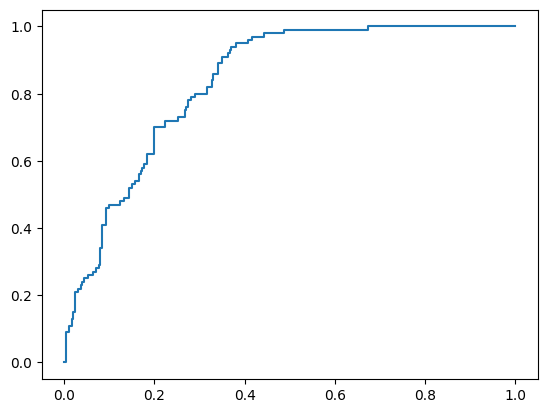

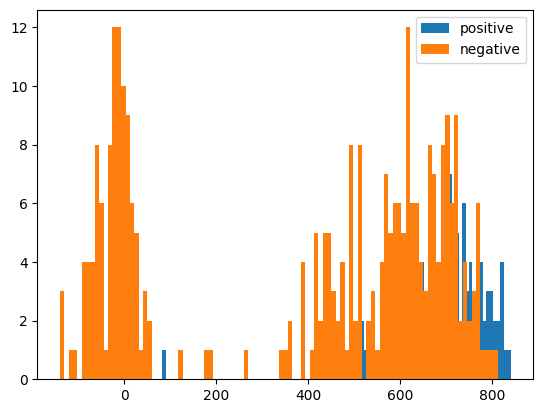

ROC AUC: 0.86
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

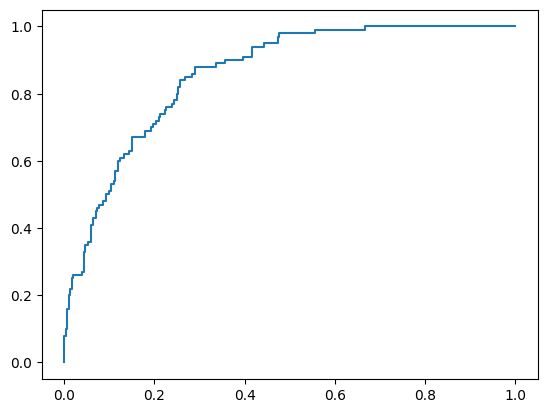

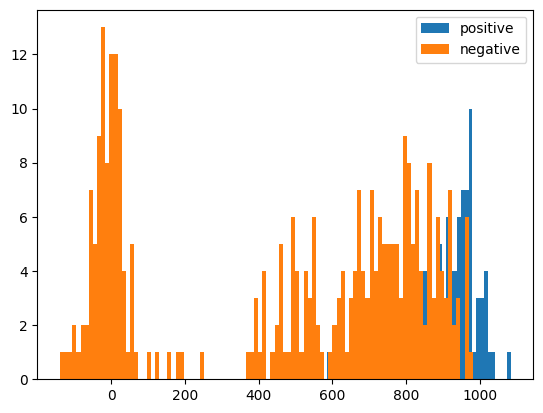

ROC AUC: 0.90
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

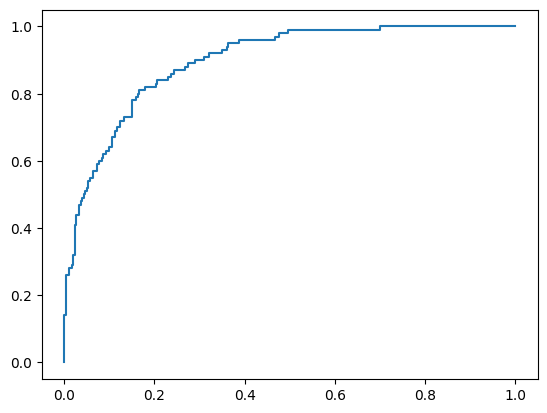

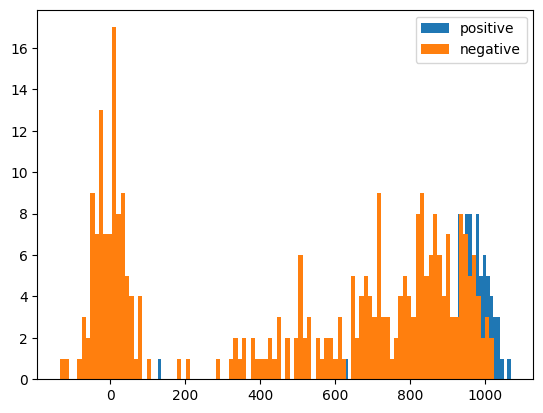

ROC AUC: 0.88
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

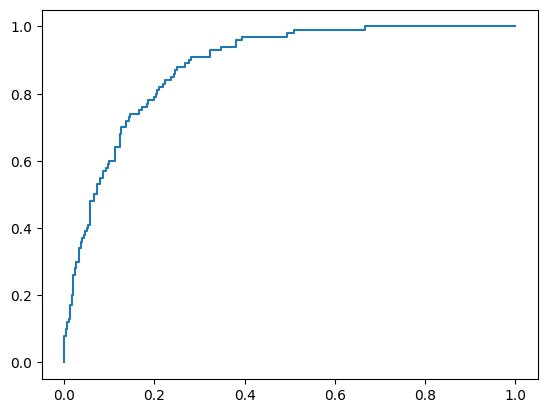

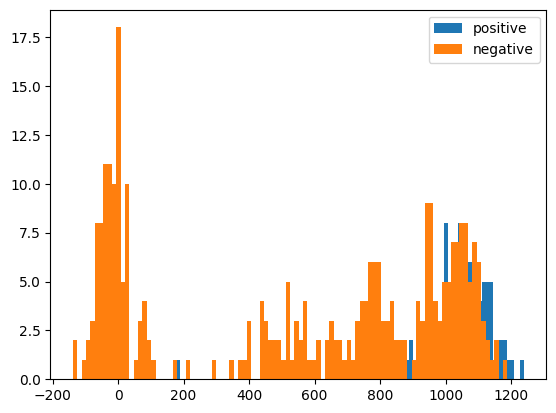

ROC AUC: 0.86
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

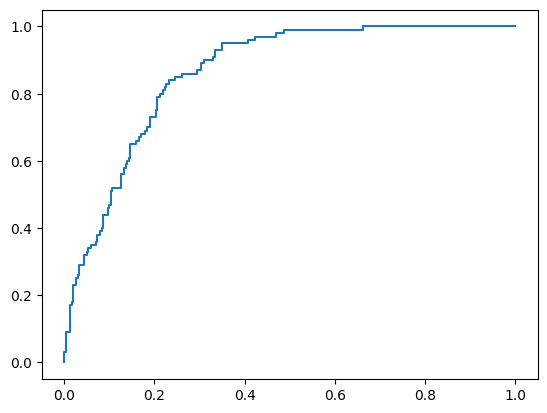

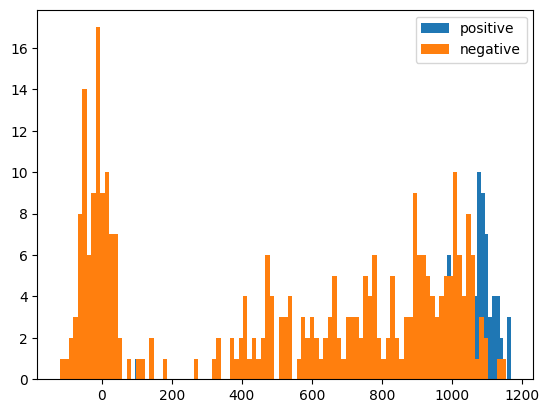

ROC AUC: 0.89
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

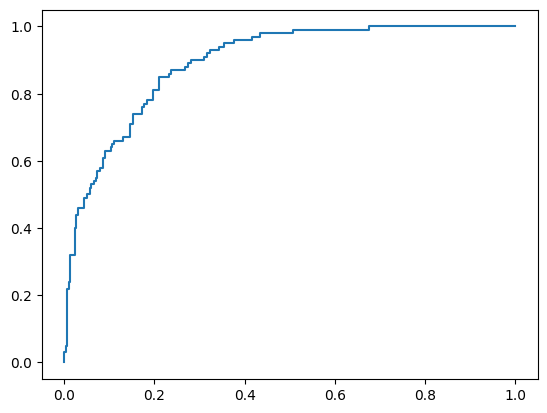

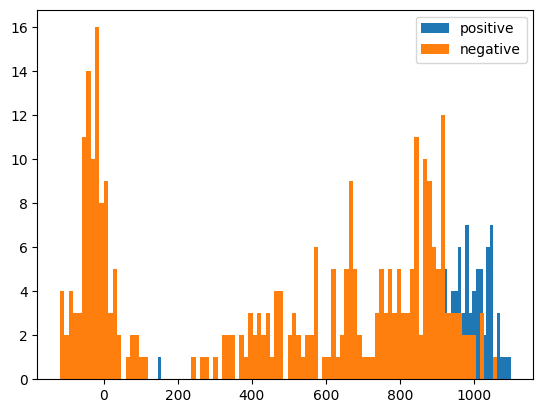

ROC AUC: 0.91
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

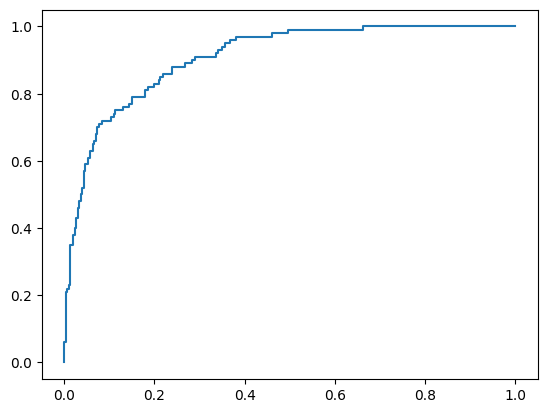

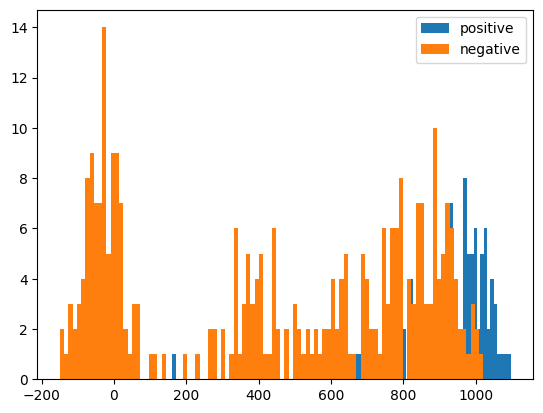

ROC AUC: 0.91
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

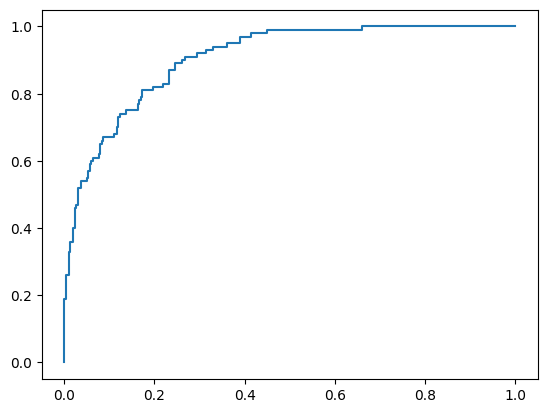

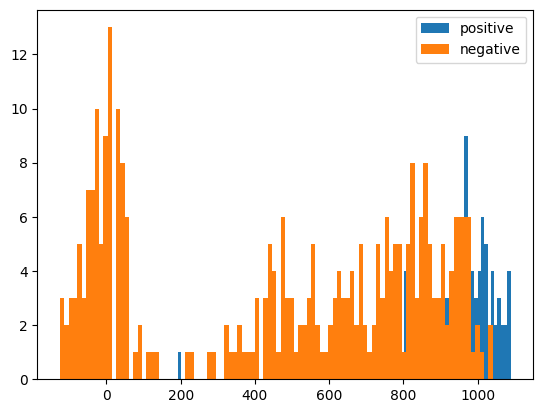

ROC AUC: 0.90
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

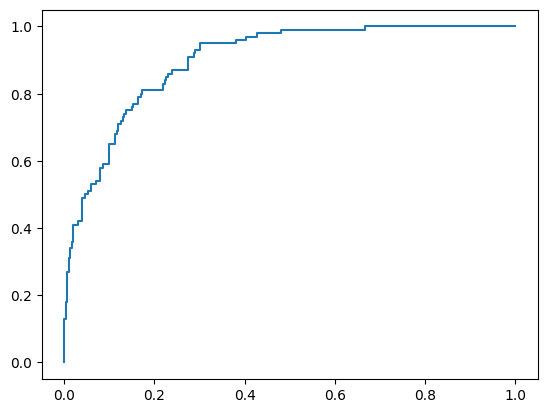

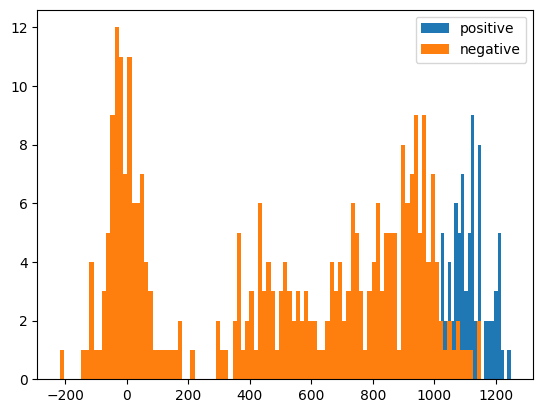

ROC AUC: 0.94
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

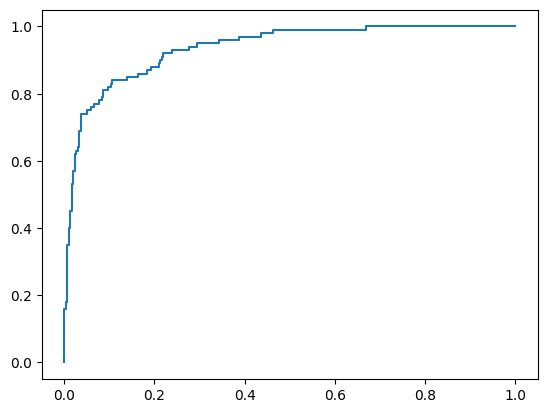

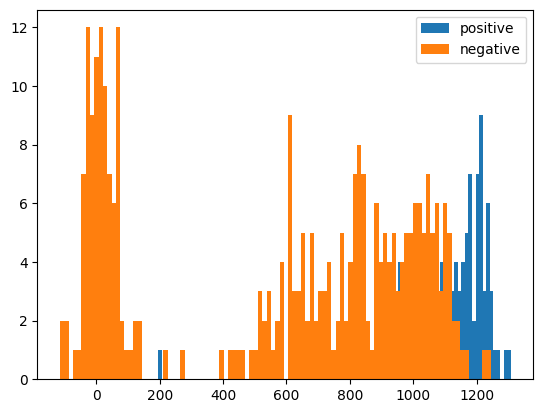

ROC AUC: 0.92
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

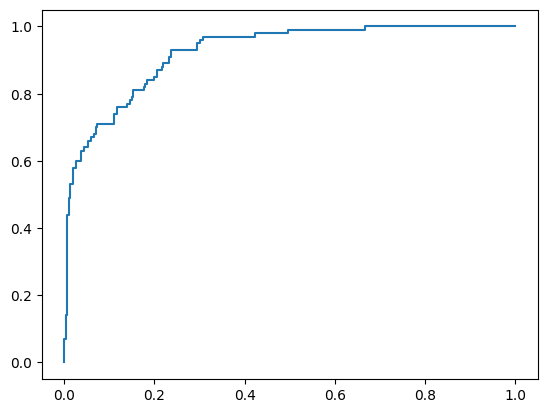

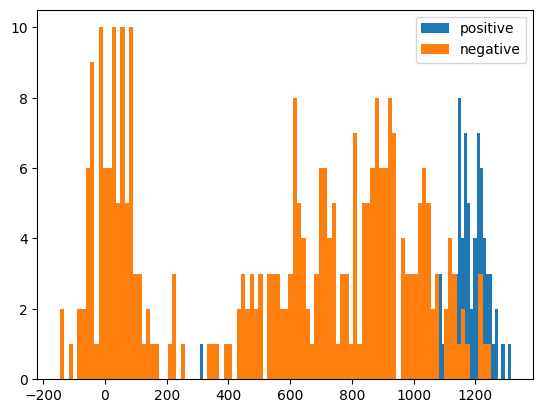

ROC AUC: 0.93
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

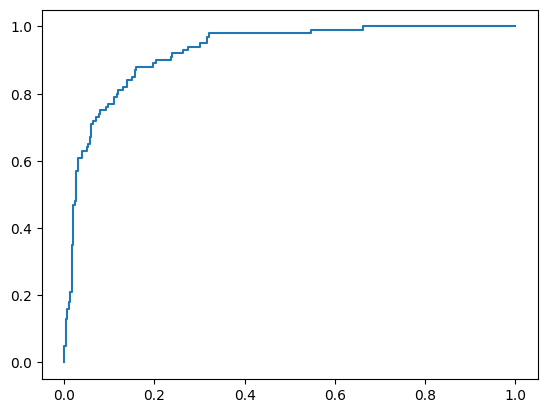

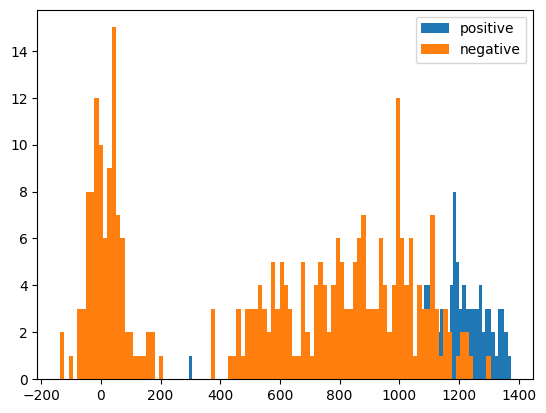

ROC AUC: 0.93
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

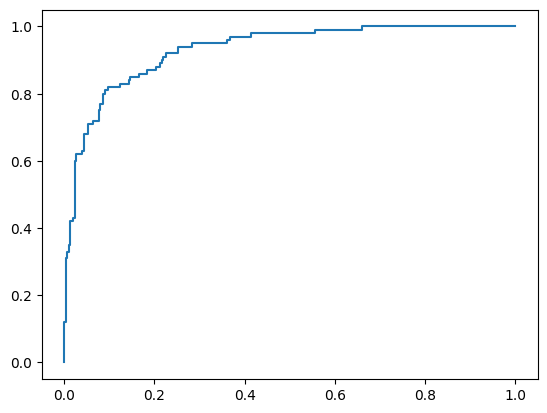

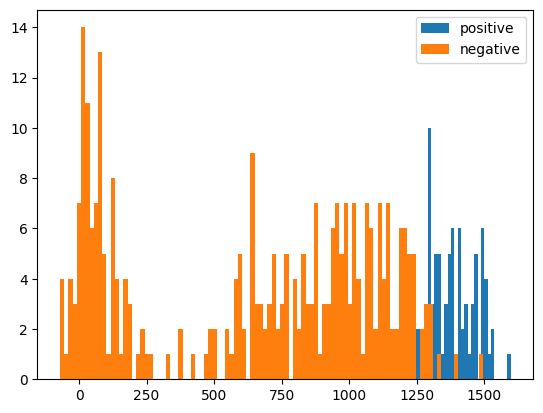

ROC AUC: 0.95
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

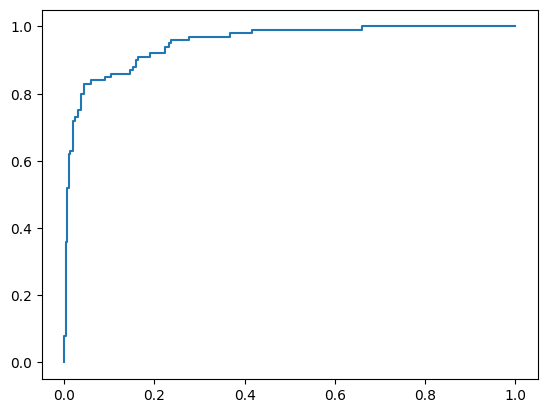

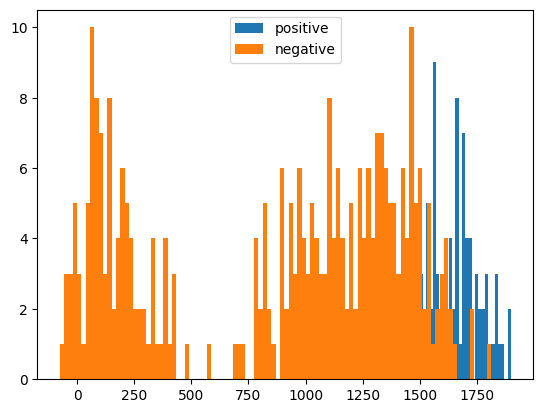

ROC AUC: 0.93
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

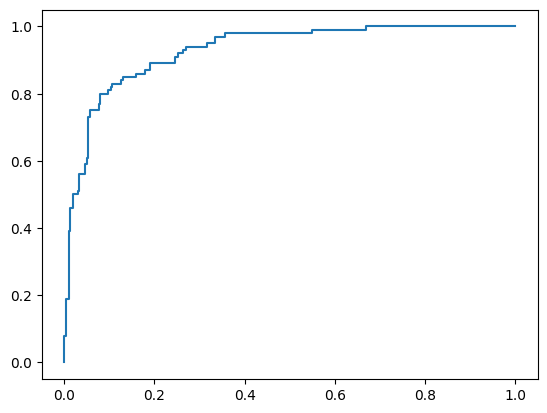

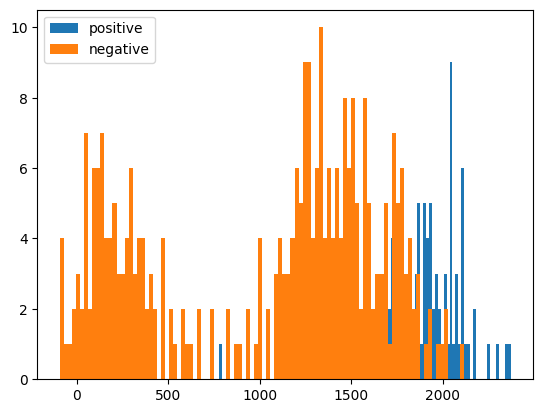

ROC AUC: 0.93
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

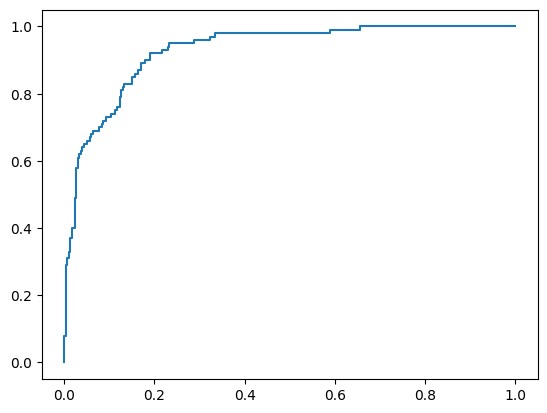

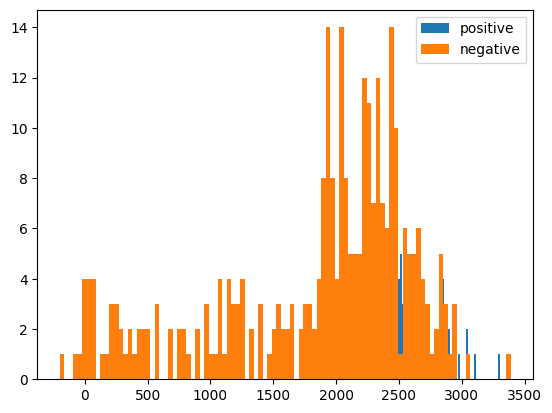

ROC AUC: 0.79
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

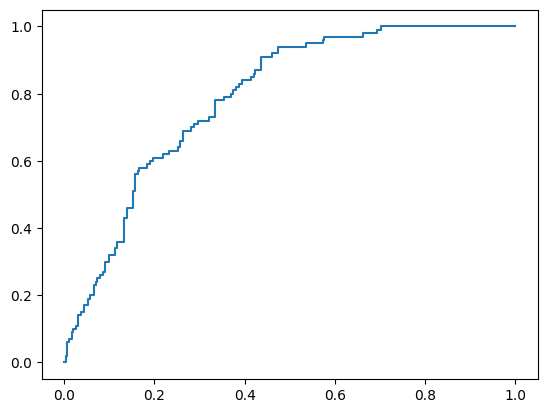

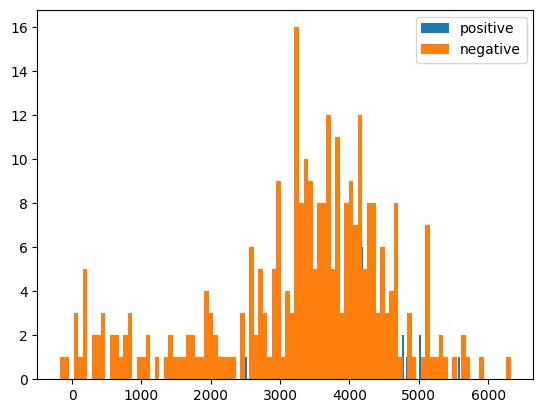

ROC AUC: 0.64
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

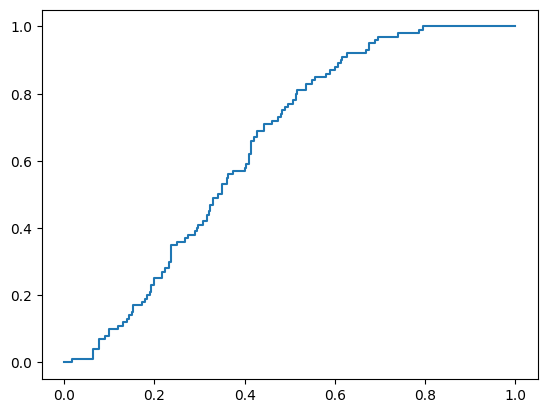

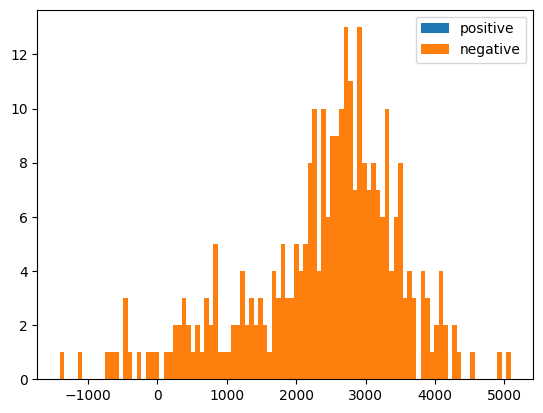

ROC AUC: 0.65
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx be:  5
batch_idx be:  6
batch_idx be:  7
batch_idx be:  8
batch_idx be:  9
batch_idx be:  10
batch_idx be:  11
batch_idx be:  12
batch_idx be:  13
batch_idx be:  14
batch_idx be:  15
batch_idx be:  16
batch_idx be:  17
batch_idx be:  18
batch_idx be:  19
batch_idx be:  20
batch_idx be:  21
batch_idx be:  22
batch_idx be:  23
batch_idx be:  24
batch_idx be:  25
batch_idx be:  26
batch_idx be:  27
batch_idx be:  28
batch_idx be:  29
batch_idx be:  30
batch_idx be:  31
batch_idx be:  32
batch_idx be:  33
batch_idx be:  34
batch_idx be:  35
batch_idx be:  36
batch_idx be:  37
batch_idx be:  38
batch_idx be:  39
batch_idx be:  40
batch_idx be:  41
batch_idx be:  42
batch_idx be:  43
batch_idx be:  44
batch_idx be:  45
batch_idx be:  46
batch_idx be:  47
batch_idx be:  48
batch_idx be:  49
batch_idx be:  0
batch_idx be:  1
batch_idx be:  2
batch_idx be:  3
batch_idx be:  4
batch_idx b

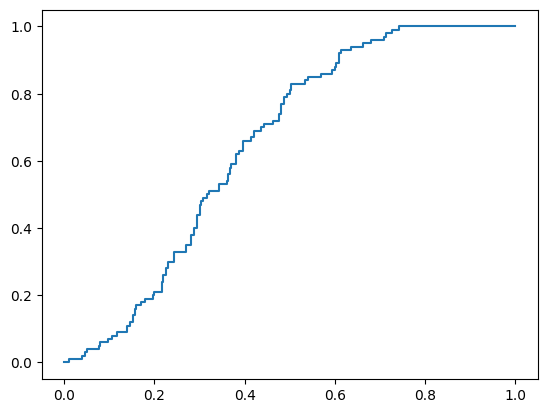

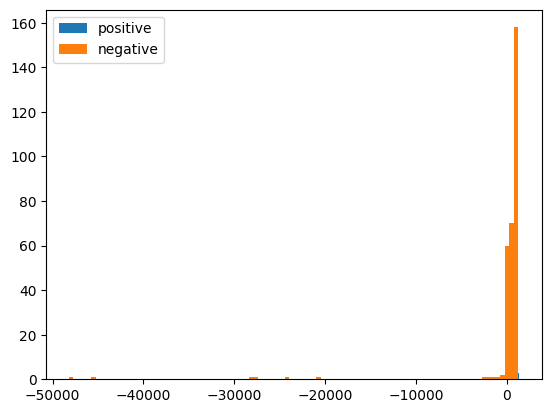

ROC AUC: 0.97


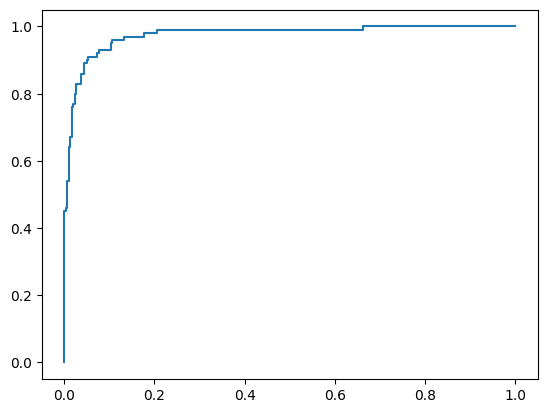

<Figure size 640x480 with 0 Axes>

In [43]:
big_mlp_aucs = auc_all_layers_single_plot(
    gpt2_xl,
    48,
    "blocks.{}.hook_mlp_out",
    feature_dataset,
    baseline_dataset2,
    False,
    evaluation_dataset_big2,
    "dot",
)

In [44]:
big_resid_pre_aucs

[0.5964333333333334,
 0.7626000000000001,
 0.9019999999999999,
 0.9344,
 0.913,
 0.9196666666666667,
 0.9025,
 0.8707,
 0.8547666666666667,
 0.8596333333333334,
 0.8531,
 0.8521666666666666,
 0.8662666666666667,
 0.8788333333333334,
 0.8743333333333334,
 0.8695999999999999,
 0.8590666666666666,
 0.8514666666666667,
 0.8511333333333334,
 0.8536666666666667,
 0.8545666666666667,
 0.8837666666666667,
 0.8701,
 0.8802,
 0.8848666666666666,
 0.883,
 0.8677,
 0.8886666666666666,
 0.8930666666666667,
 0.8804,
 0.8784333333333333,
 0.88765,
 0.8900333333333333,
 0.8845666666666666,
 0.8784333333333334,
 0.8844,
 0.8831666666666667,
 0.8840666666666667,
 0.8942333333333334,
 0.8984333333333334,
 0.9028666666666667,
 0.9077333333333334,
 0.9088666666666667,
 0.9122333333333333,
 0.9166666666666666,
 0.9147666666666667,
 0.8861000000000001,
 0.8356333333333333]

In [45]:
big_attn_aucs

[0.9678666666666667,
 0.9506,
 0.9432,
 0.8374,
 0.9476333333333333,
 0.8834,
 0.9215333333333333,
 0.9546666666666667,
 0.9101666666666667,
 0.9062666666666668,
 0.9159666666666667,
 0.9136666666666666,
 0.8775333333333334,
 0.8772333333333333,
 0.9226,
 0.9077999999999999,
 0.8396666666666668,
 0.9056666666666667,
 0.8851666666666665,
 0.8917,
 0.8074333333333332,
 0.9168333333333333,
 0.9225333333333333,
 0.9027333333333334,
 0.9296666666666666,
 0.9059666666666667,
 0.9718,
 0.9359333333333334,
 0.7836333333333334,
 0.8110333333333333,
 0.9427,
 0.9194666666666667,
 0.8982,
 0.8739,
 0.9129,
 0.9598,
 0.9317000000000001,
 0.9326333333333334,
 0.9588999999999999,
 0.8838666666666667,
 0.9614,
 0.9142666666666667,
 0.9032,
 0.8781,
 0.9721333333333333,
 0.8677666666666668,
 0.7295666666666667,
 0.8787333333333334]

In [46]:
big_mlp_aucs

[0.7585333333333334,
 0.9057333333333333,
 0.9464666666666666,
 0.8533999999999999,
 0.9219,
 0.8891666666666668,
 0.8509333333333333,
 0.8310666666666667,
 0.8545666666666667,
 0.8579333333333332,
 0.827,
 0.8507333333333333,
 0.8763666666666667,
 0.8681333333333333,
 0.8476,
 0.8434666666666667,
 0.7997333333333334,
 0.8346333333333333,
 0.8367333333333333,
 0.8551333333333333,
 0.9027333333333333,
 0.8665333333333333,
 0.8472000000000001,
 0.8695666666666666,
 0.8315666666666667,
 0.8161,
 0.8560000000000001,
 0.8976,
 0.8358333333333333,
 0.8587333333333333,
 0.8973666666666666,
 0.8847999999999999,
 0.8631666666666666,
 0.8926333333333333,
 0.9074666666666666,
 0.9057333333333334,
 0.8992,
 0.9356,
 0.9230333333333334,
 0.9265333333333333,
 0.9303333333333333,
 0.9524666666666667,
 0.9288333333333333,
 0.9292,
 0.7898333333333333,
 0.6445333333333334,
 0.6510333333333334,
 0.9749666666666666]

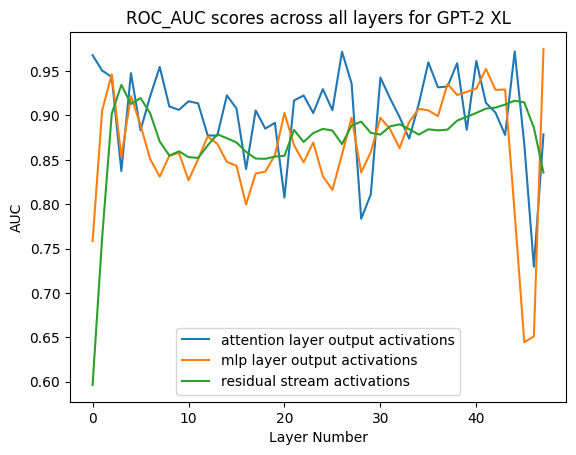

In [47]:
plt.plot(big_attn_aucs, label="attention layer output activations")
plt.plot(big_mlp_aucs, label="mlp layer output activations")
plt.plot(big_resid_pre_aucs, label="residual stream activations")
plt.title(f"ROC_AUC scores across all layers for GPT-2 XL")
plt.xlabel("Layer Number")
plt.ylabel("AUC")
plt.legend()
plt.show()